# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
forest = pd.read_csv("forestfires.csv")

In [3]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


# EDA

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forest.duplicated().sum()

8

In [8]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Value Counts For target Variable Y

In [10]:
forest["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

# Observation :
We can see Imbalance in the dataset

# Barplot

<AxesSubplot:xlabel='size_category', ylabel='monthjan'>

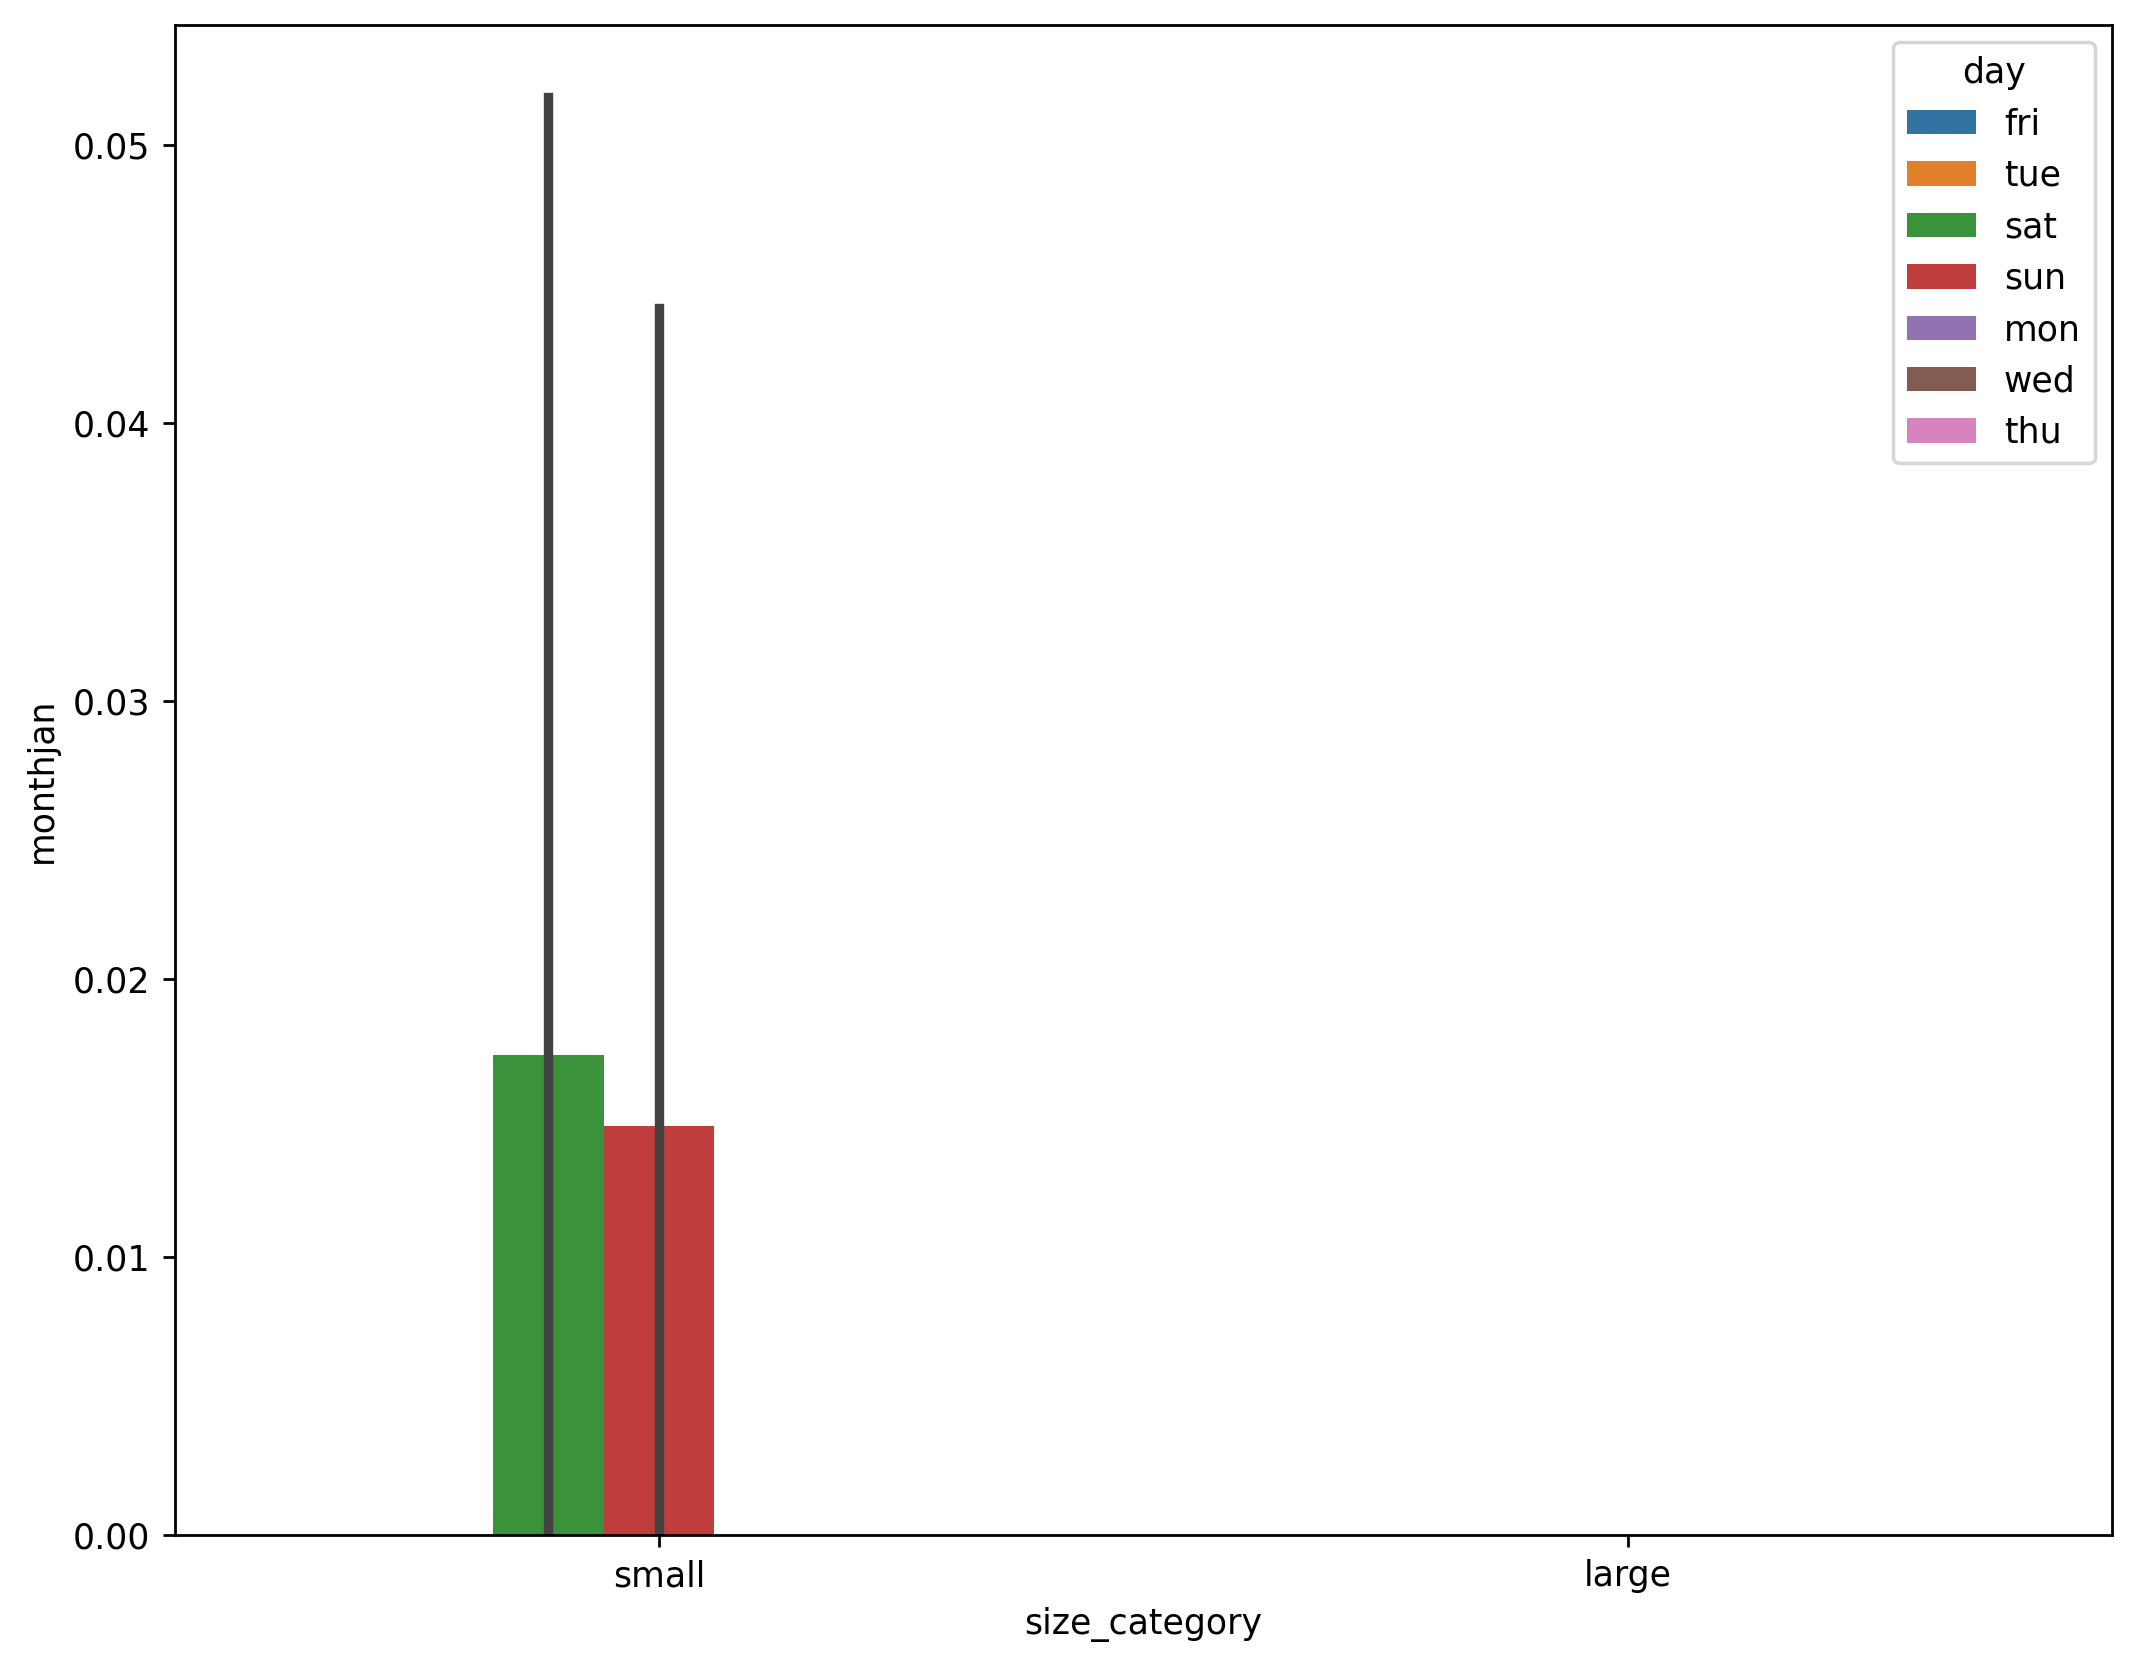

In [11]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot('size_category','monthjan',hue="day",data=forest)

# Observation:
We can see that in the month of jan only small area of the forest burns and only on saturday and sunday

<AxesSubplot:xlabel='size_category', ylabel='monthfeb'>

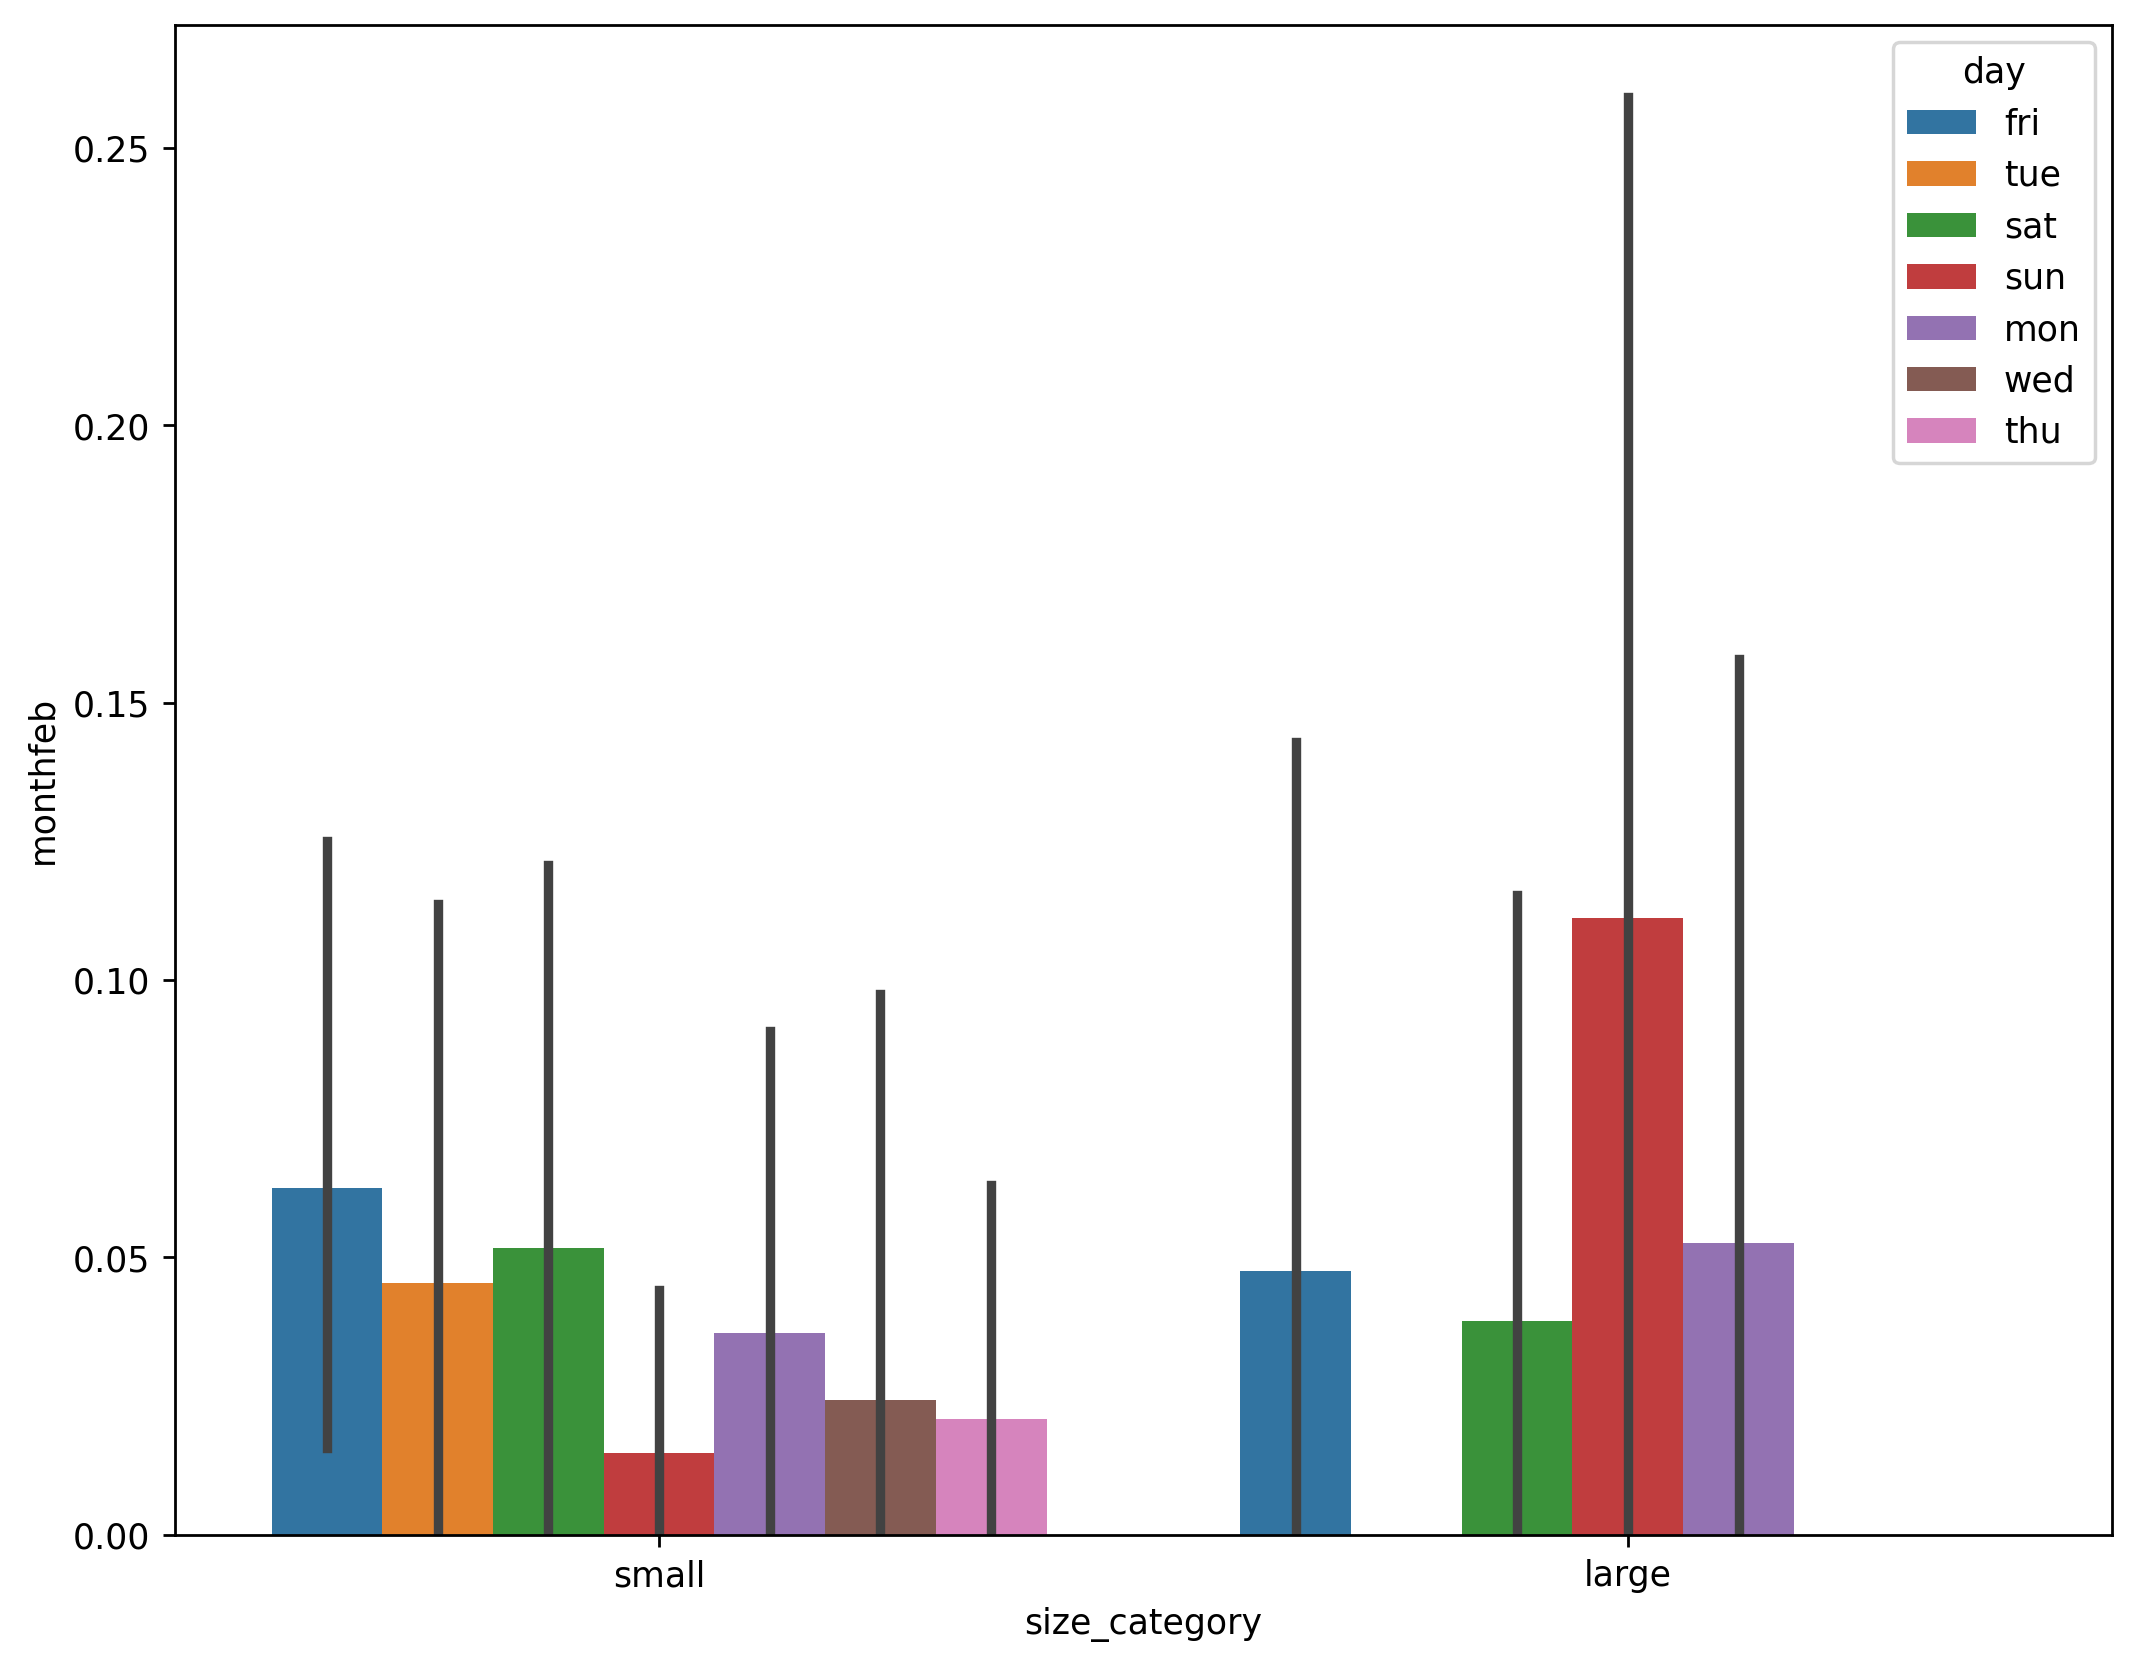

In [12]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthfeb",hue="day",data=forest)

# Observation:
In the month of feb all seven days of week they burn small area of forest and sunday,monday,friday and saturday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthmar'>

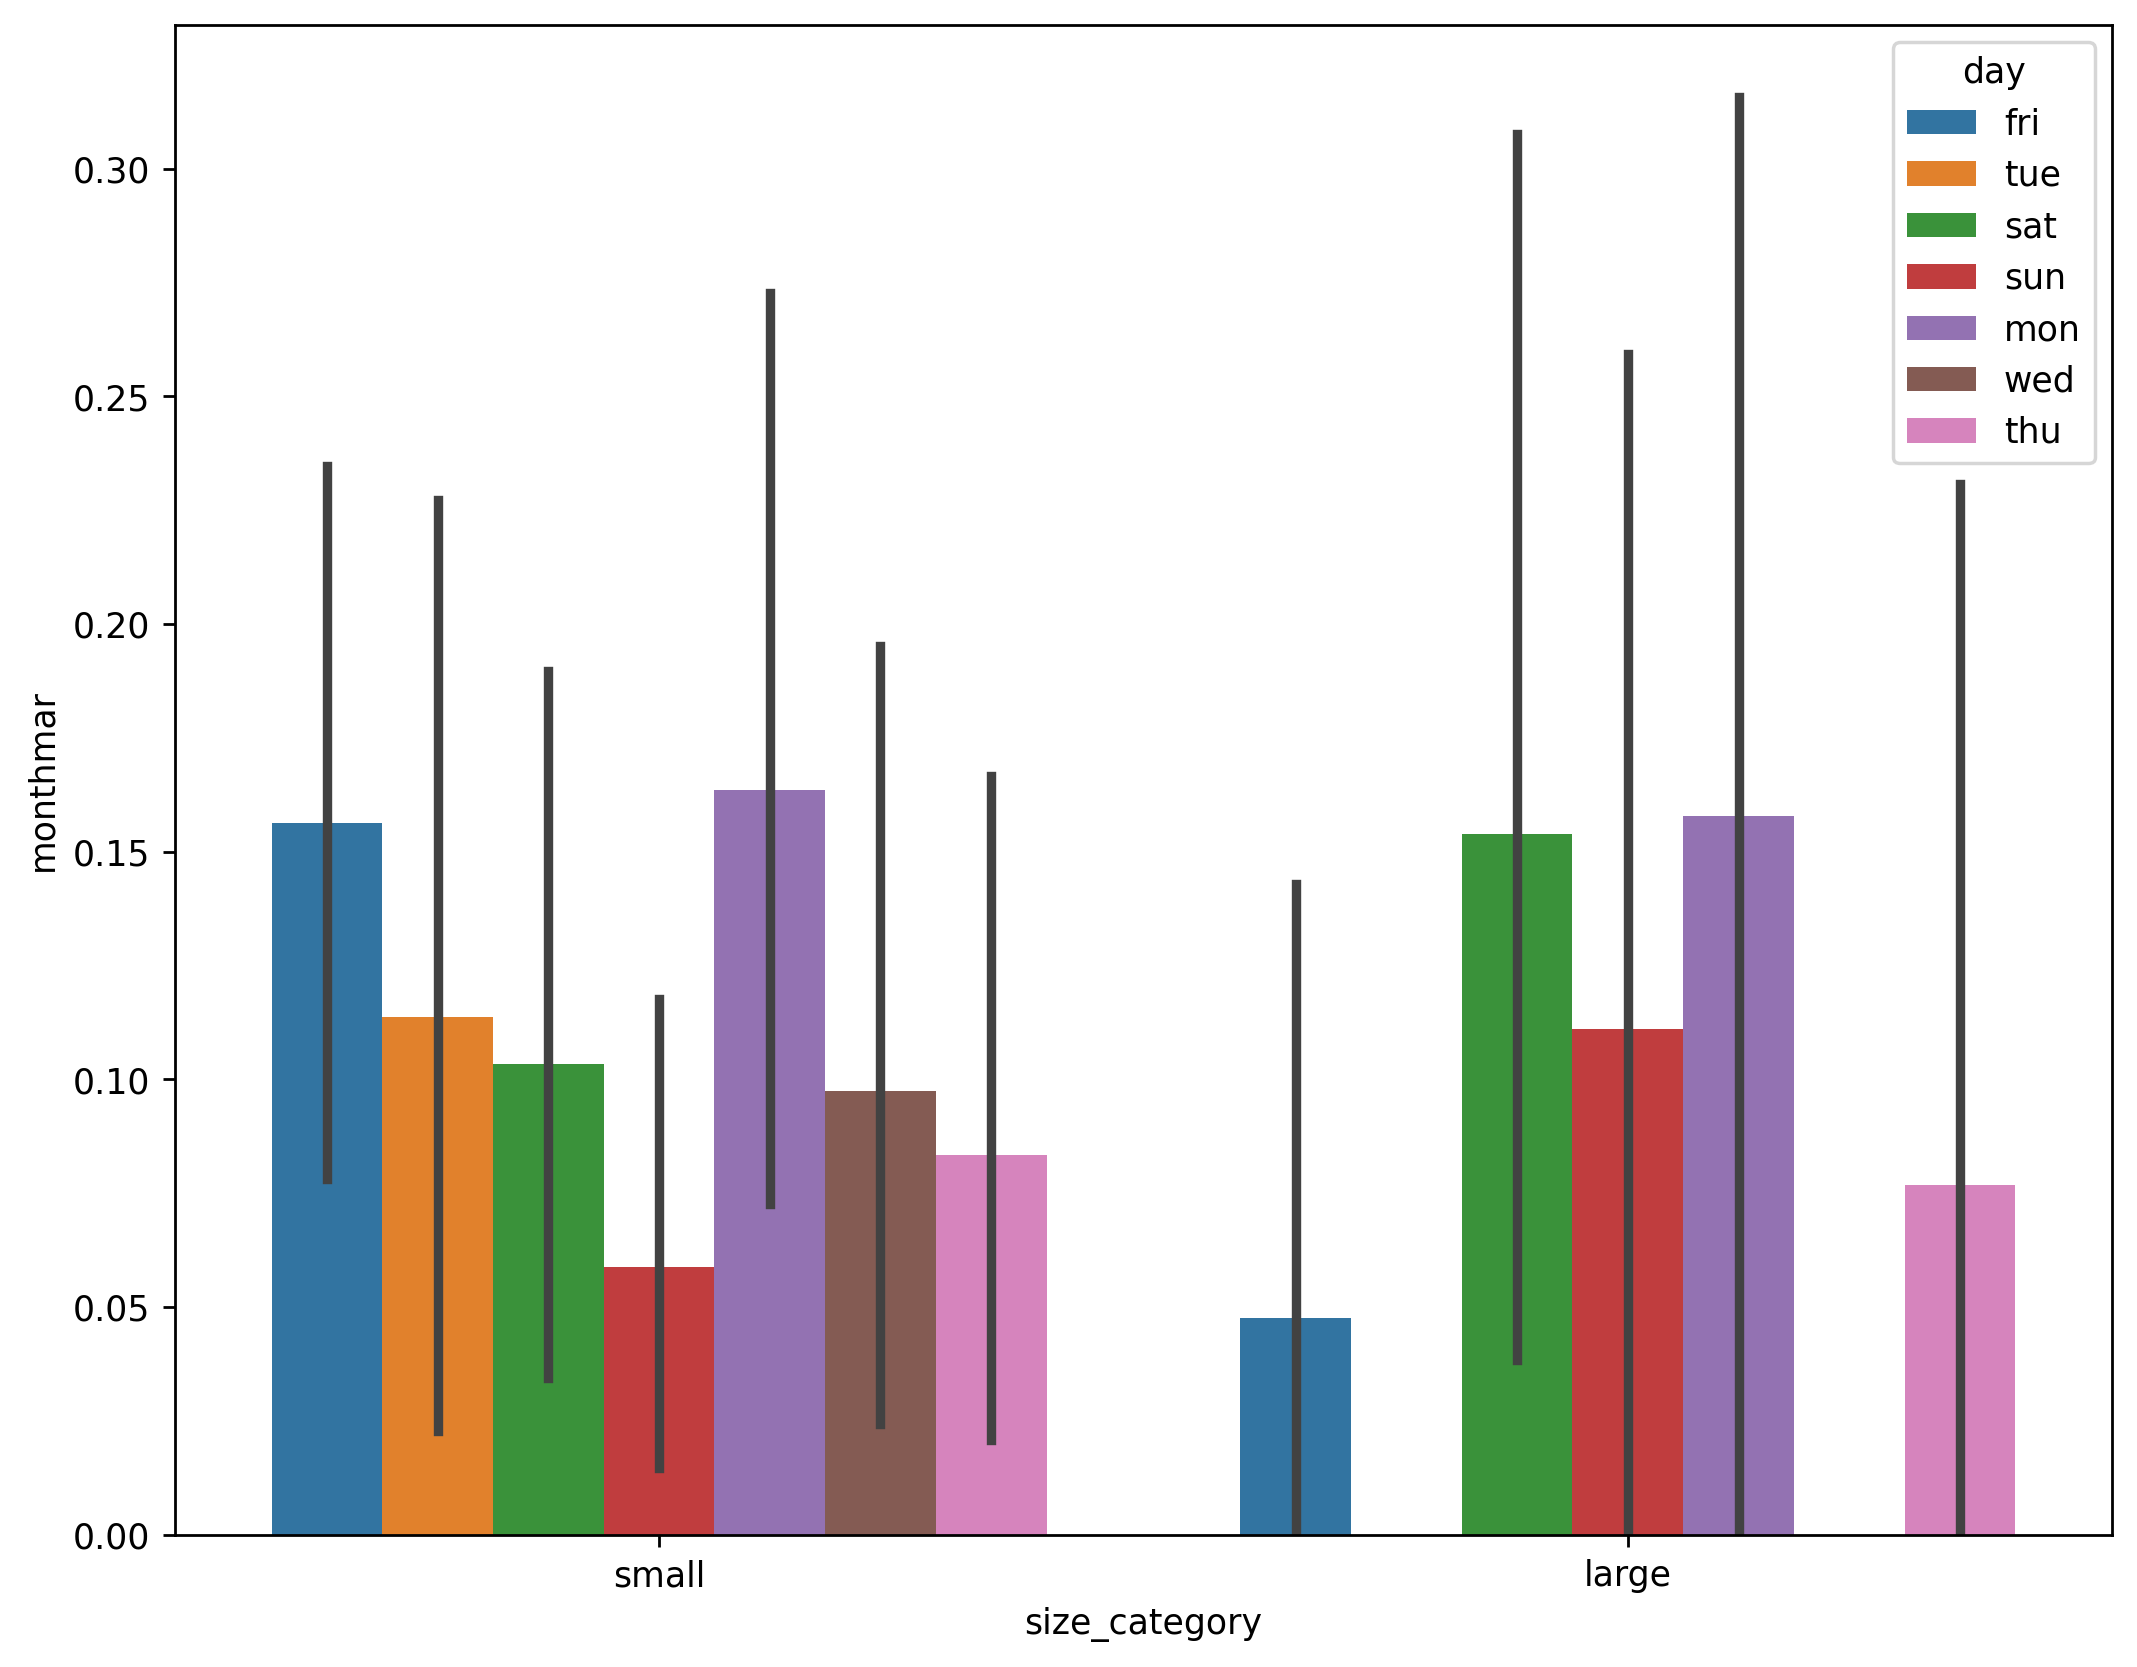

In [13]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthmar",hue="day",data=forest)

# Observation:
In the month of march all seven days they burn small area of the forest and on sunday,monday,thursday,friday and saturday they burn large area of forest

<AxesSubplot:xlabel='size_category', ylabel='monthapr'>

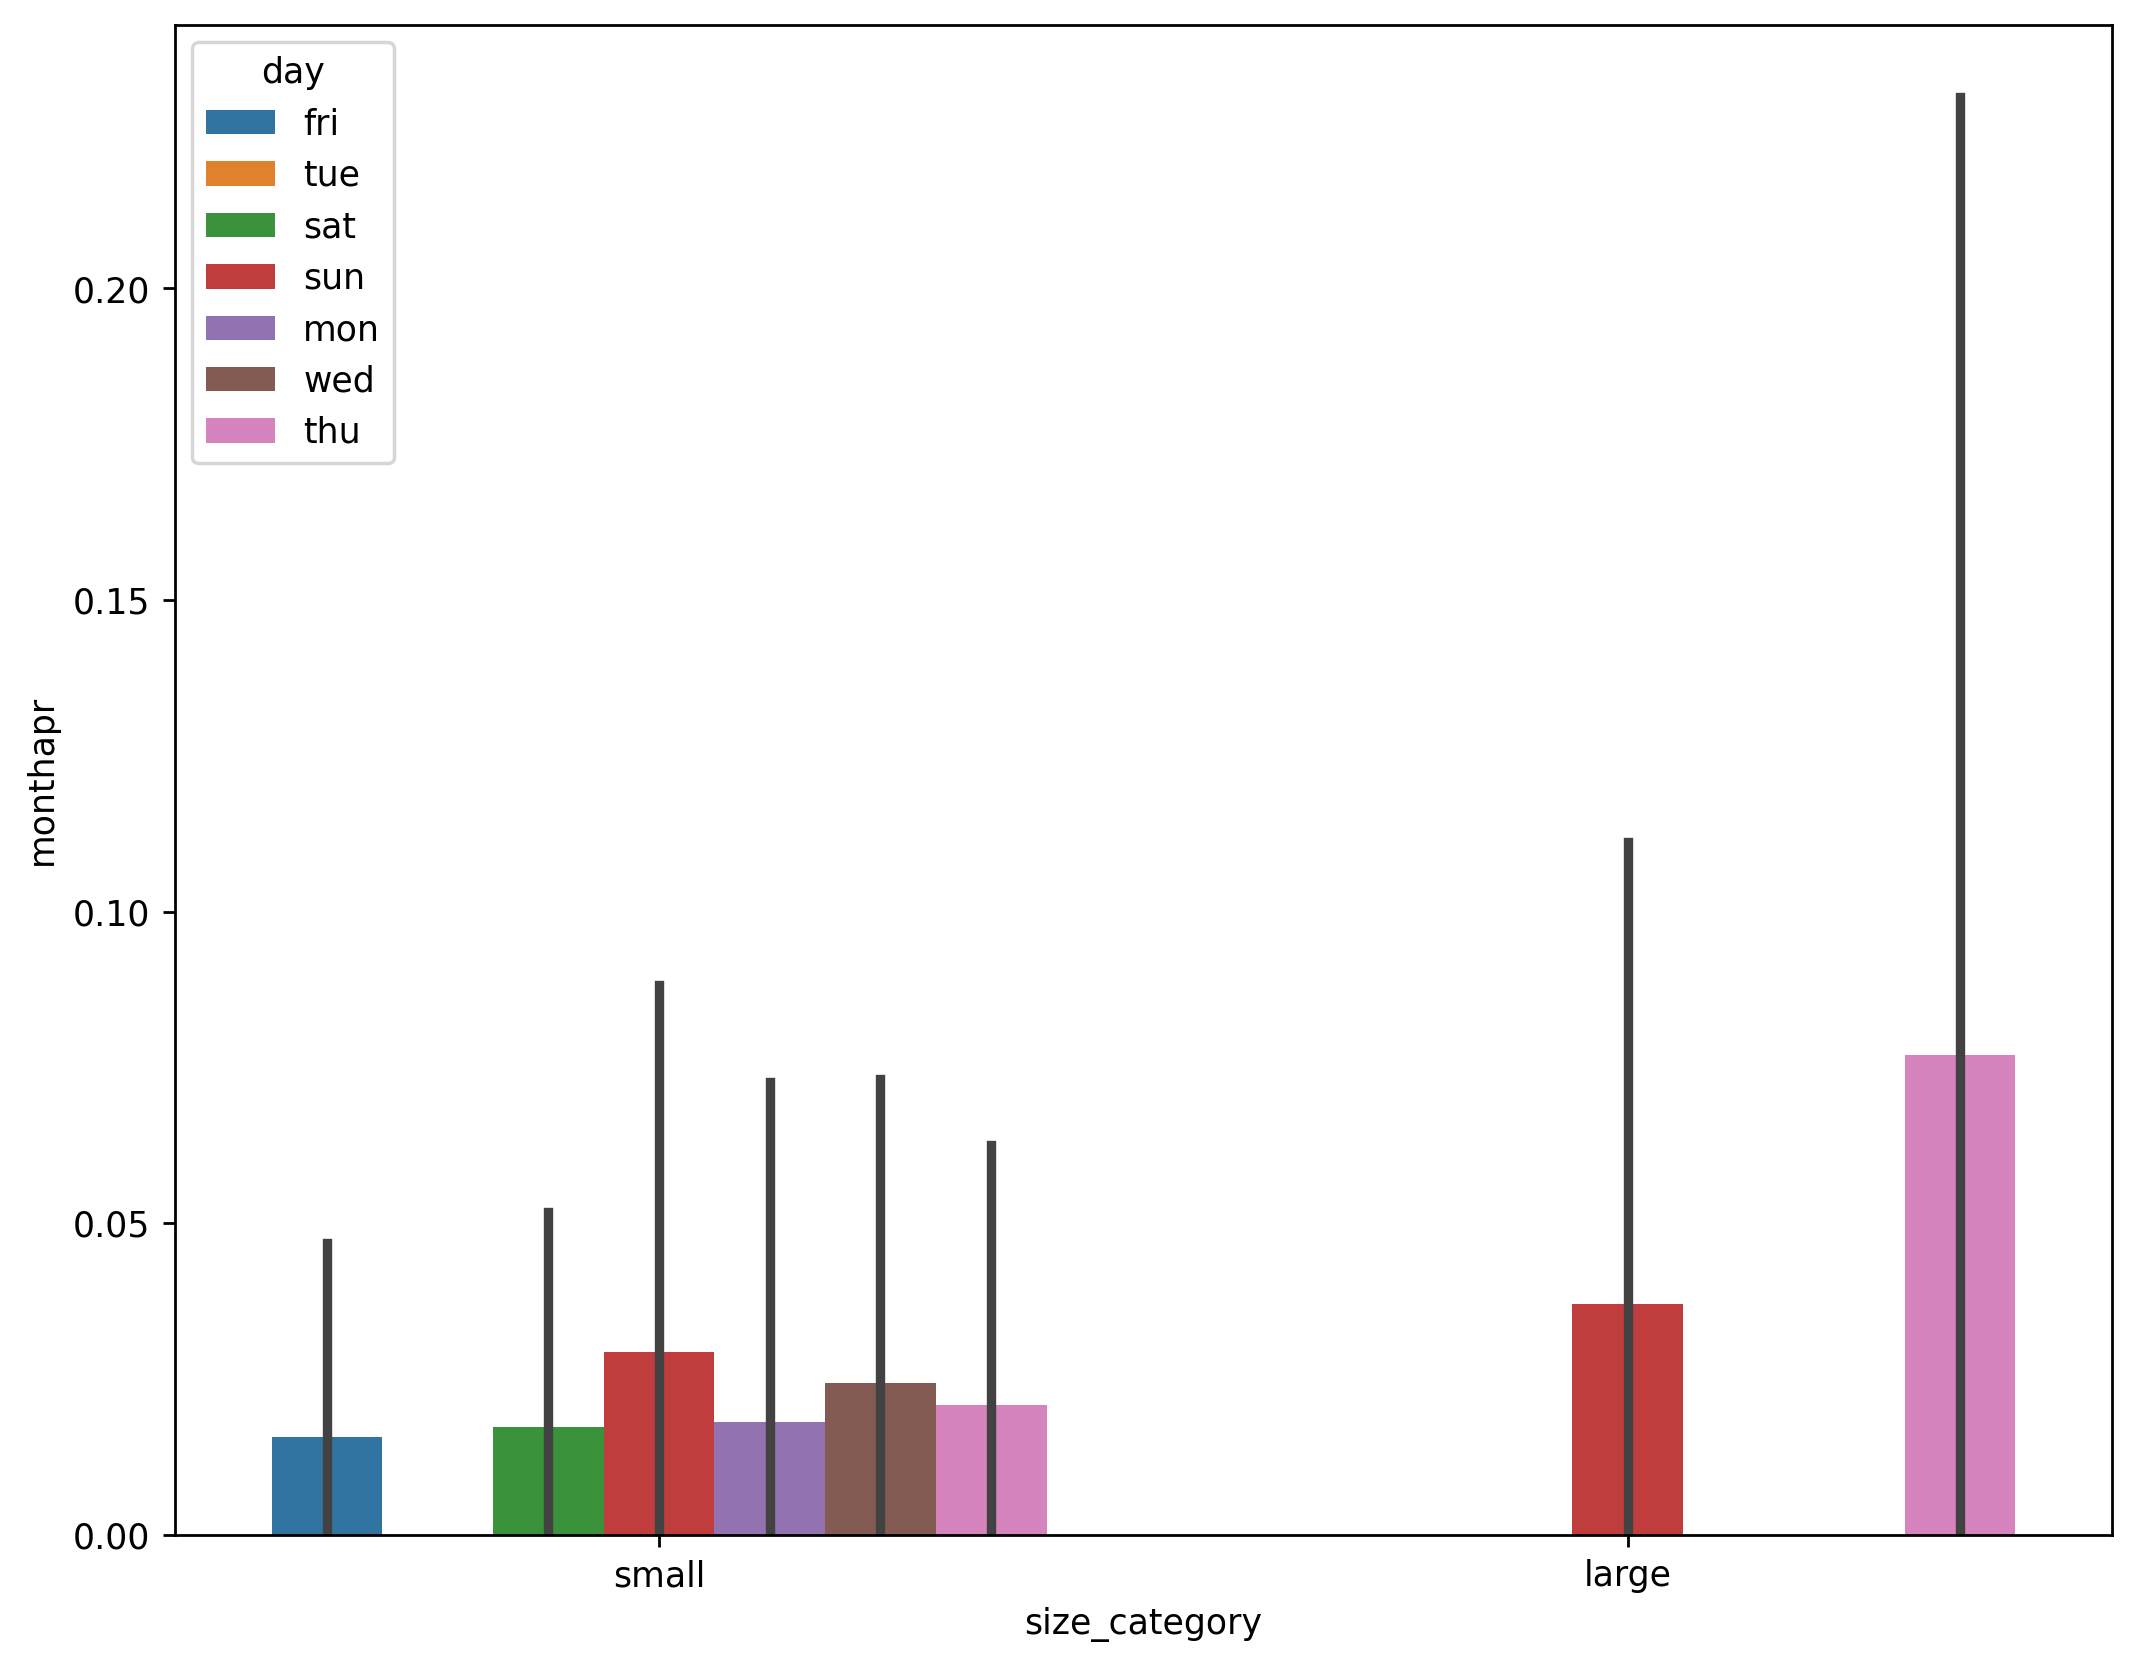

In [14]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthapr",hue="day",data=forest)

# Observation:
In the month of april expect tuesday they burn small area of forest and on sunday and thursday mostly they burn large area of forest

<AxesSubplot:xlabel='size_category', ylabel='monthmay'>

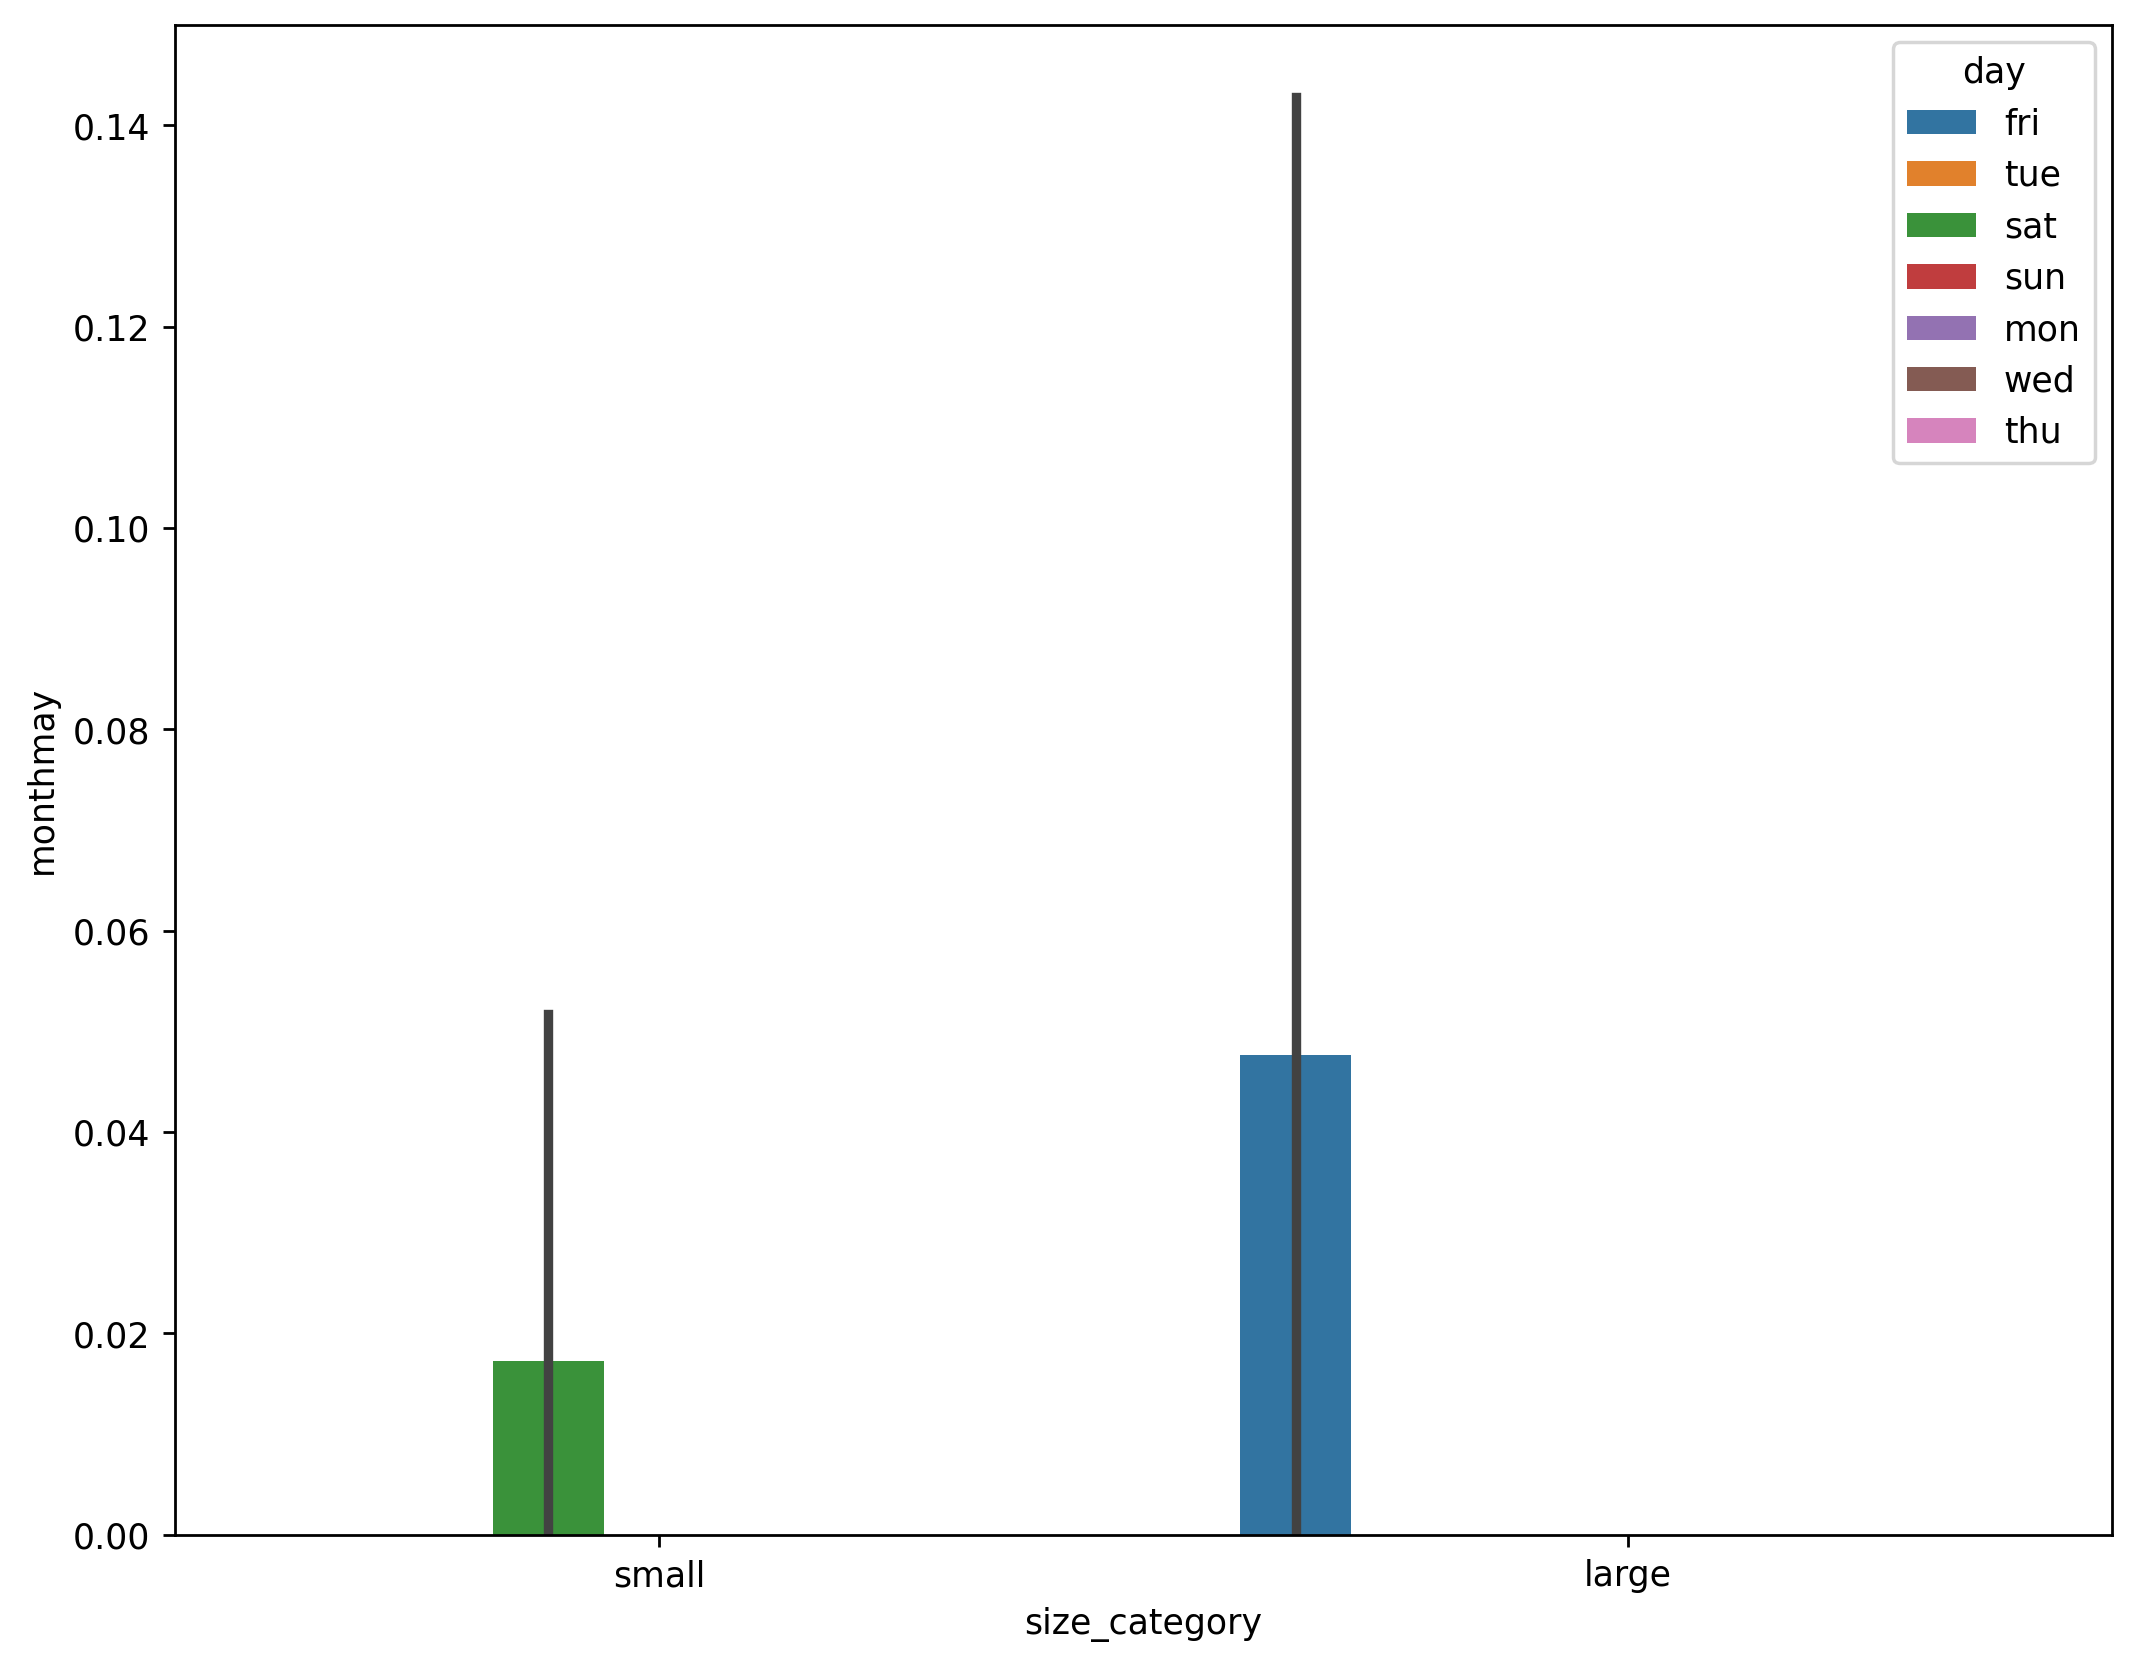

In [15]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthmay",hue="day",data=forest)

# Obervation:
In the month of may they burn on saturday small area of forest and on friday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthjun'>

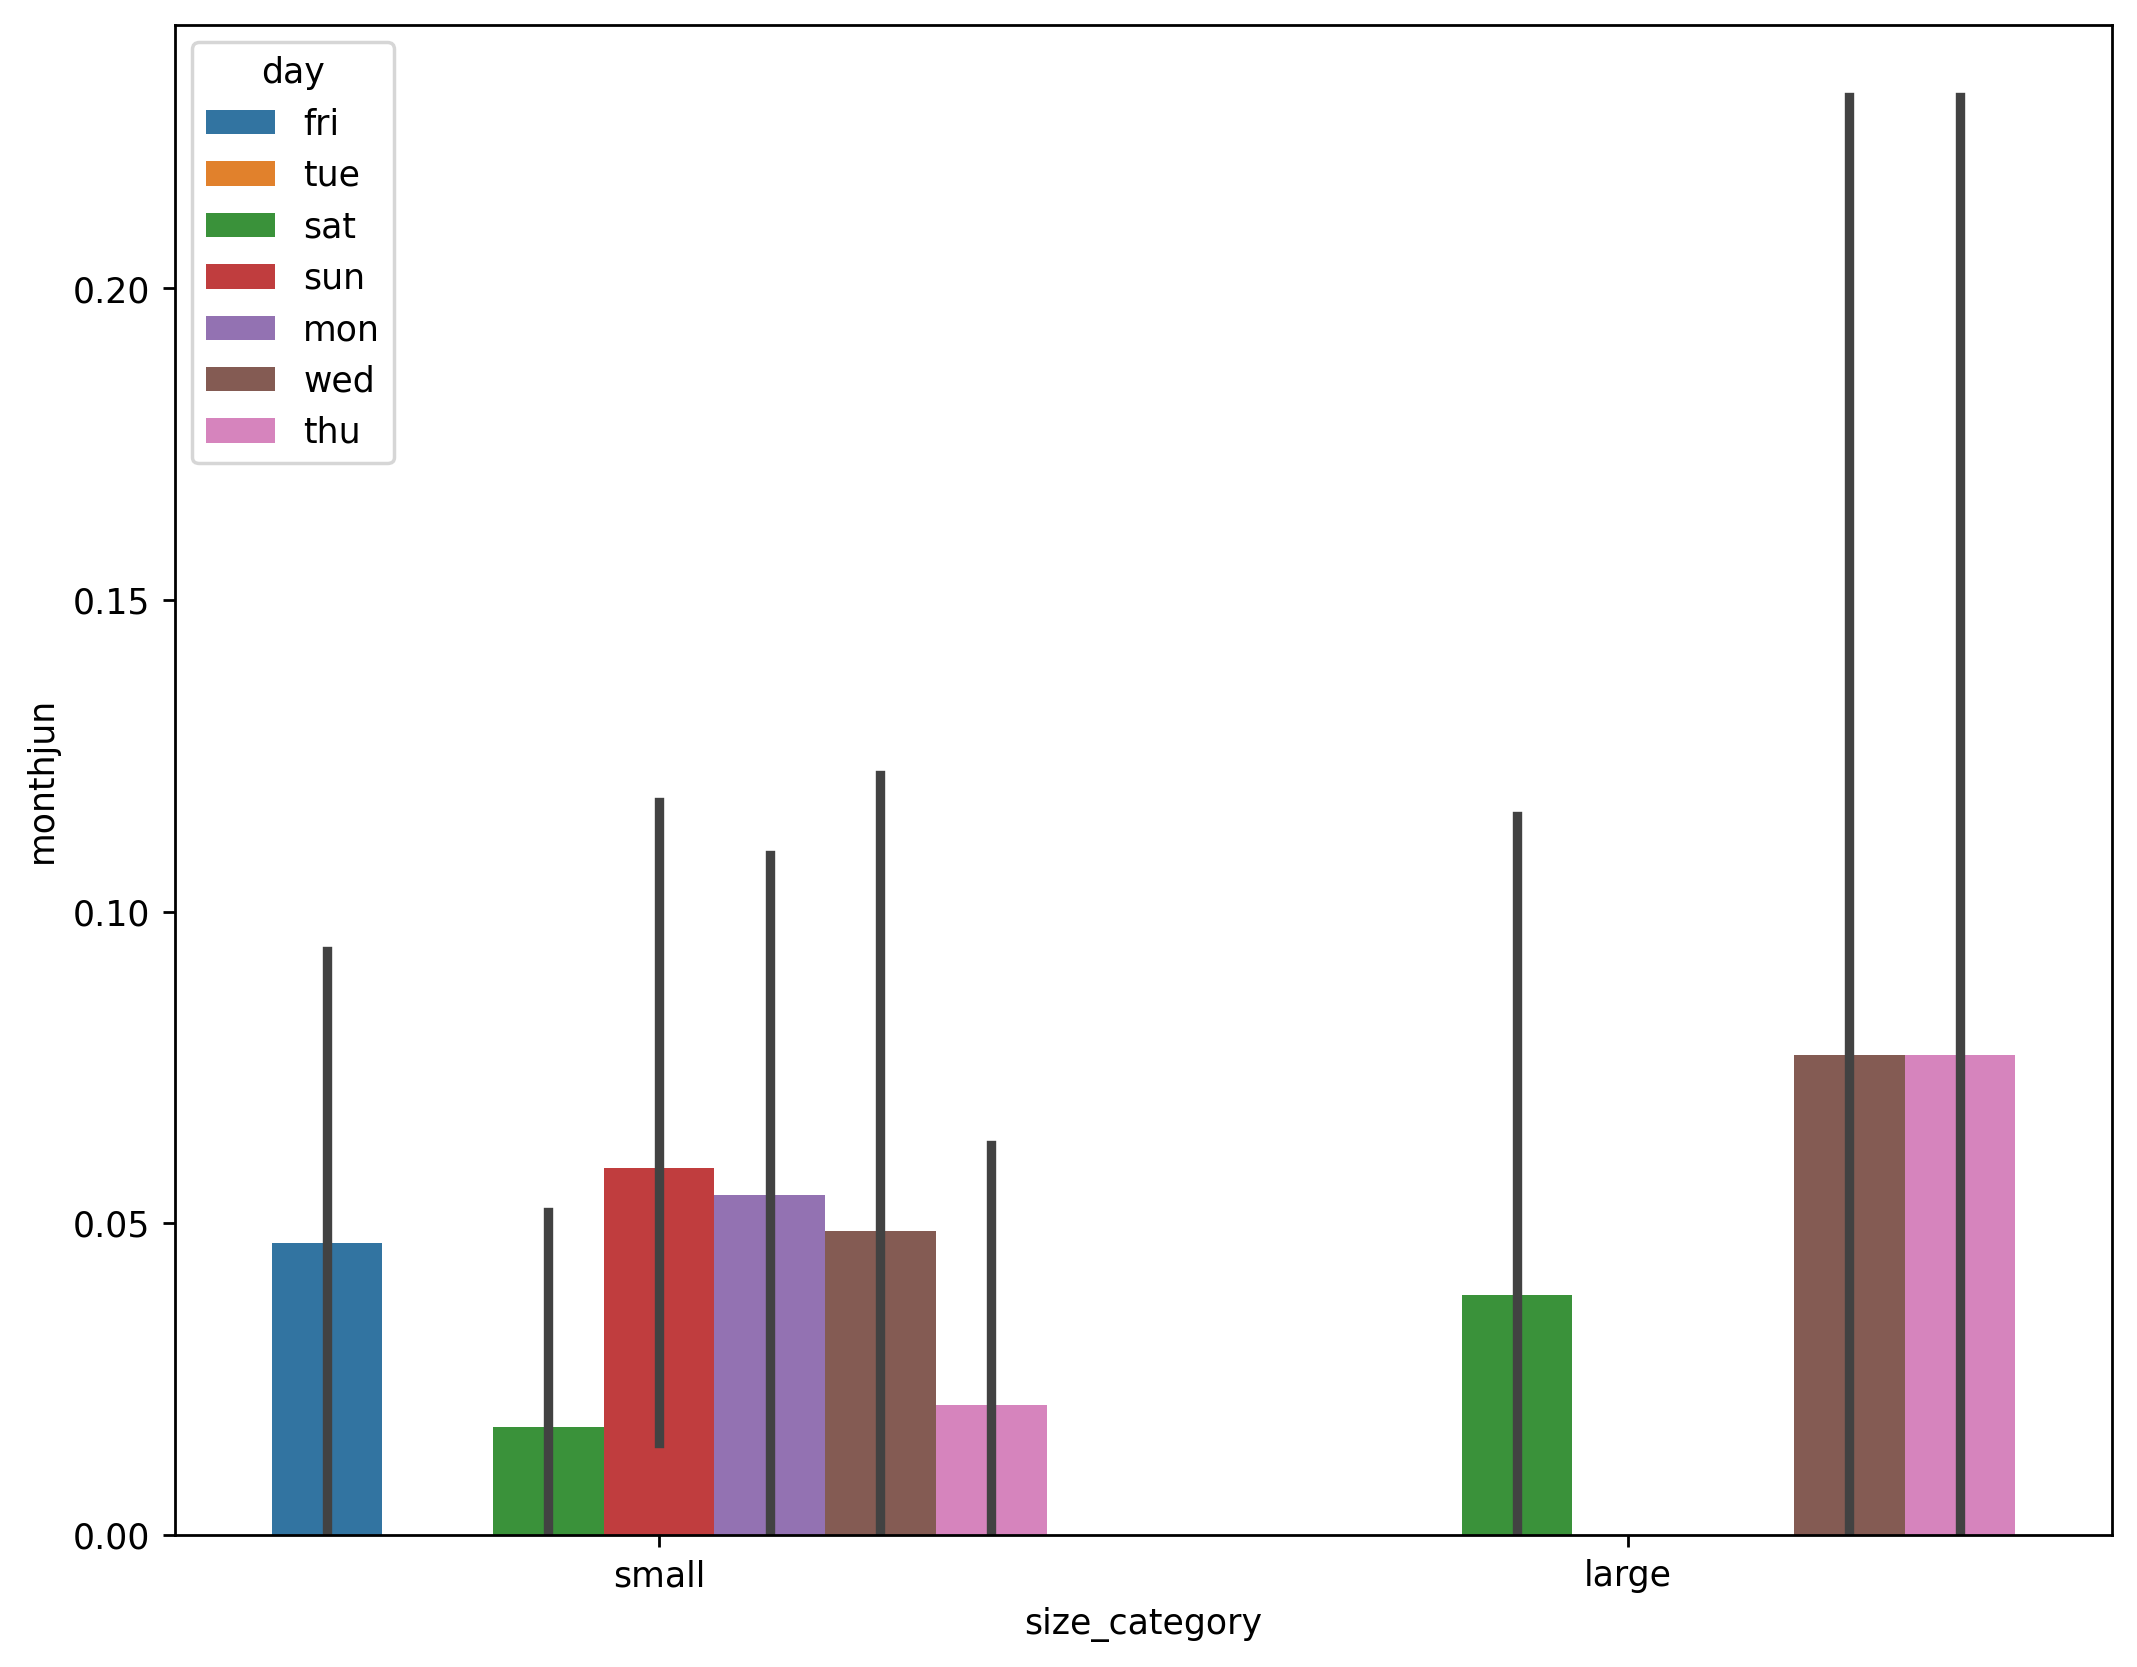

In [16]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot('size_category',"monthjun",hue="day",data=forest)

# Observation:
In the month of june expect tuesday they burn small area of forest and on saturday,wednessday and thursday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthjul'>

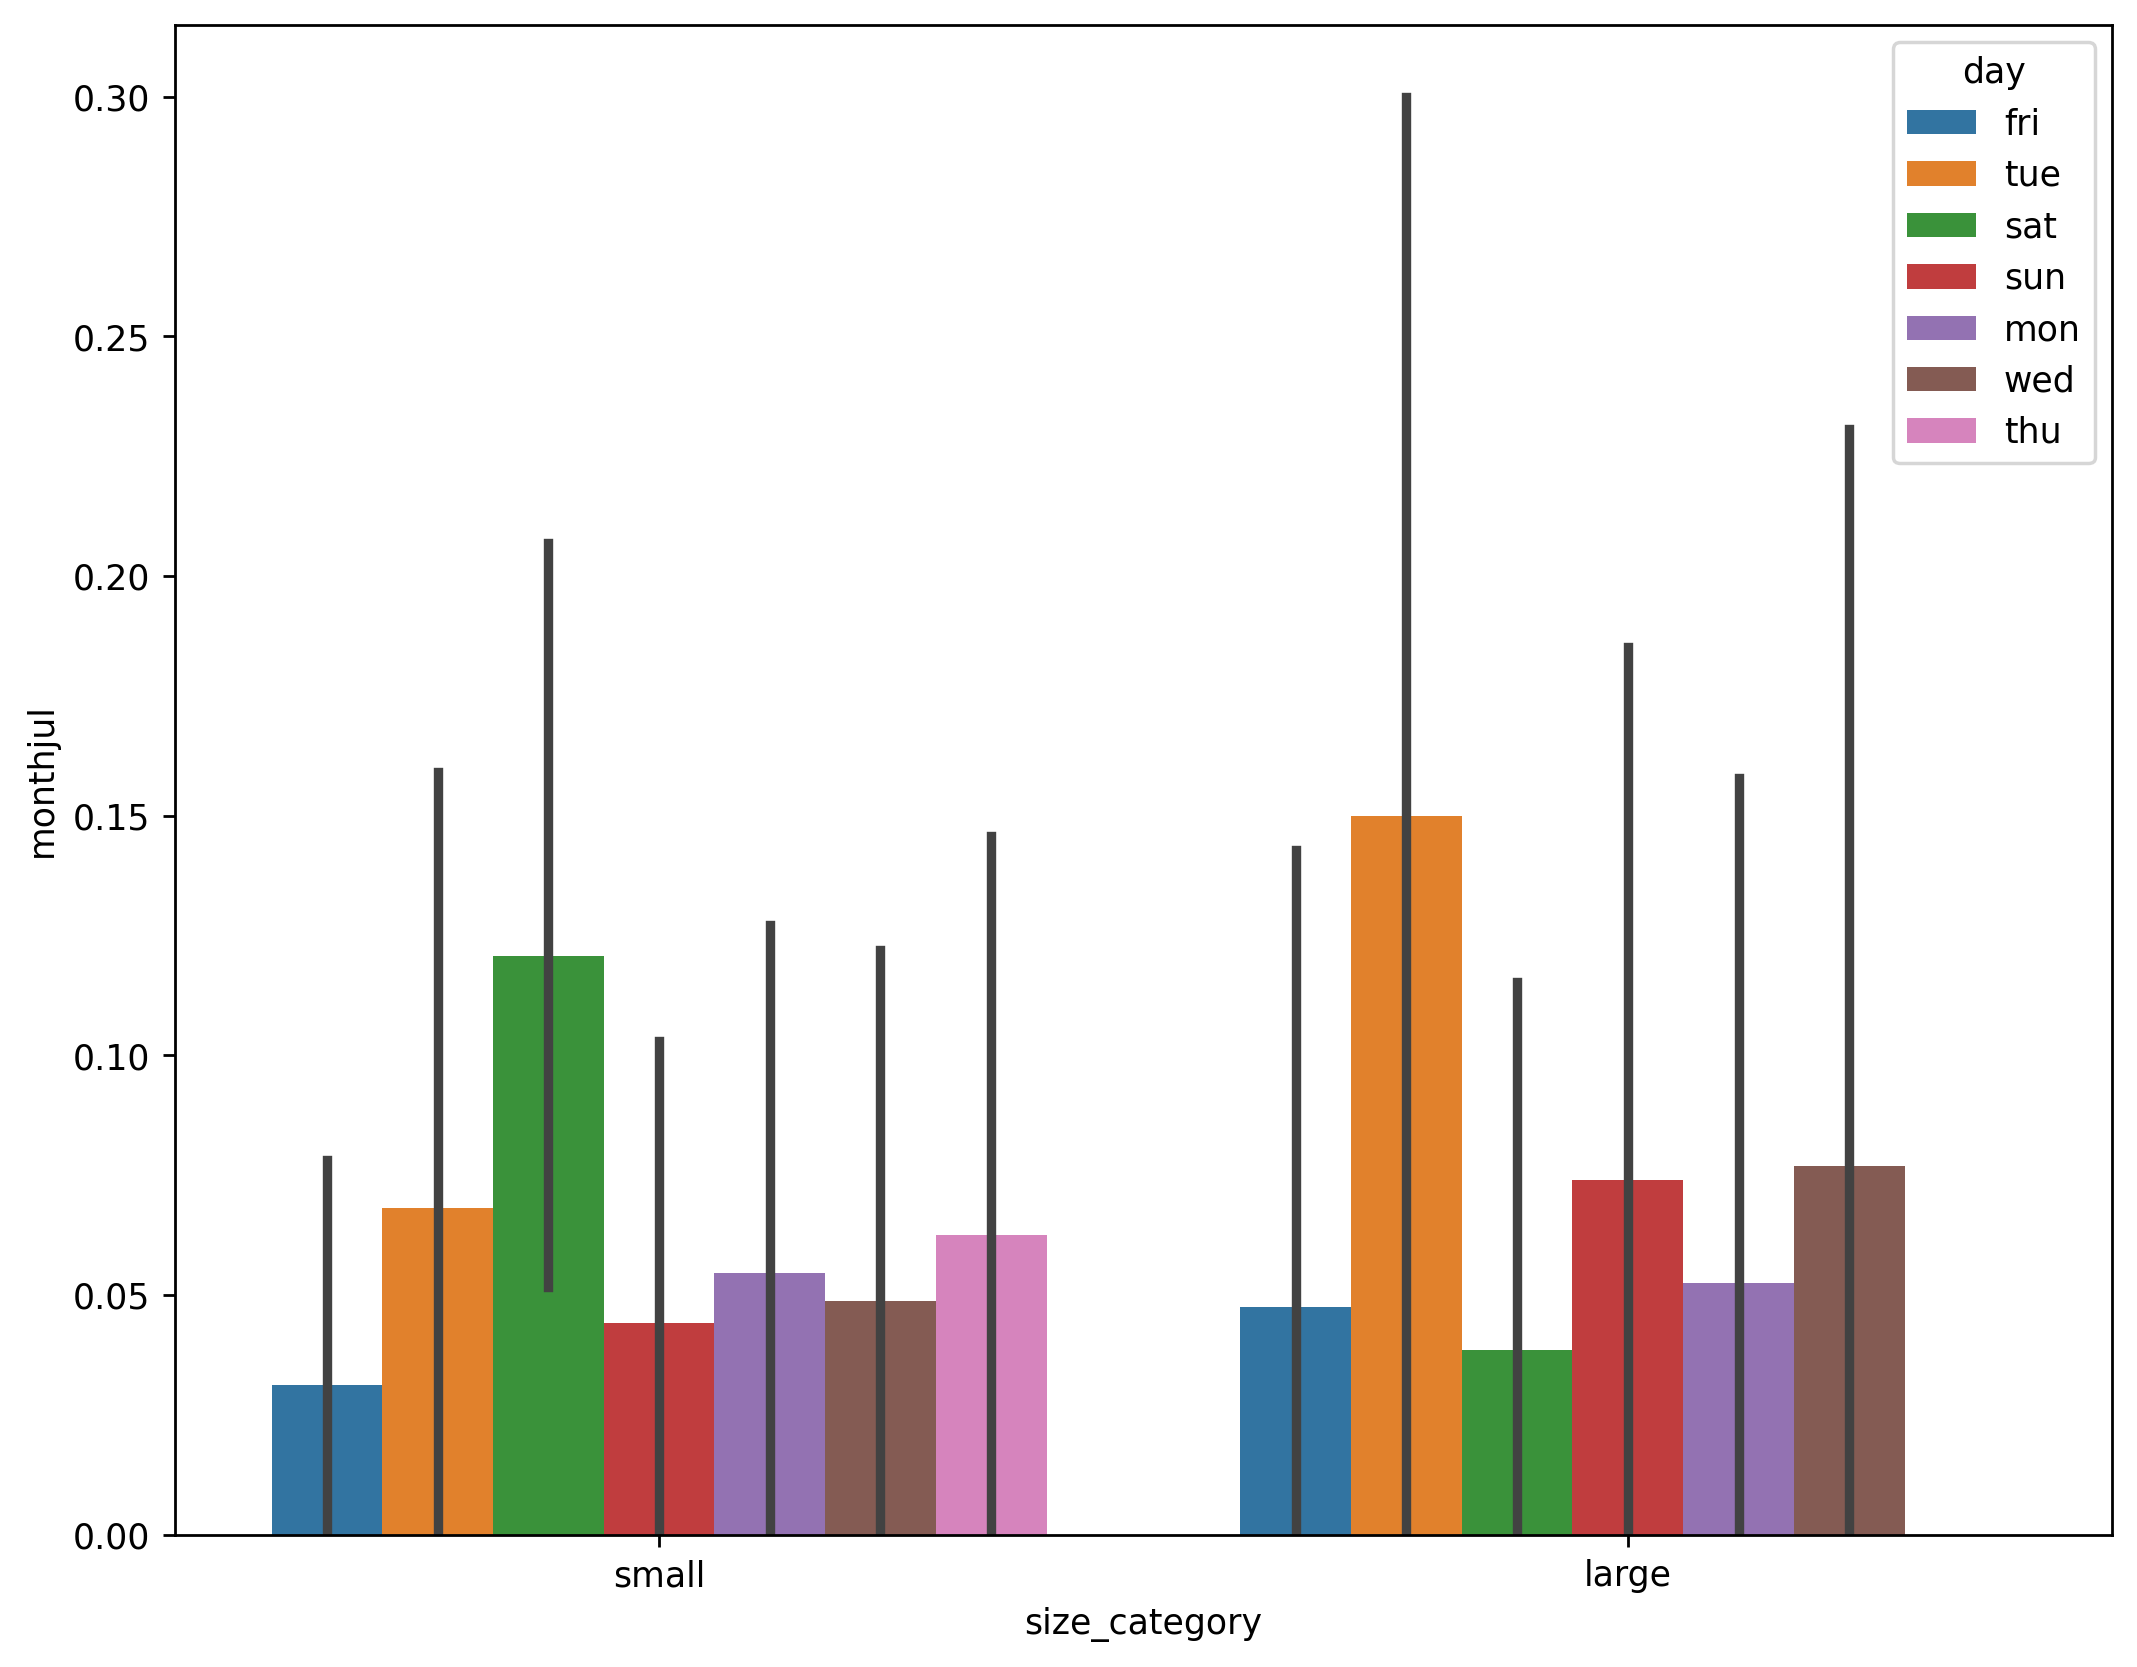

In [17]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthjul",hue="day",data=forest)

# Observation:
In the mont of july all seven days they burn small area of the forest and expect thursday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthaug'>

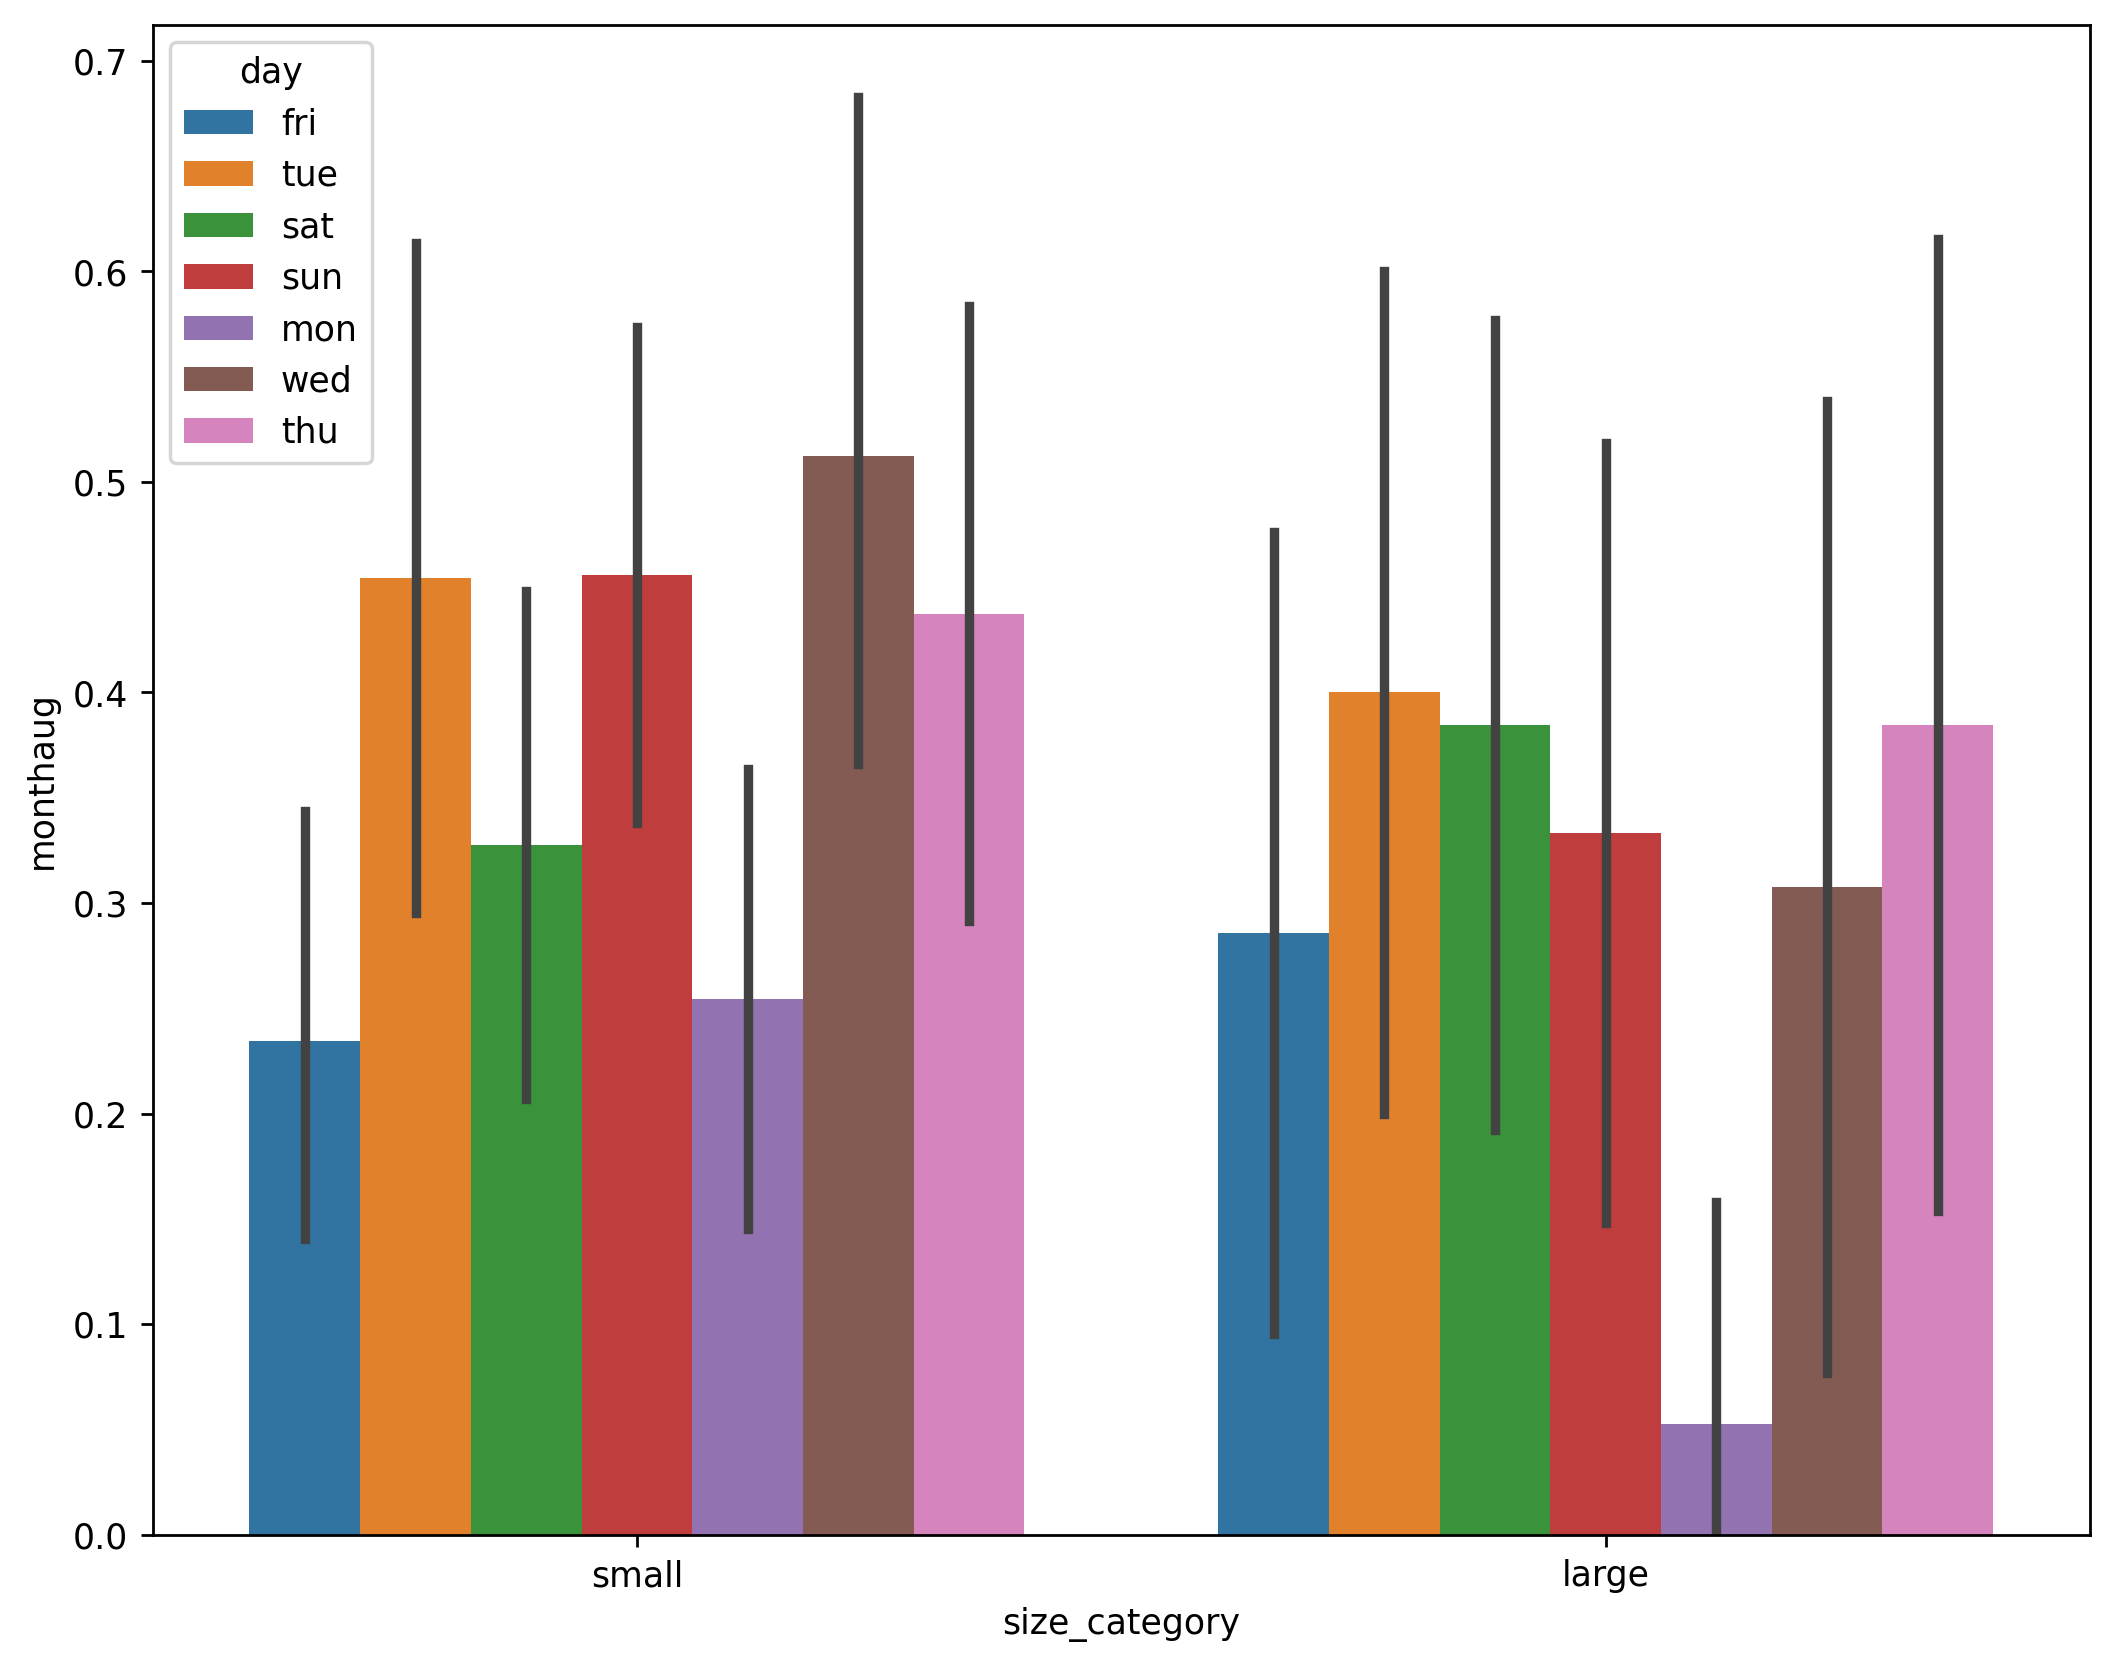

In [18]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthaug",hue="day",data=forest)

# Observation :
In the month of august all seven days a week they burn large area of the forest as well as small area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthsep'>

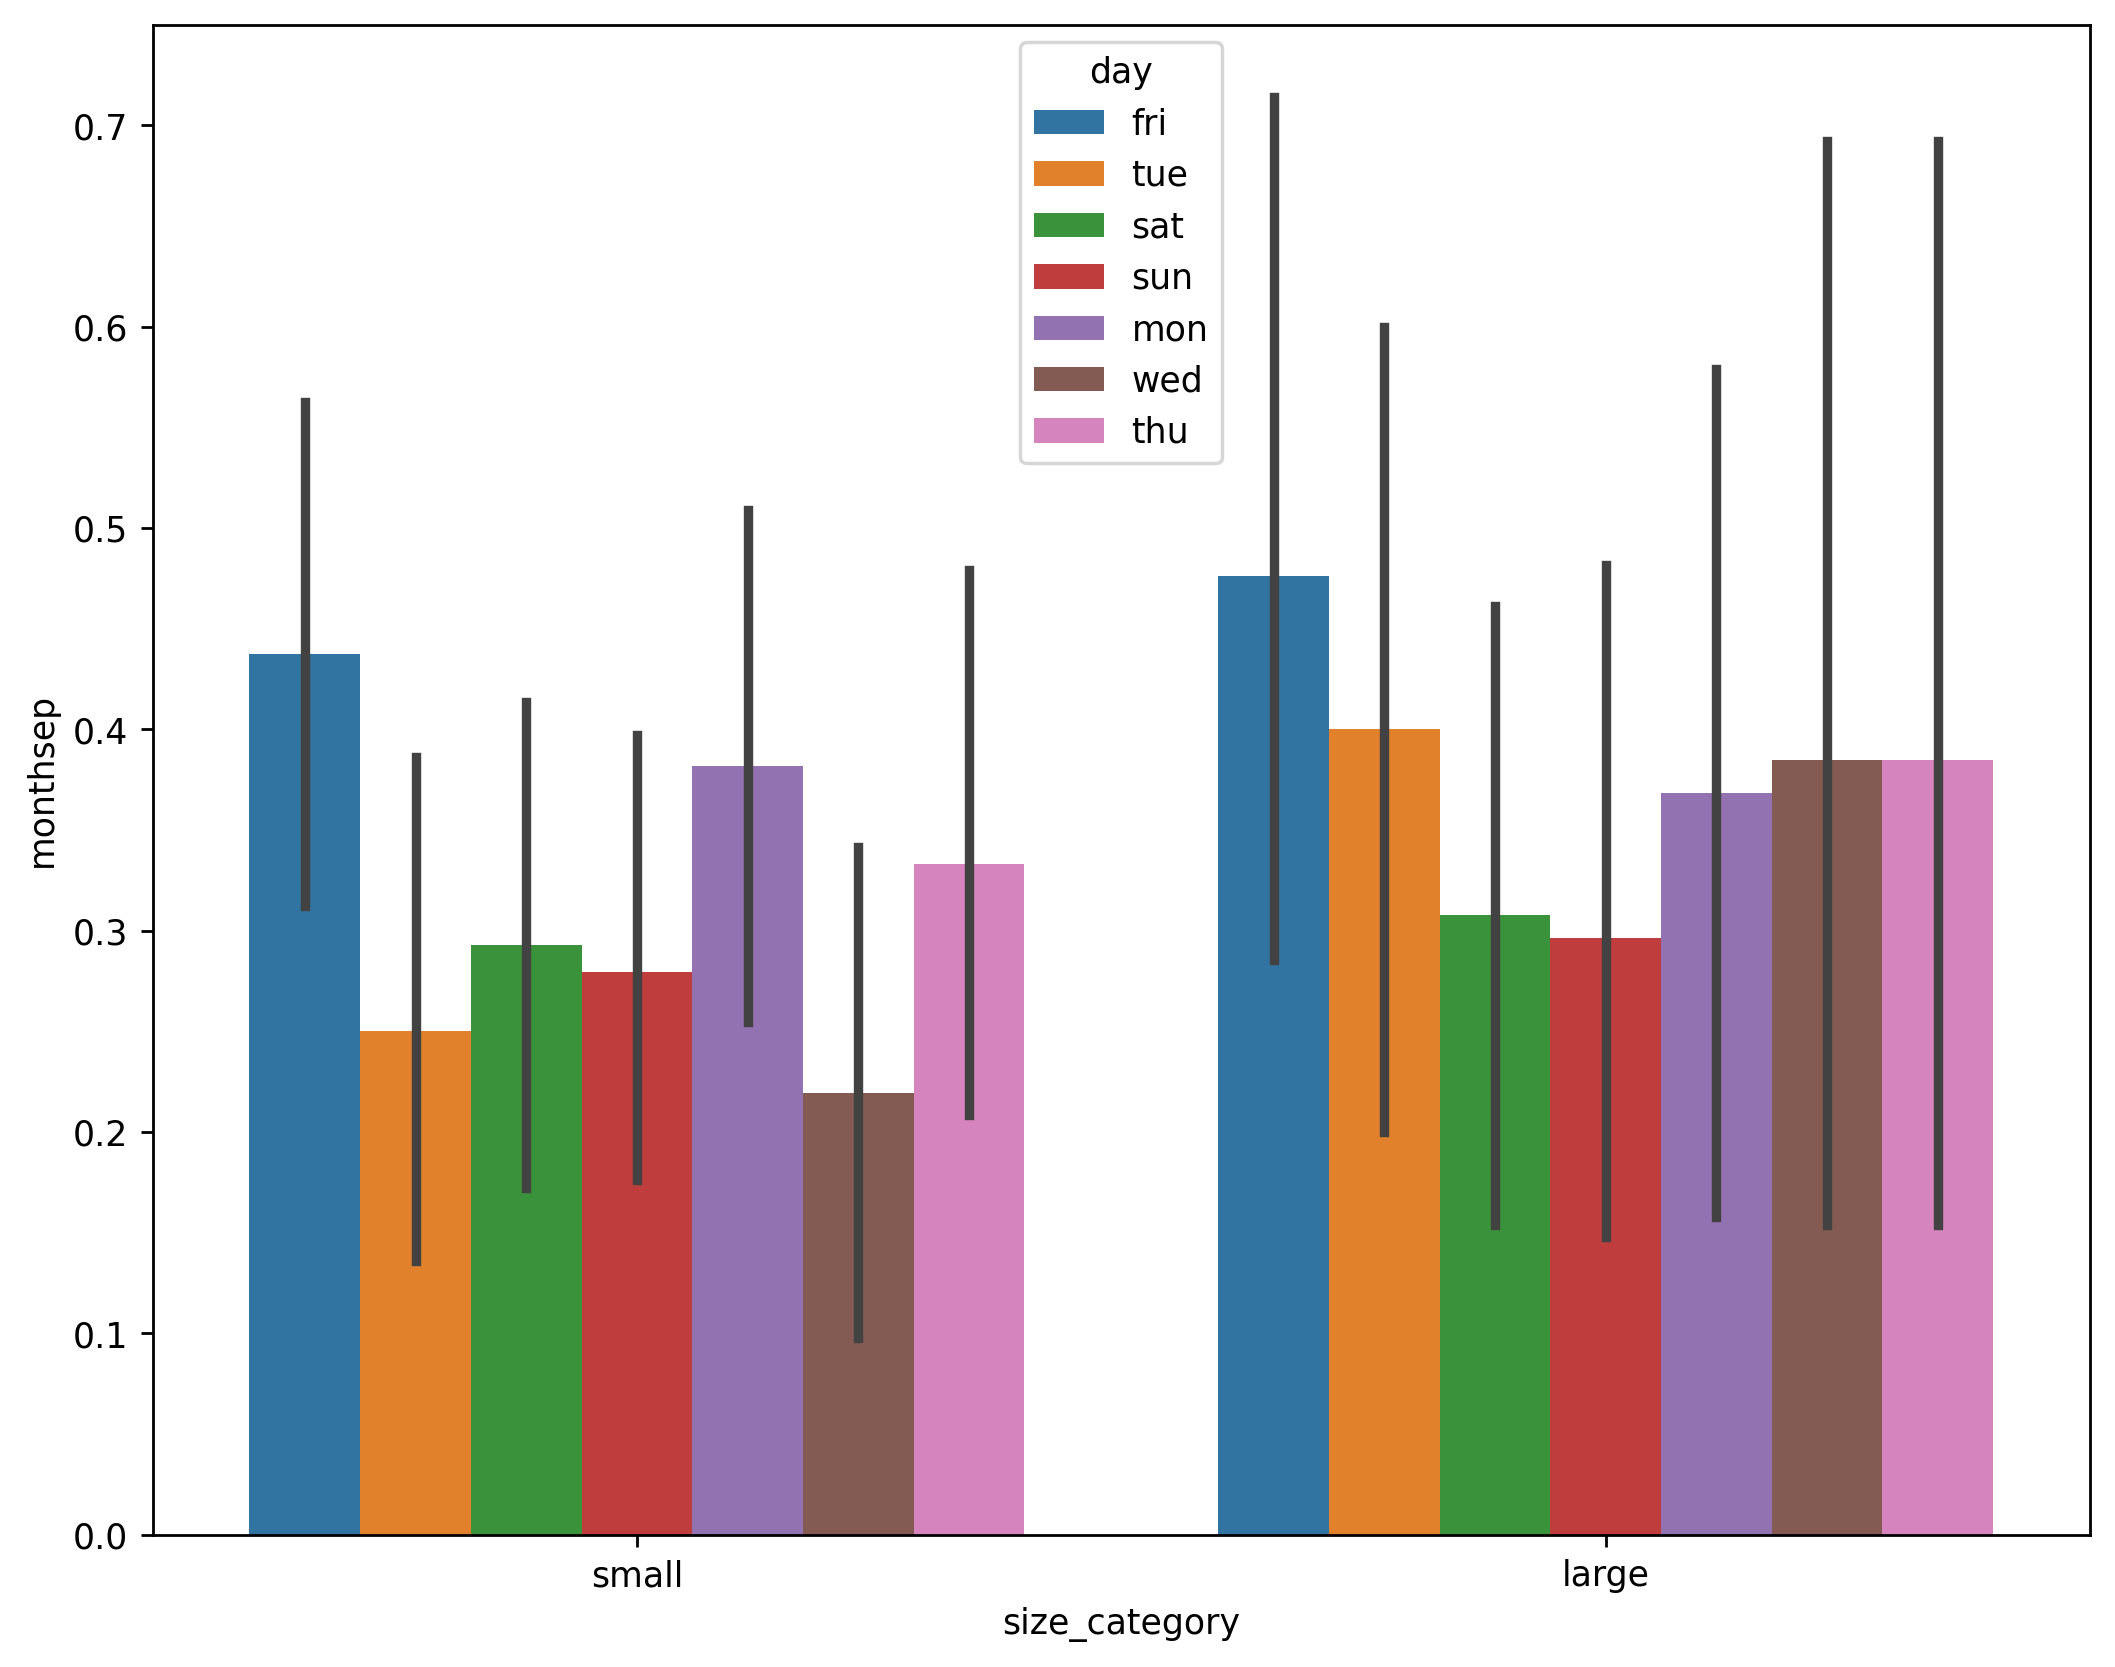

In [19]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthsep",hue="day",data=forest)

# Observation:
In the month of september seven days a week they burn large area of the forest as well as small area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthoct'>

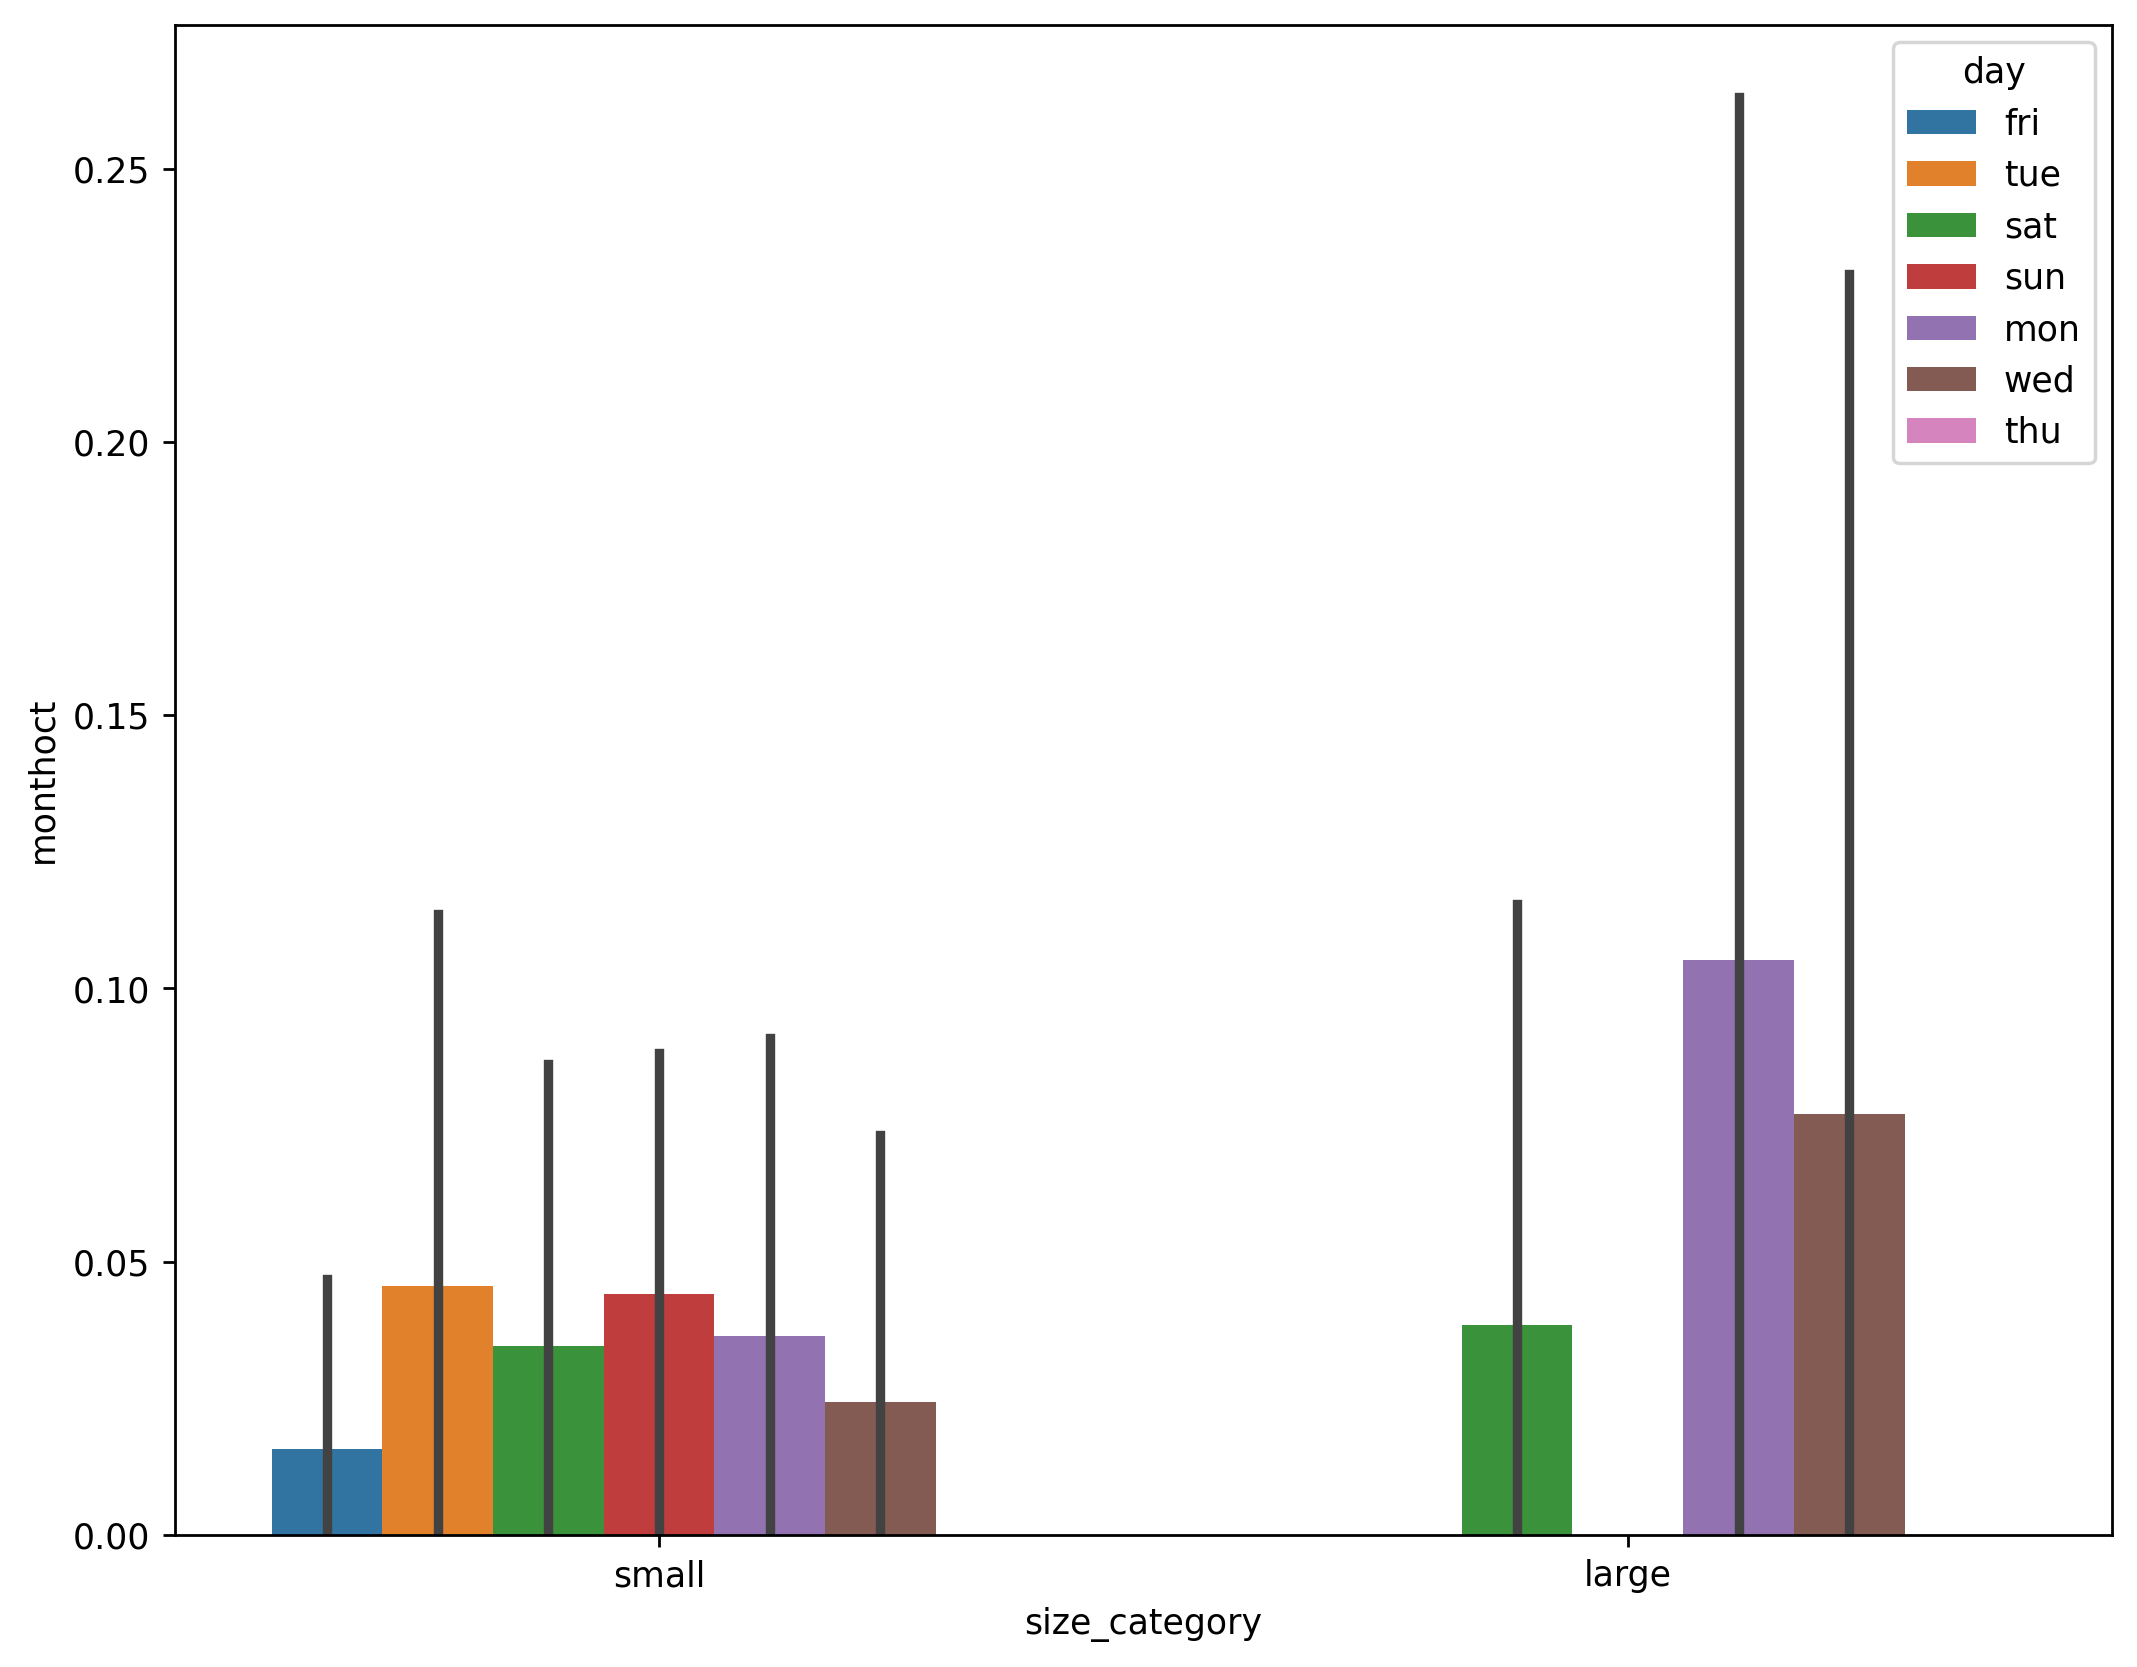

In [20]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthoct",hue="day",data=forest)

# Observation:
In the month of october they burn small area of forest except on thursday and on monday,wednessday and saturday they burn large of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthnov'>

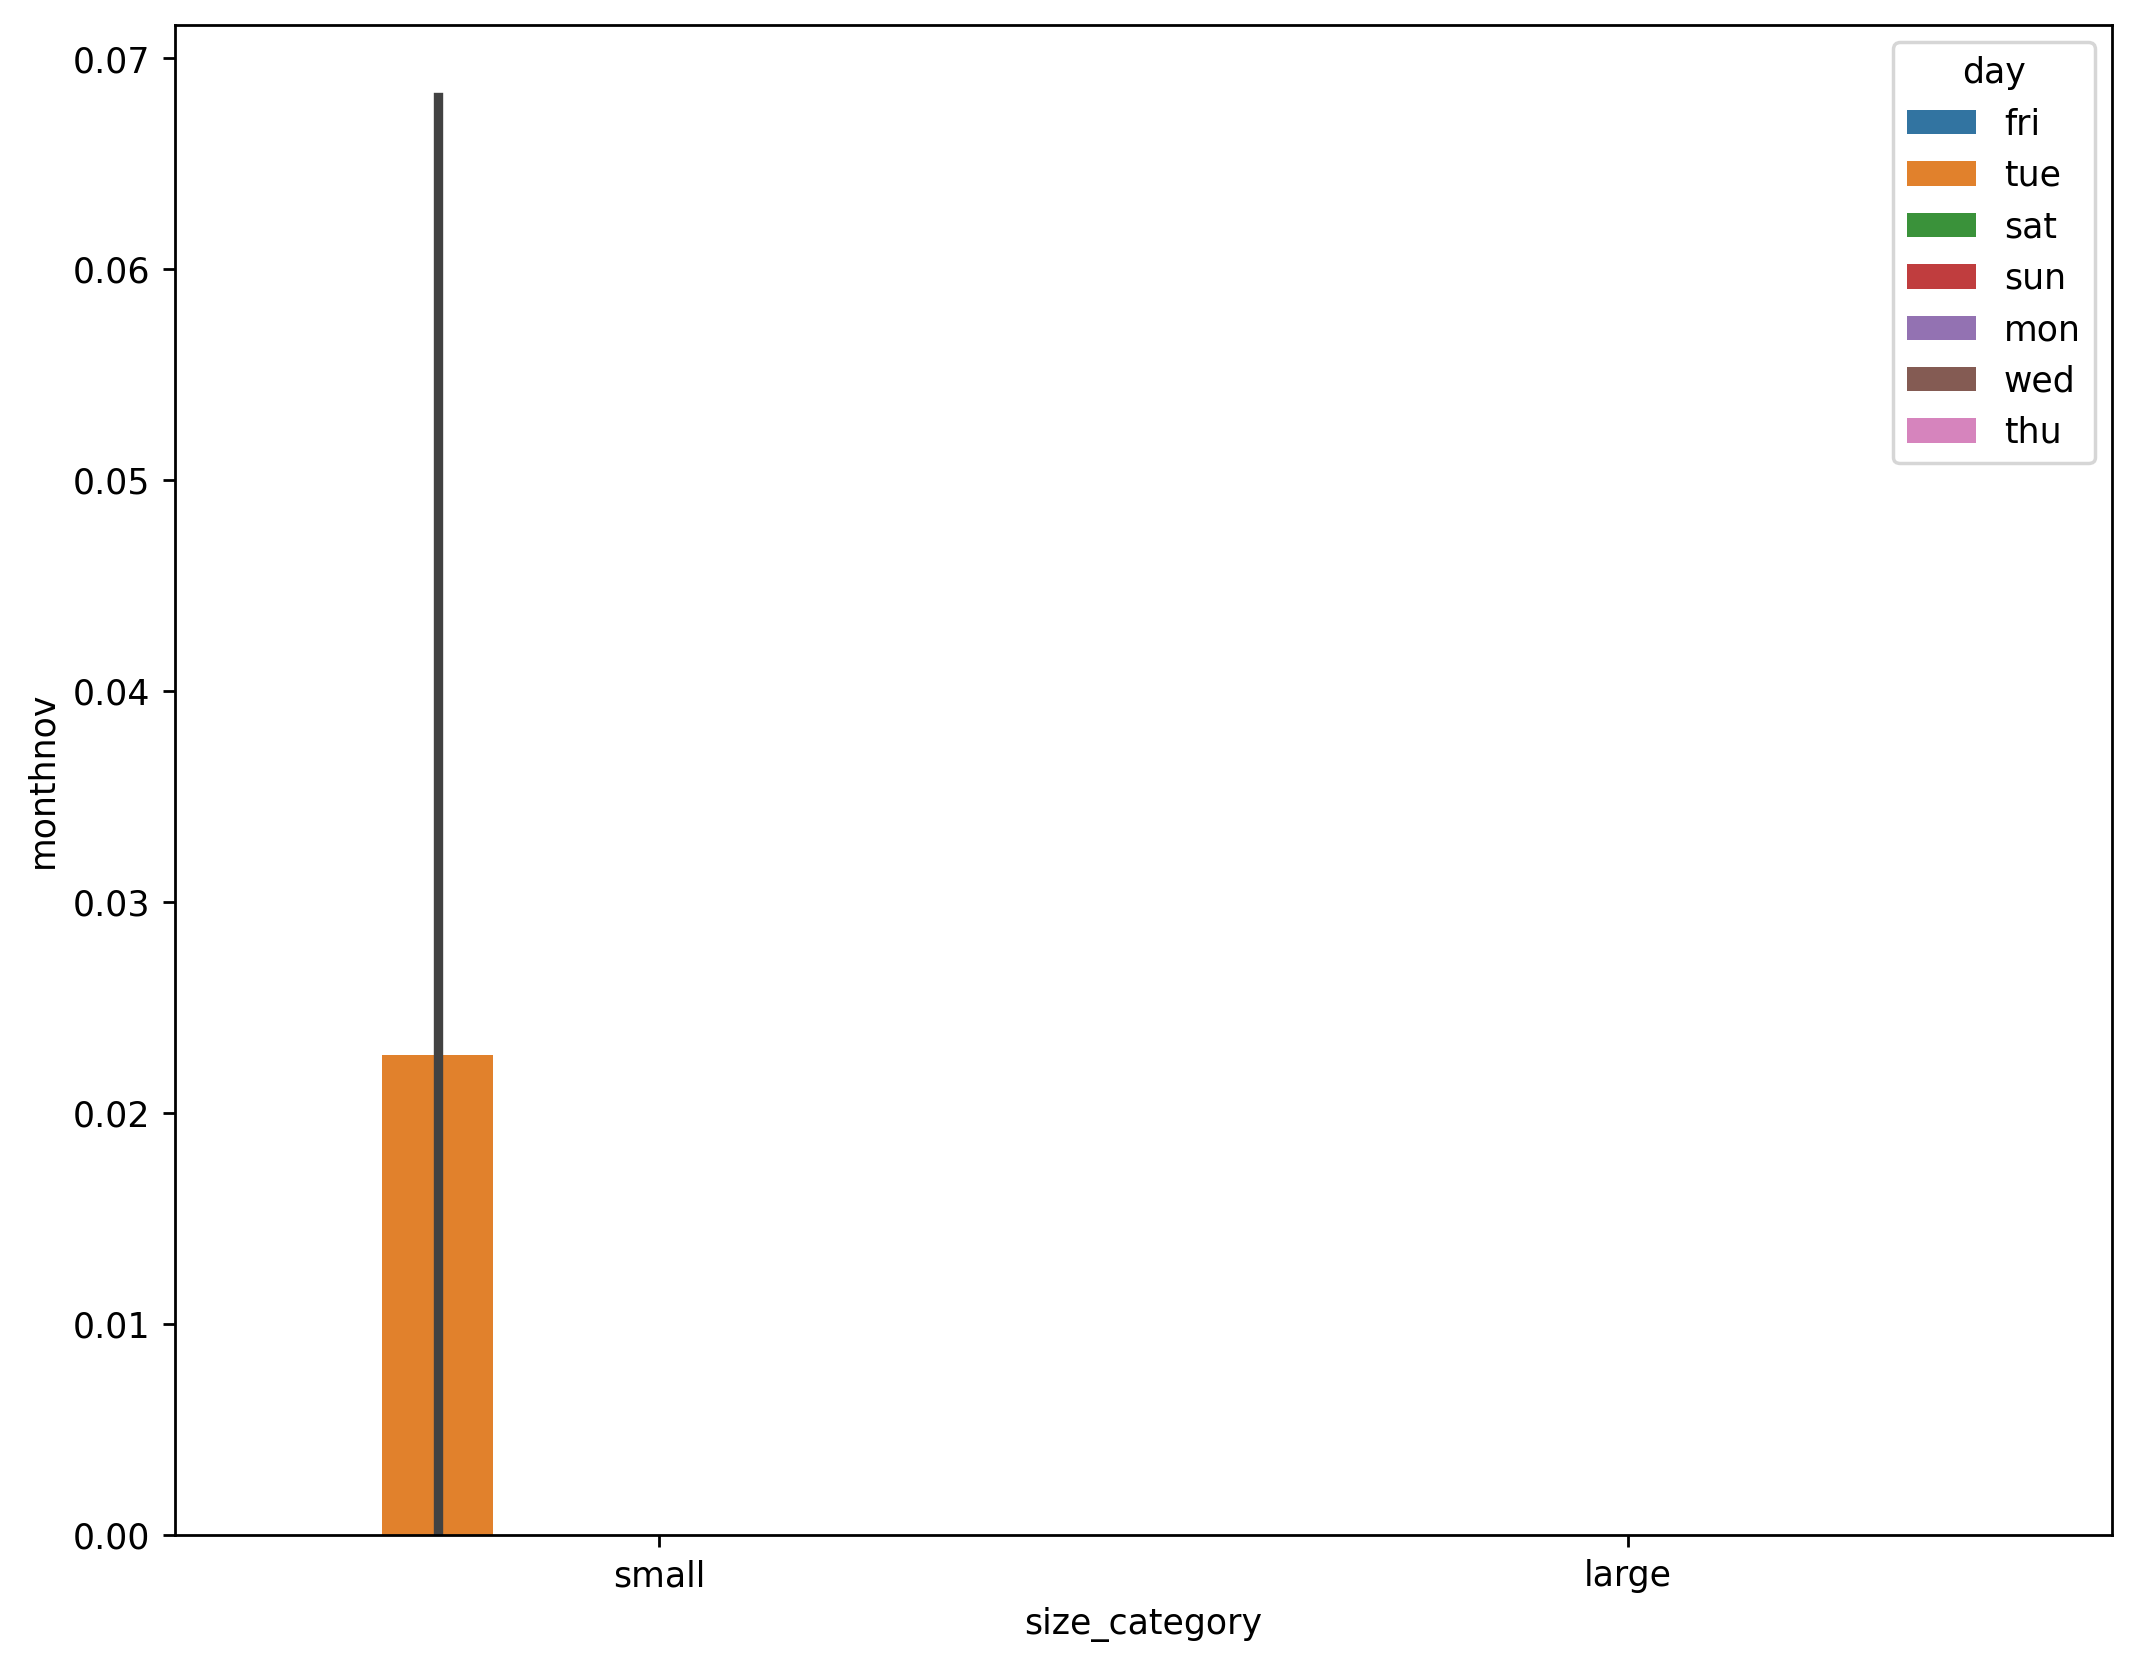

In [21]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthnov",hue="day",data=forest)

# Observation:
In the month of november they only burn small area of the forest on tuesday

<AxesSubplot:xlabel='size_category', ylabel='monthdec'>

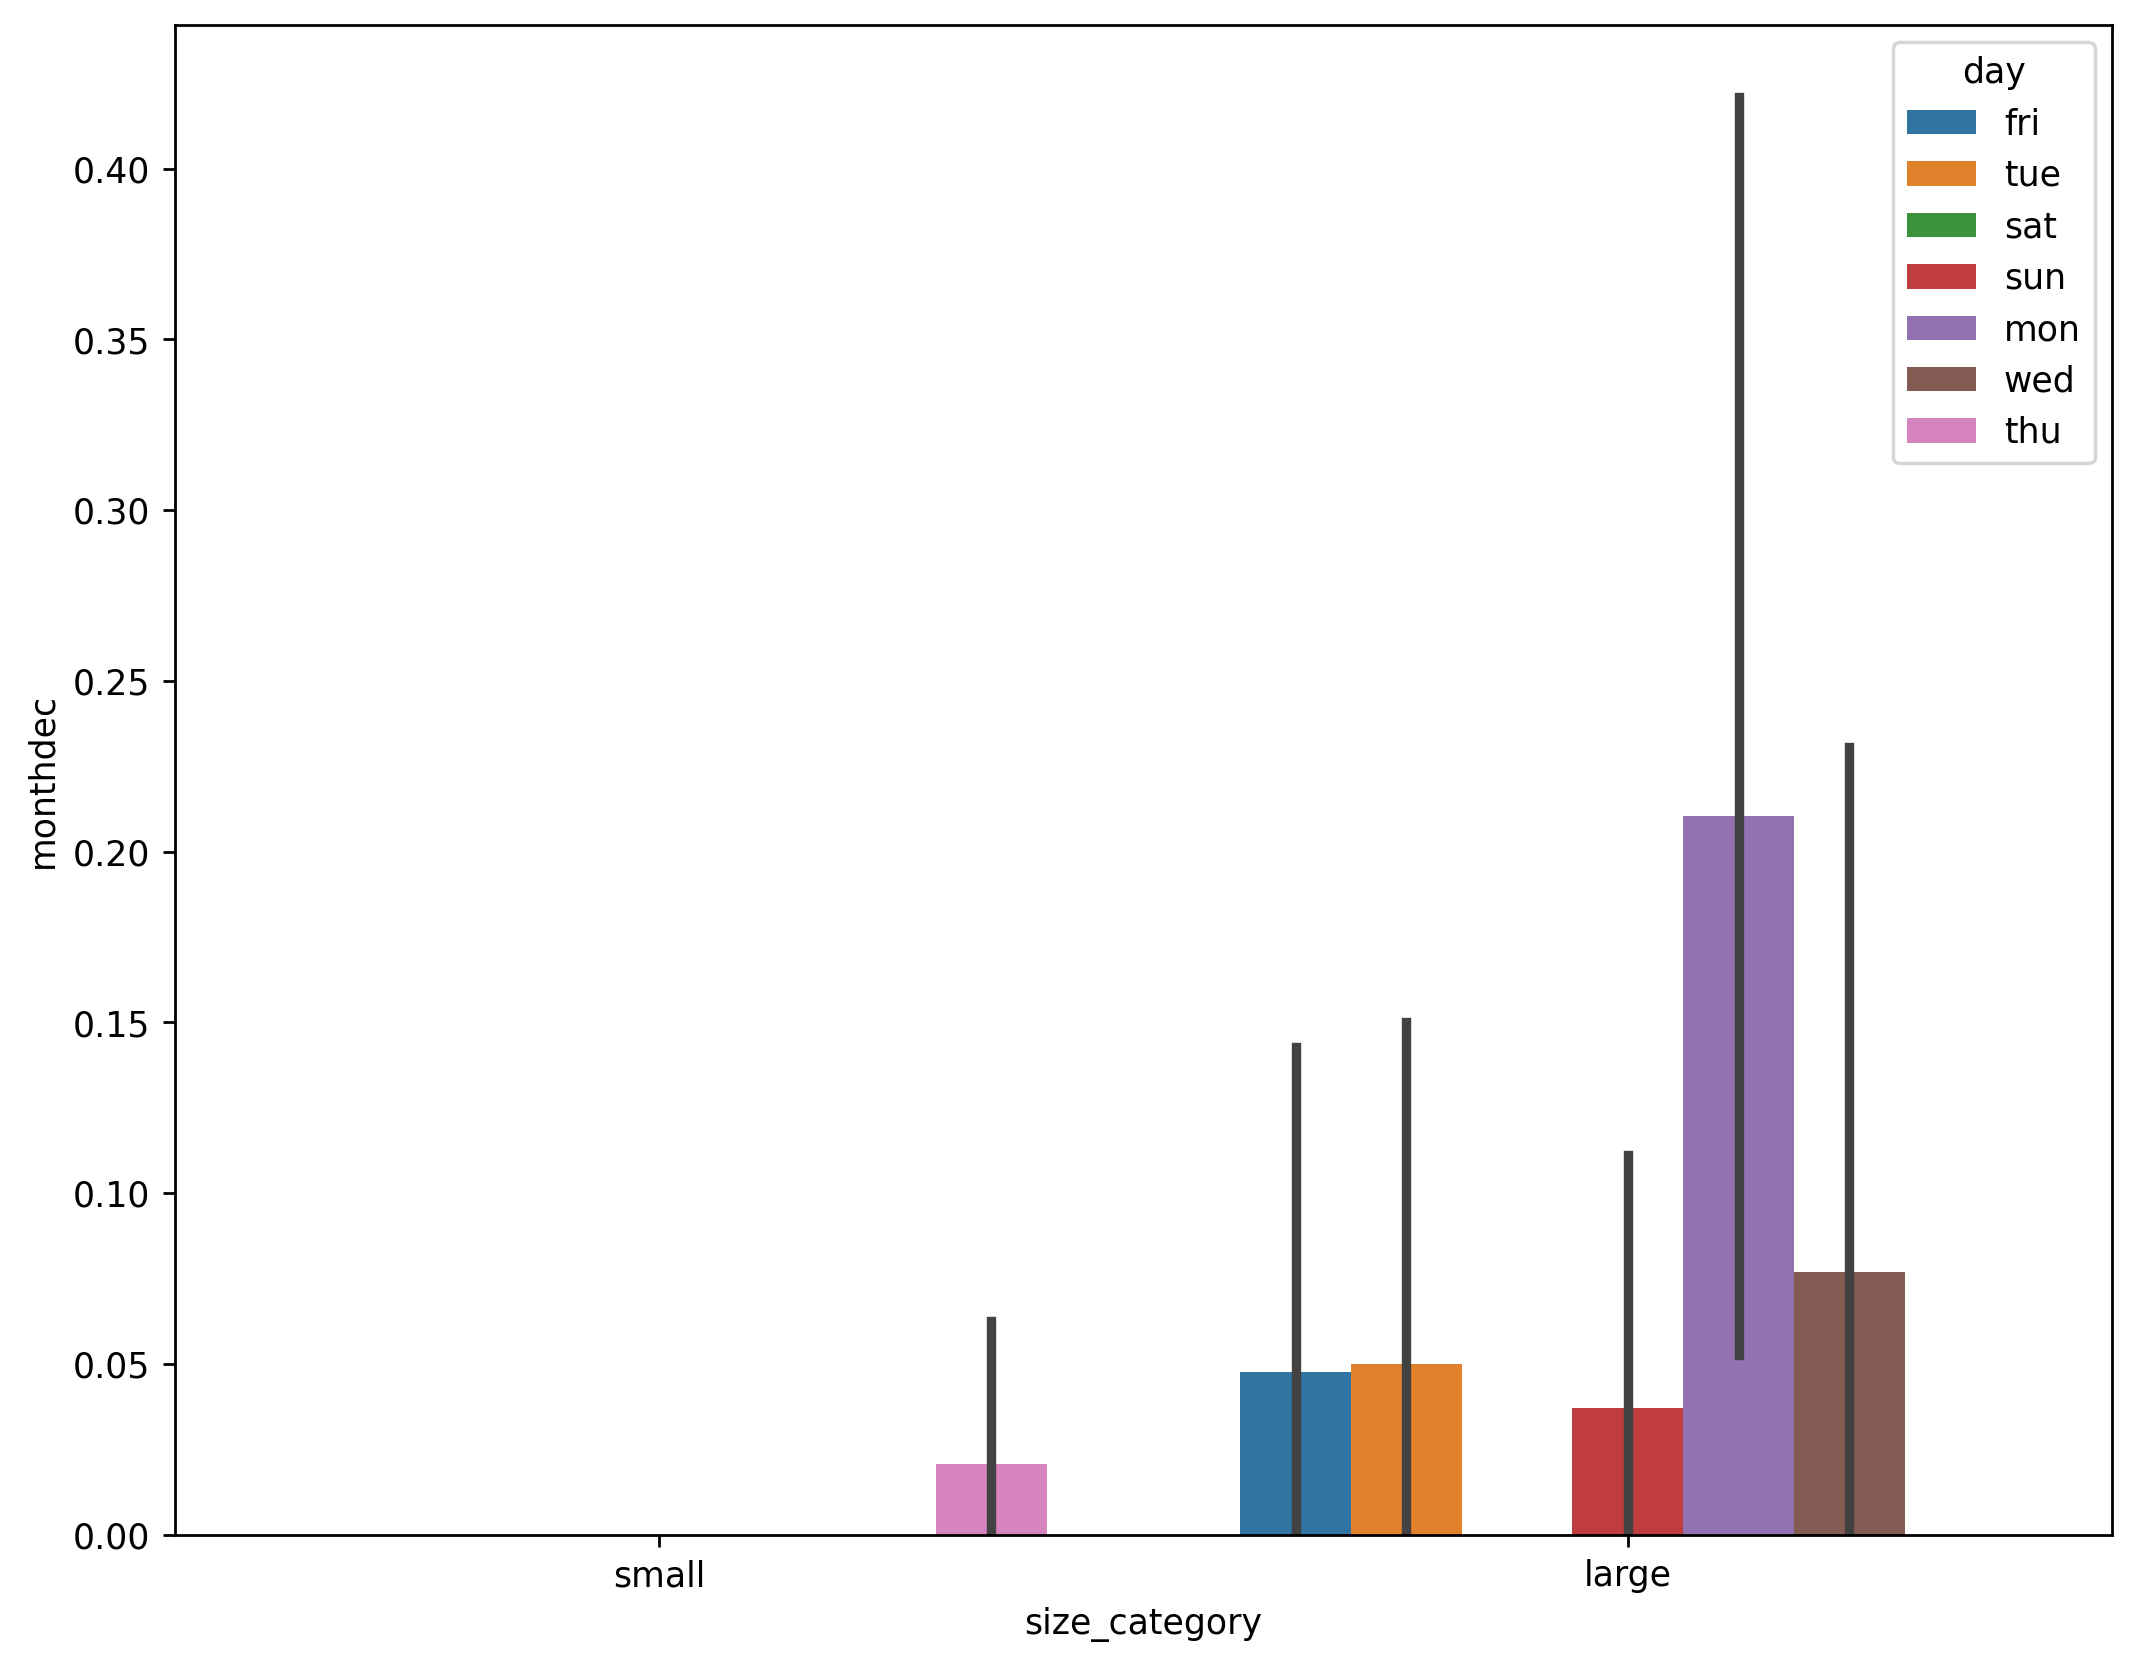

In [22]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthdec",hue="day",data=forest)

# Observation:
In the month of december they burn small area of forest on thurday and except thursday and saturday they burn large area of the forest

<AxesSubplot:xlabel='month', ylabel='FFMC'>

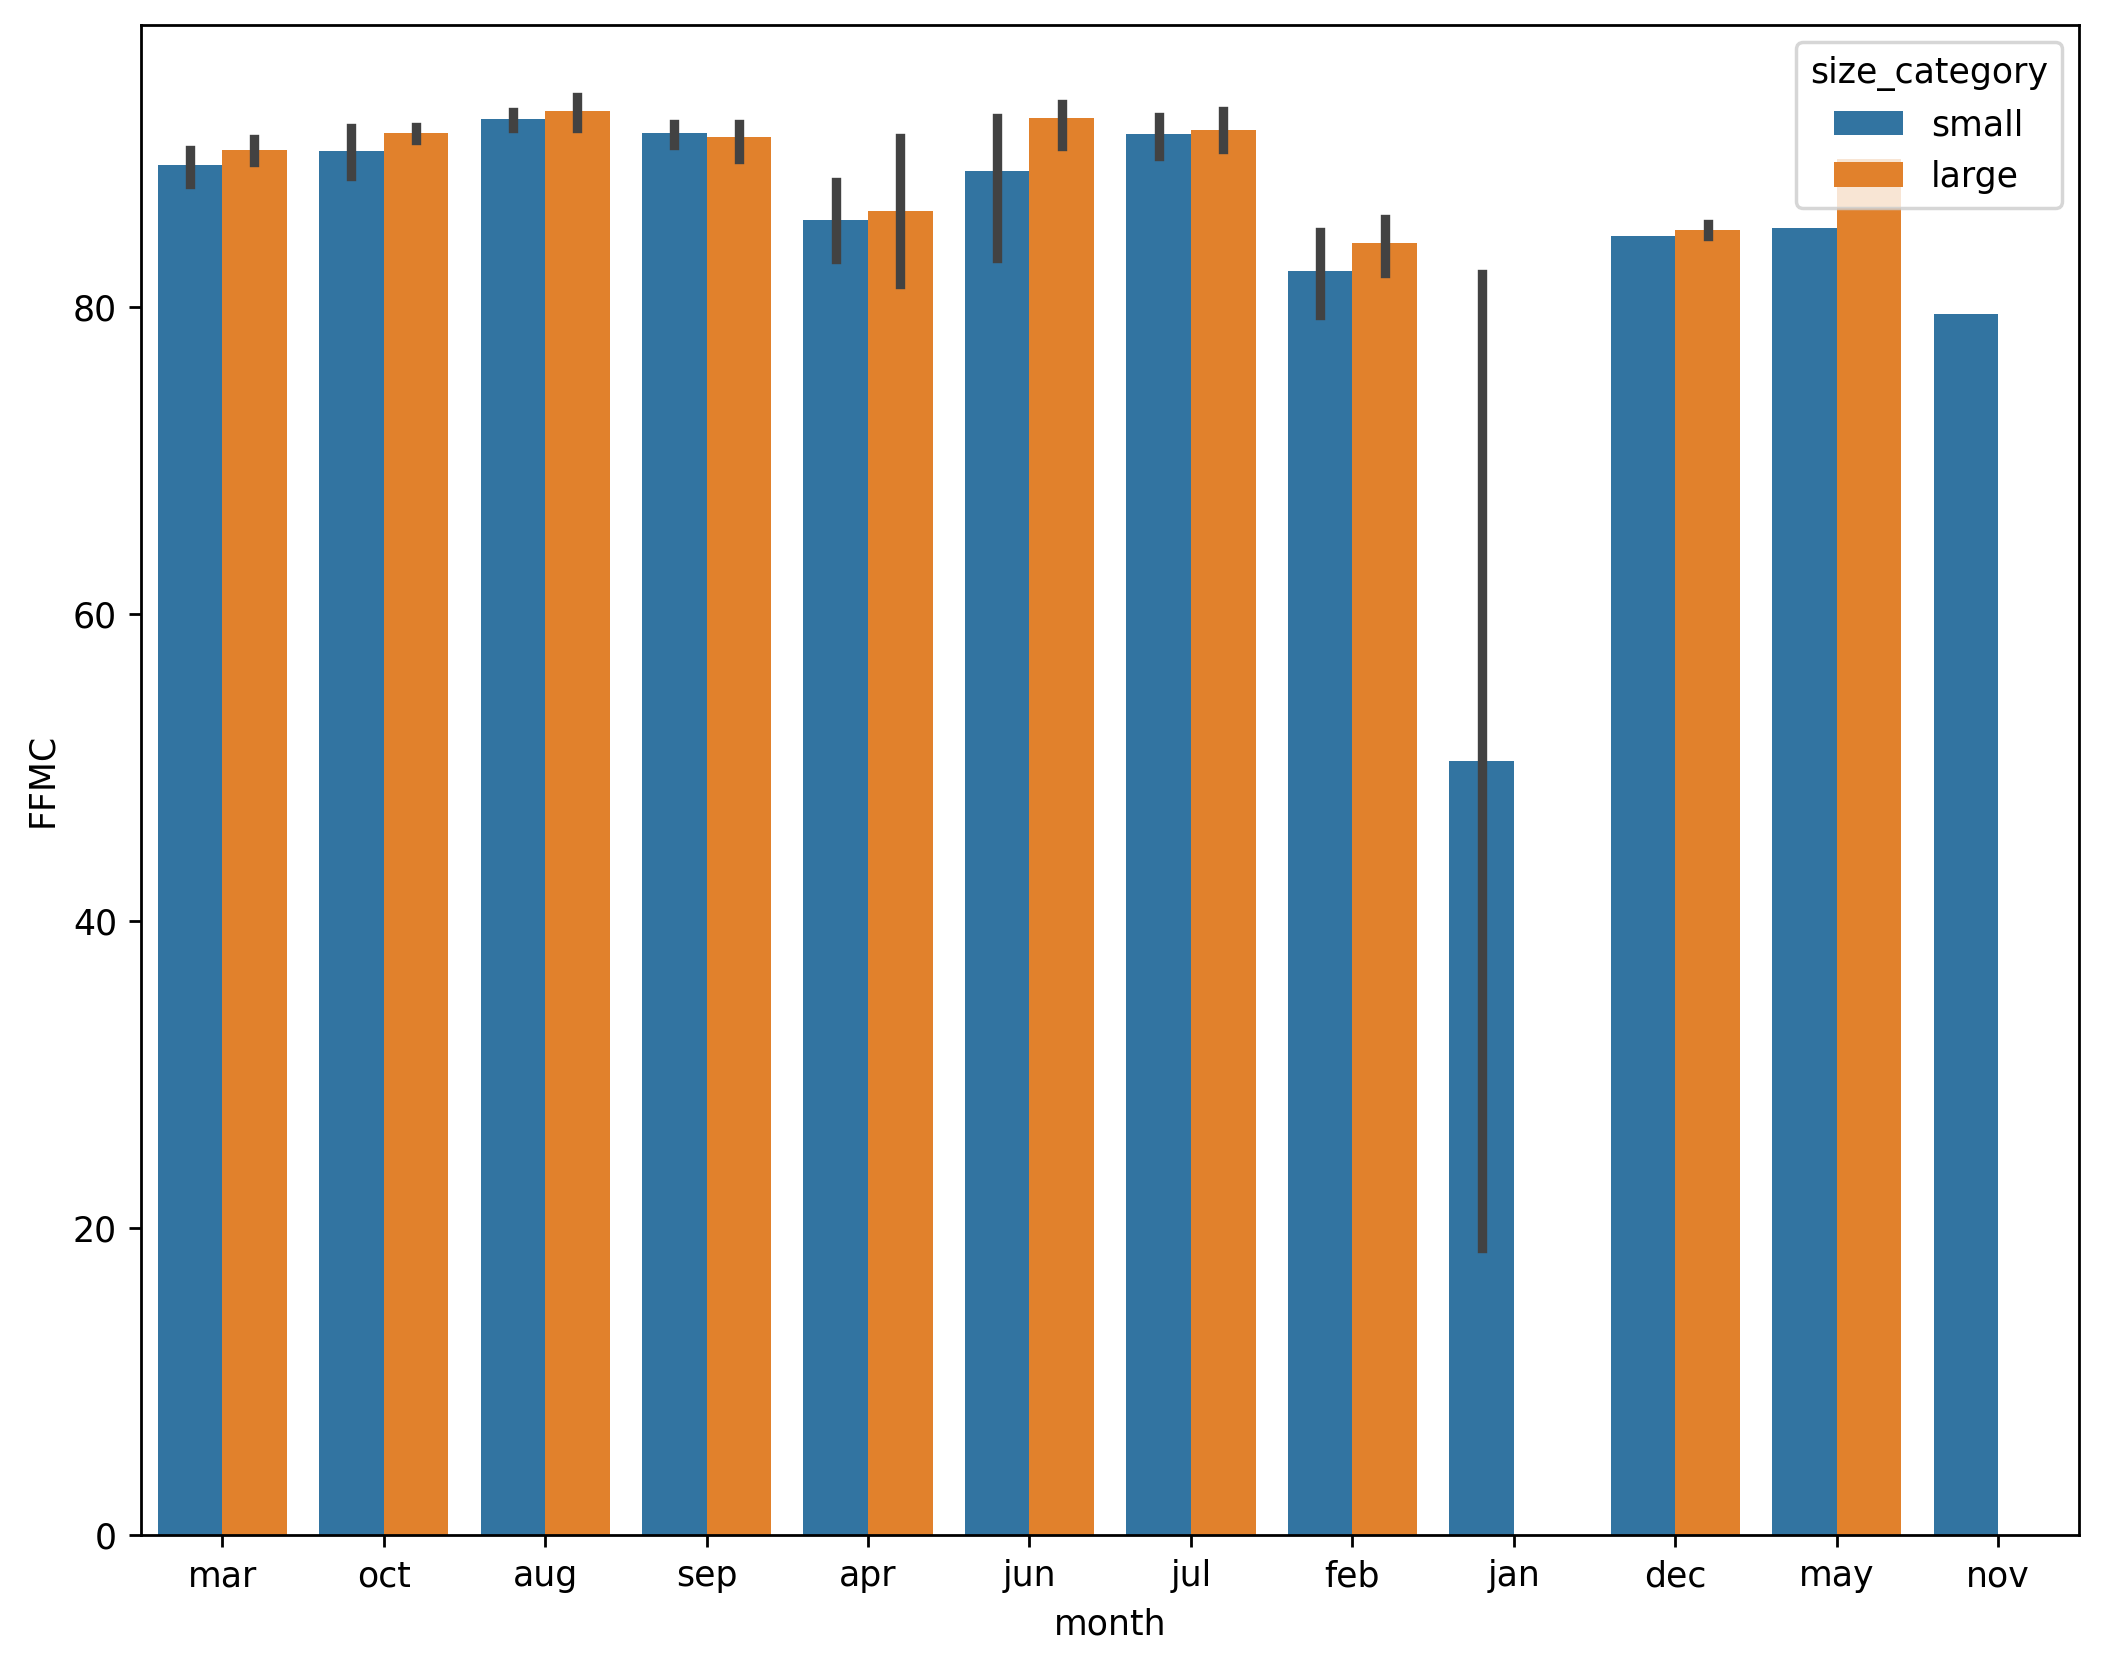

In [23]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","FFMC",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='DMC'>

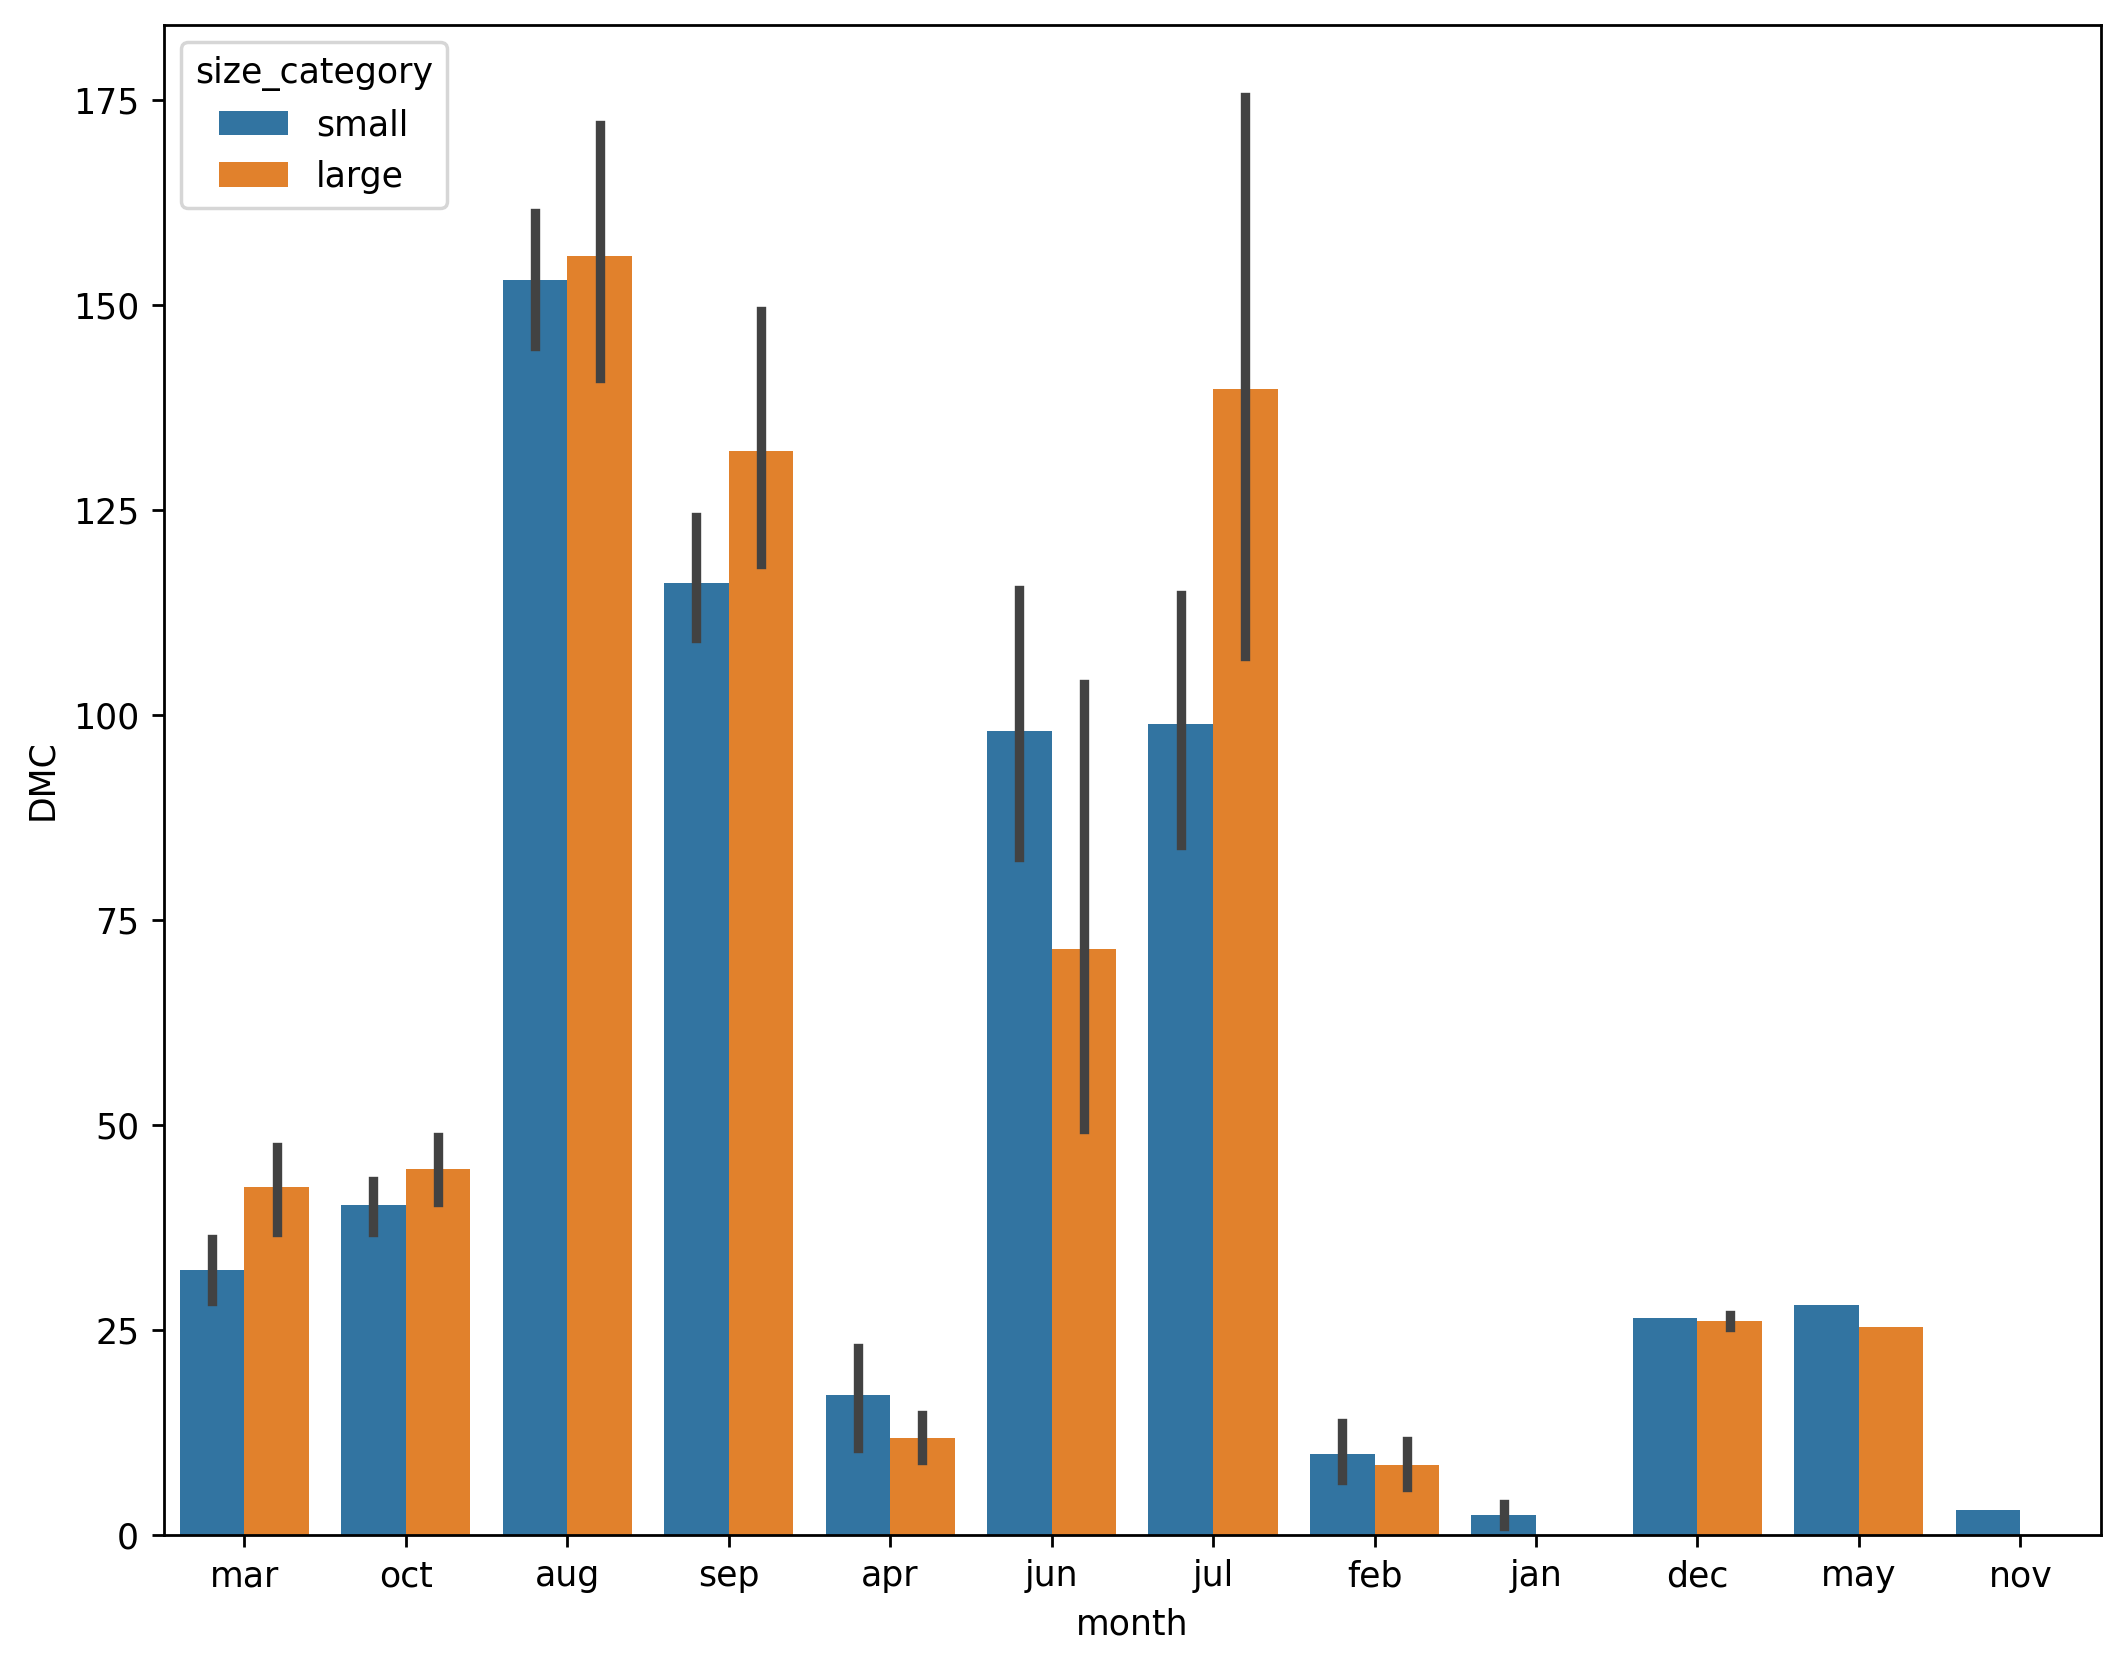

In [24]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","DMC",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='DC'>

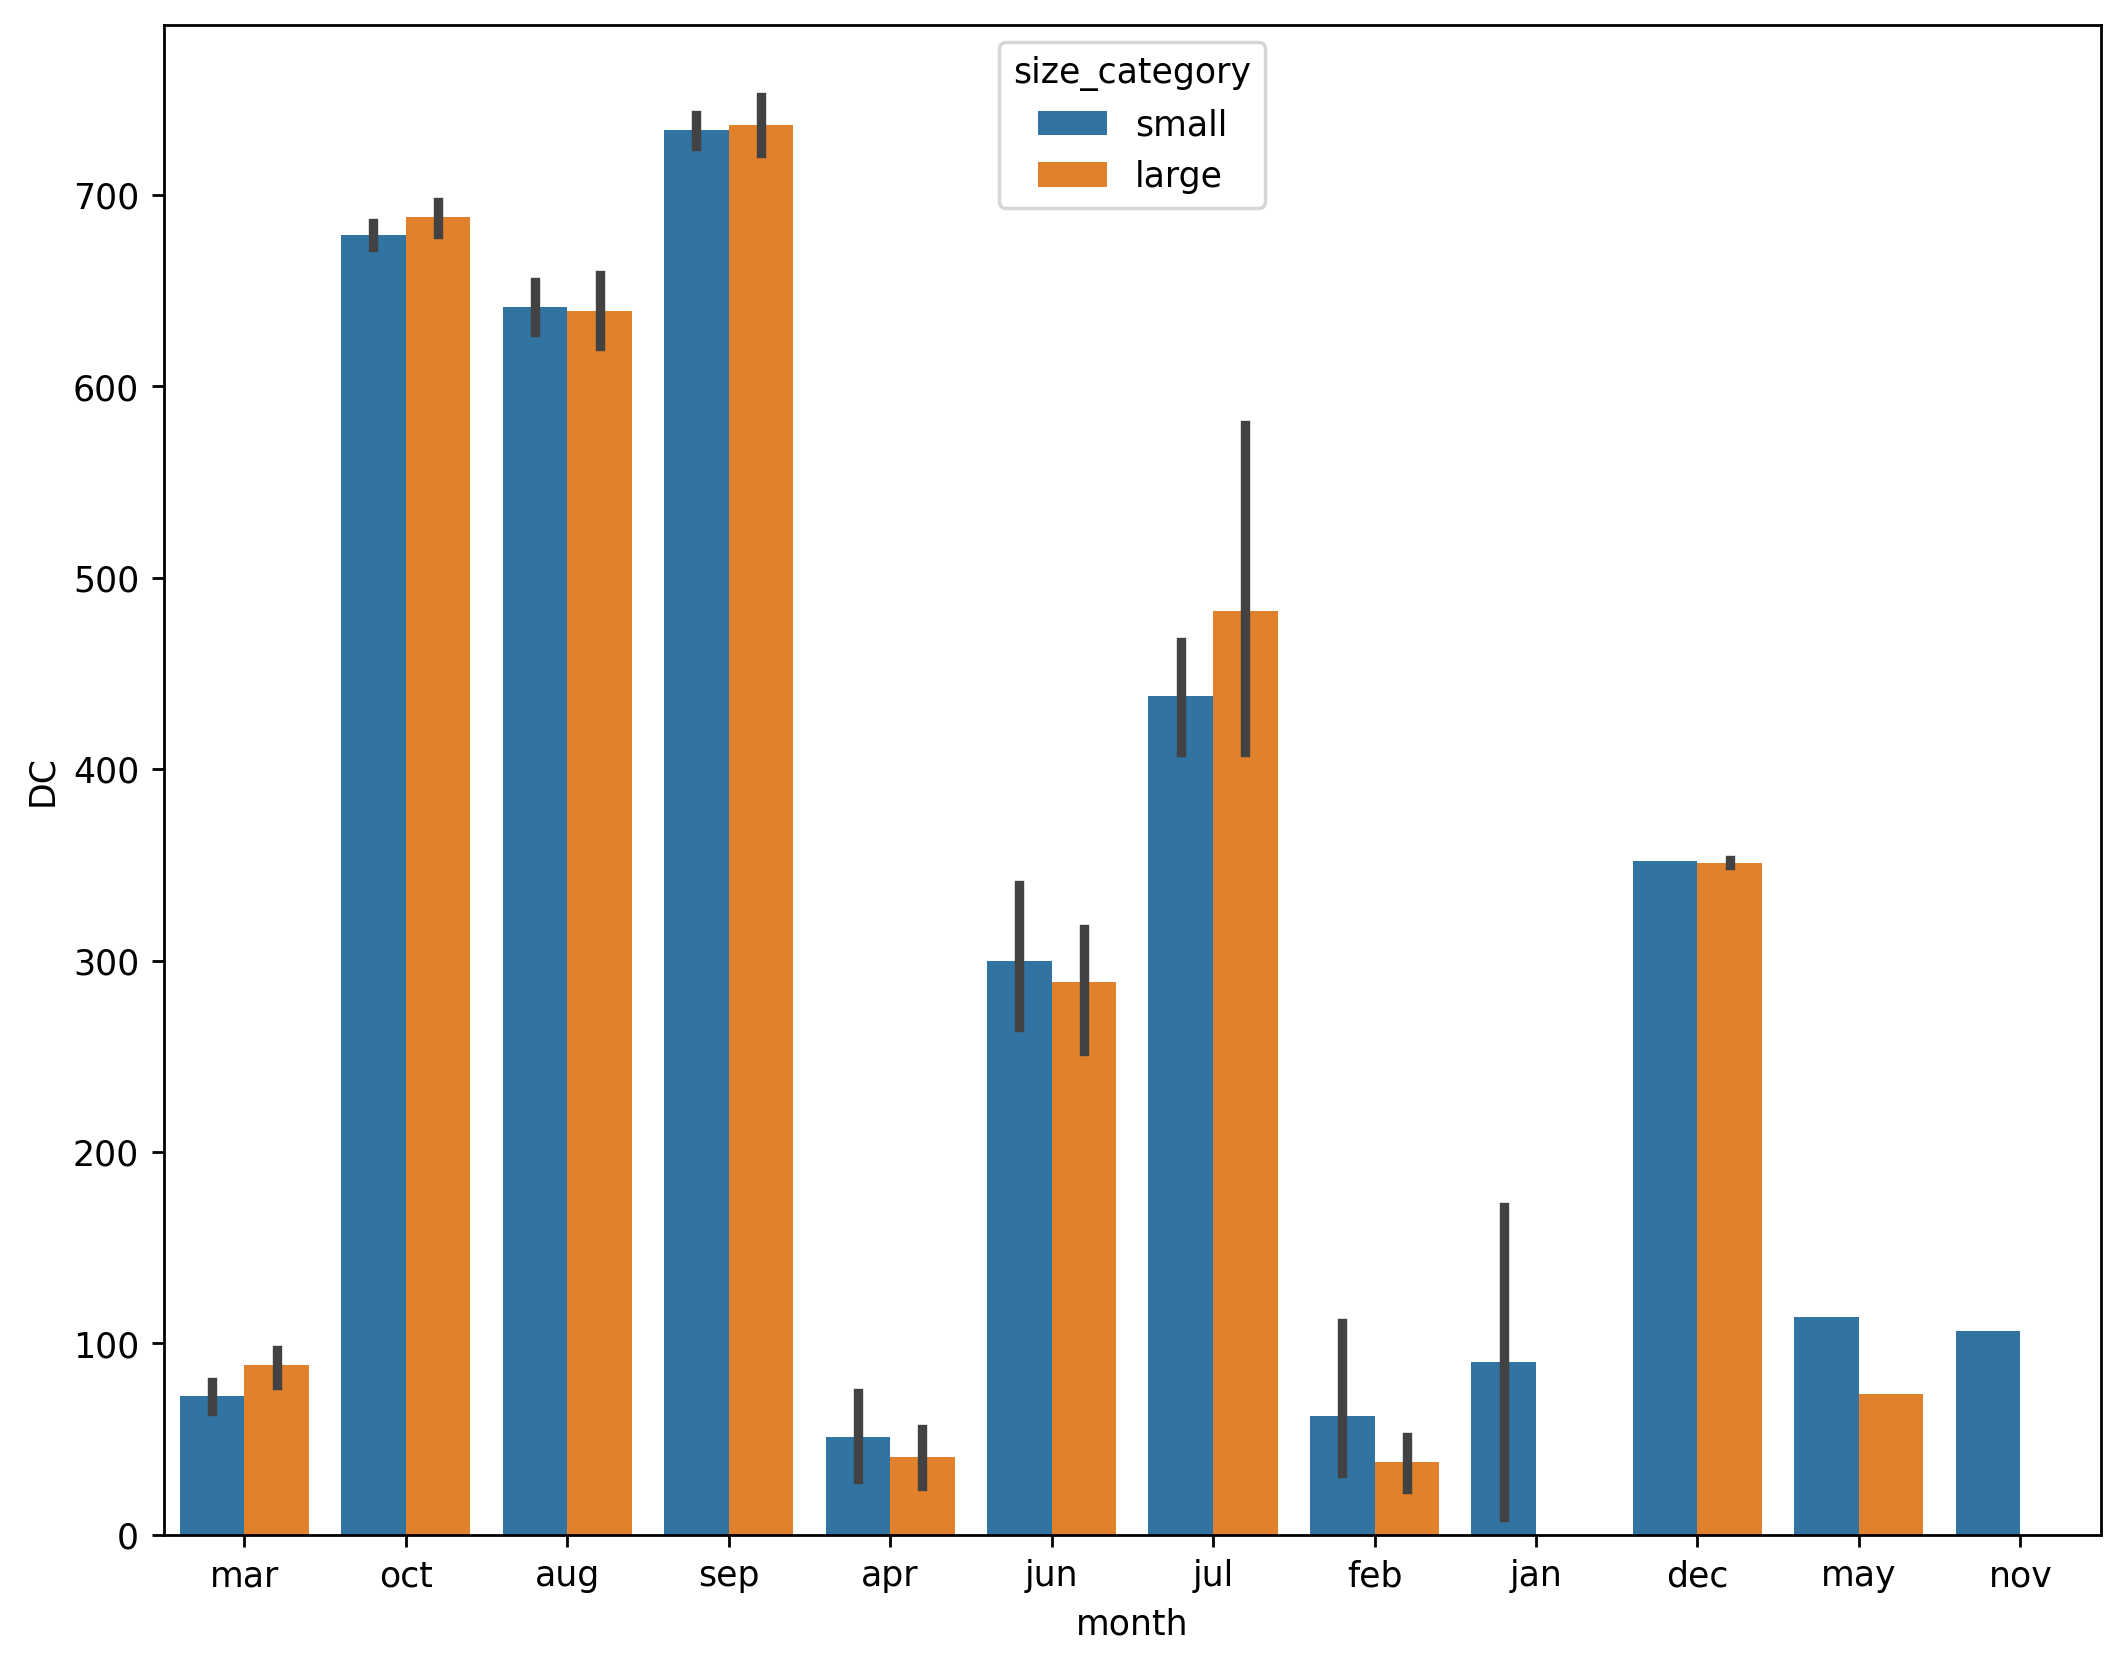

In [25]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","DC",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='ISI'>

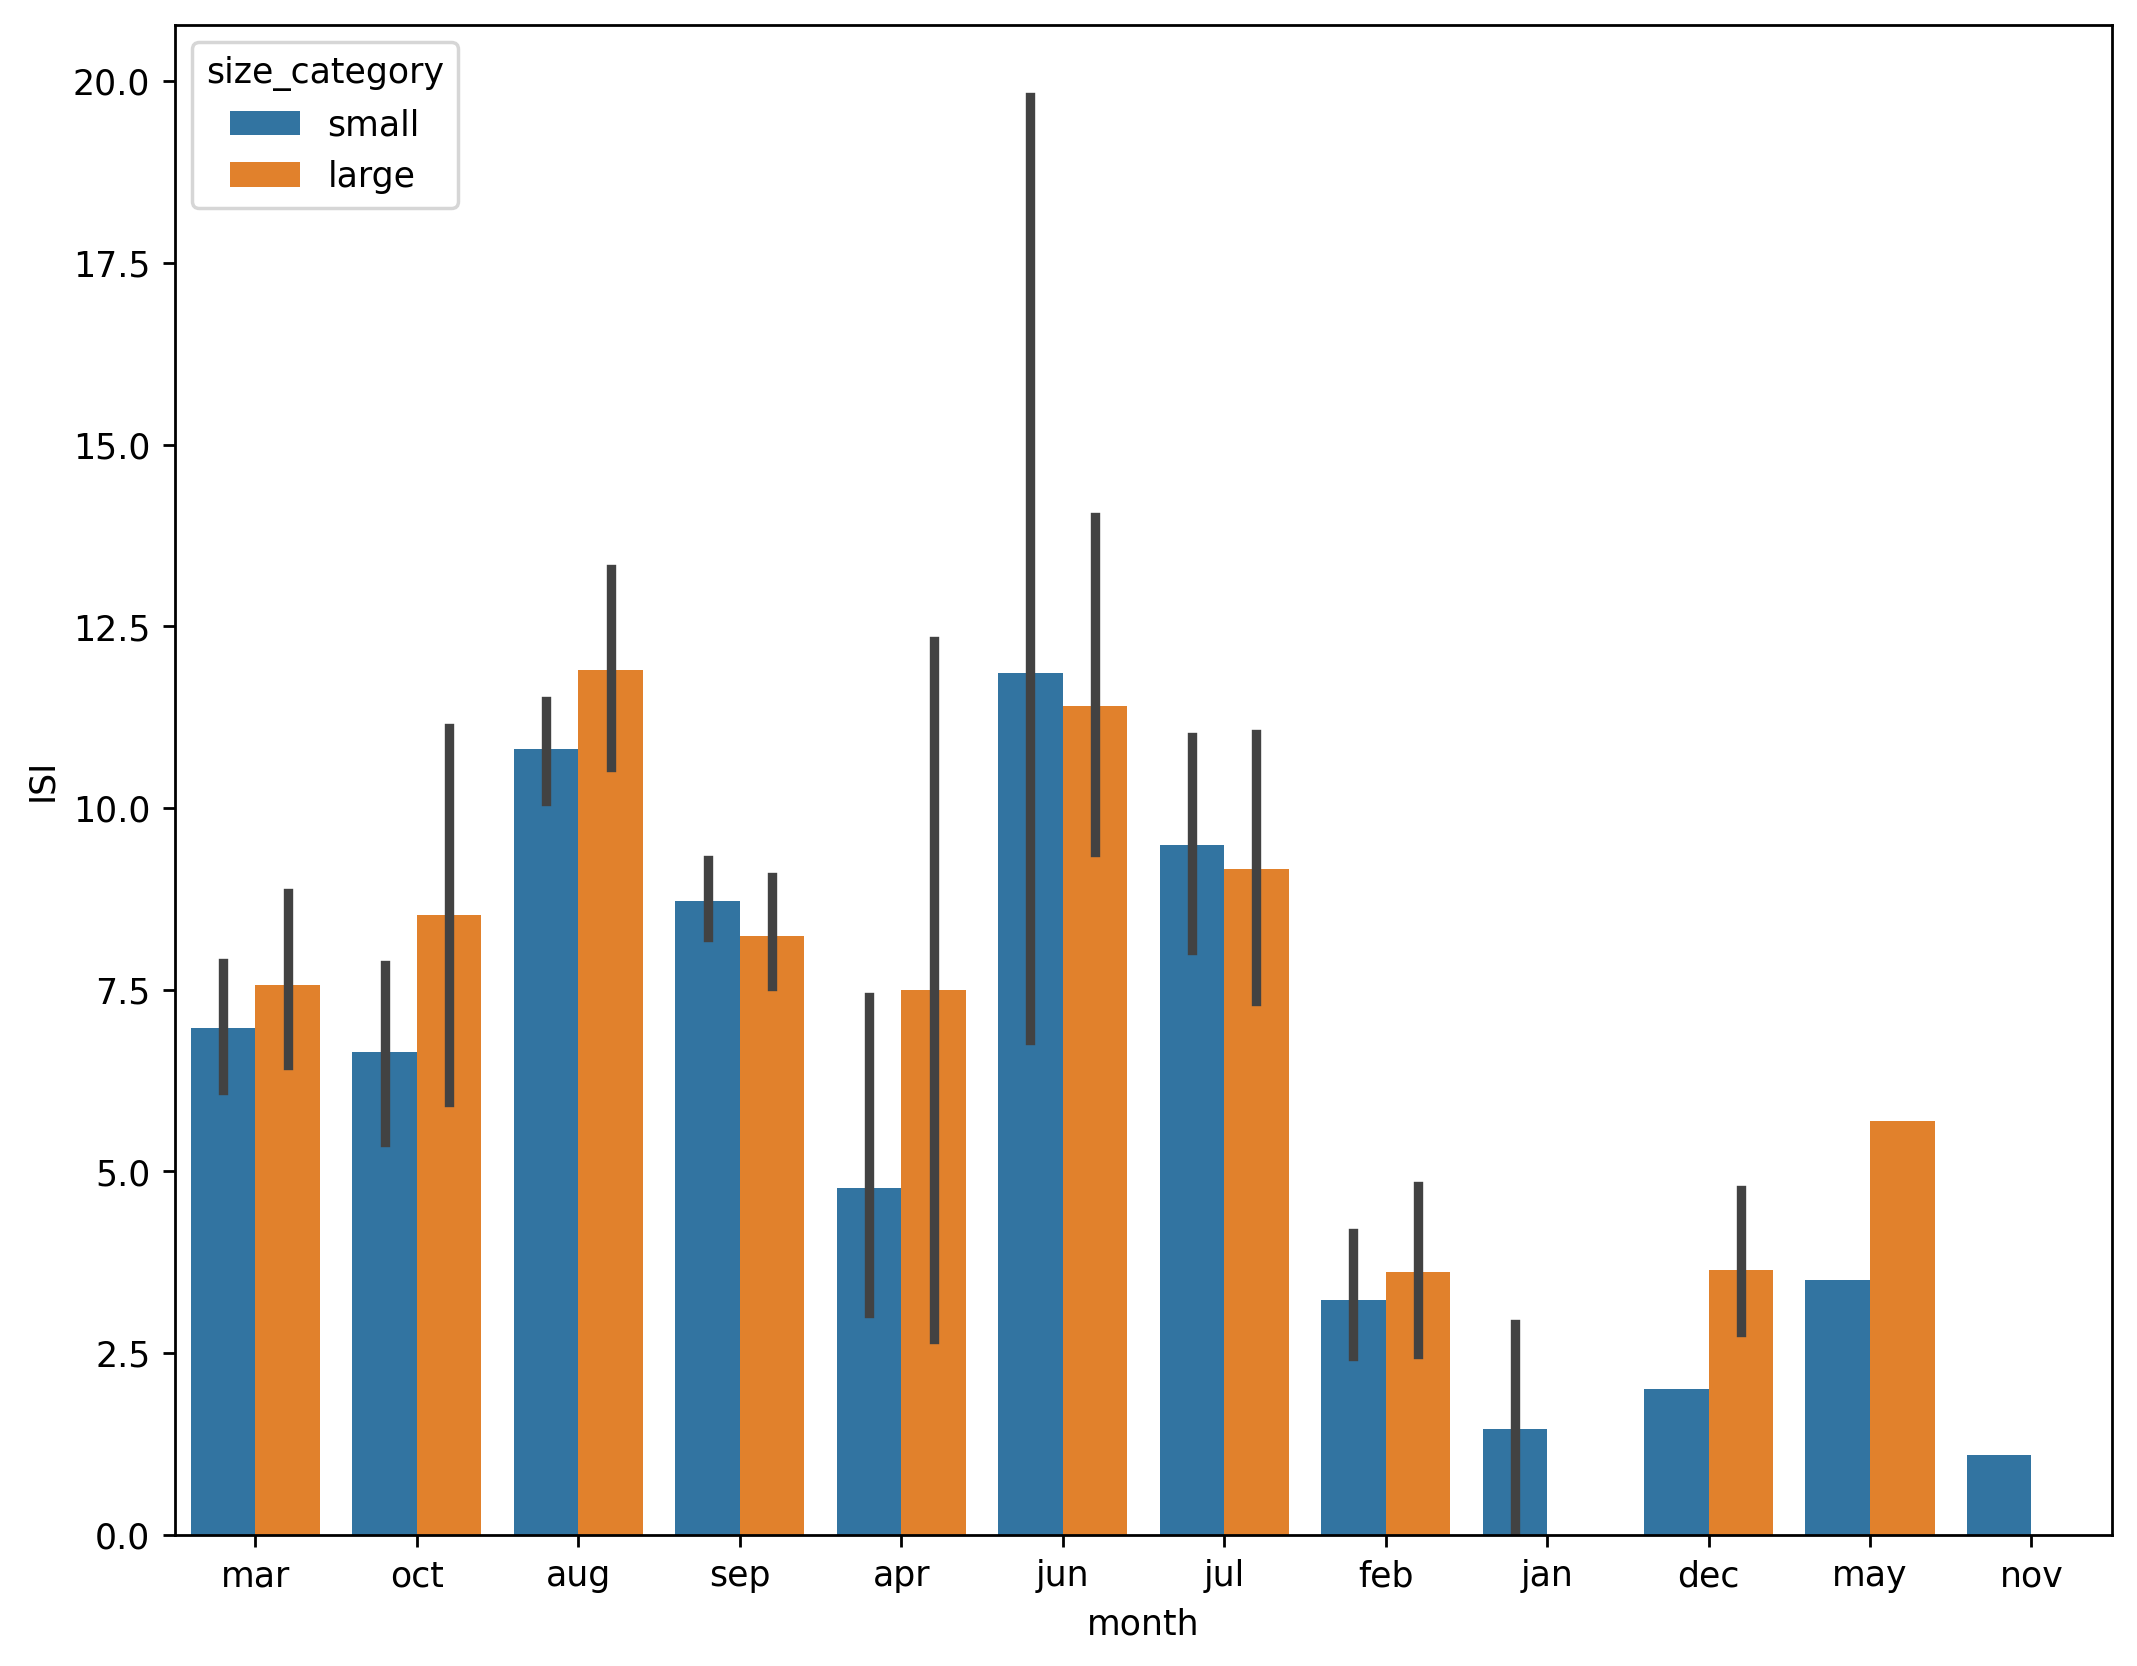

In [26]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","ISI",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='RH'>

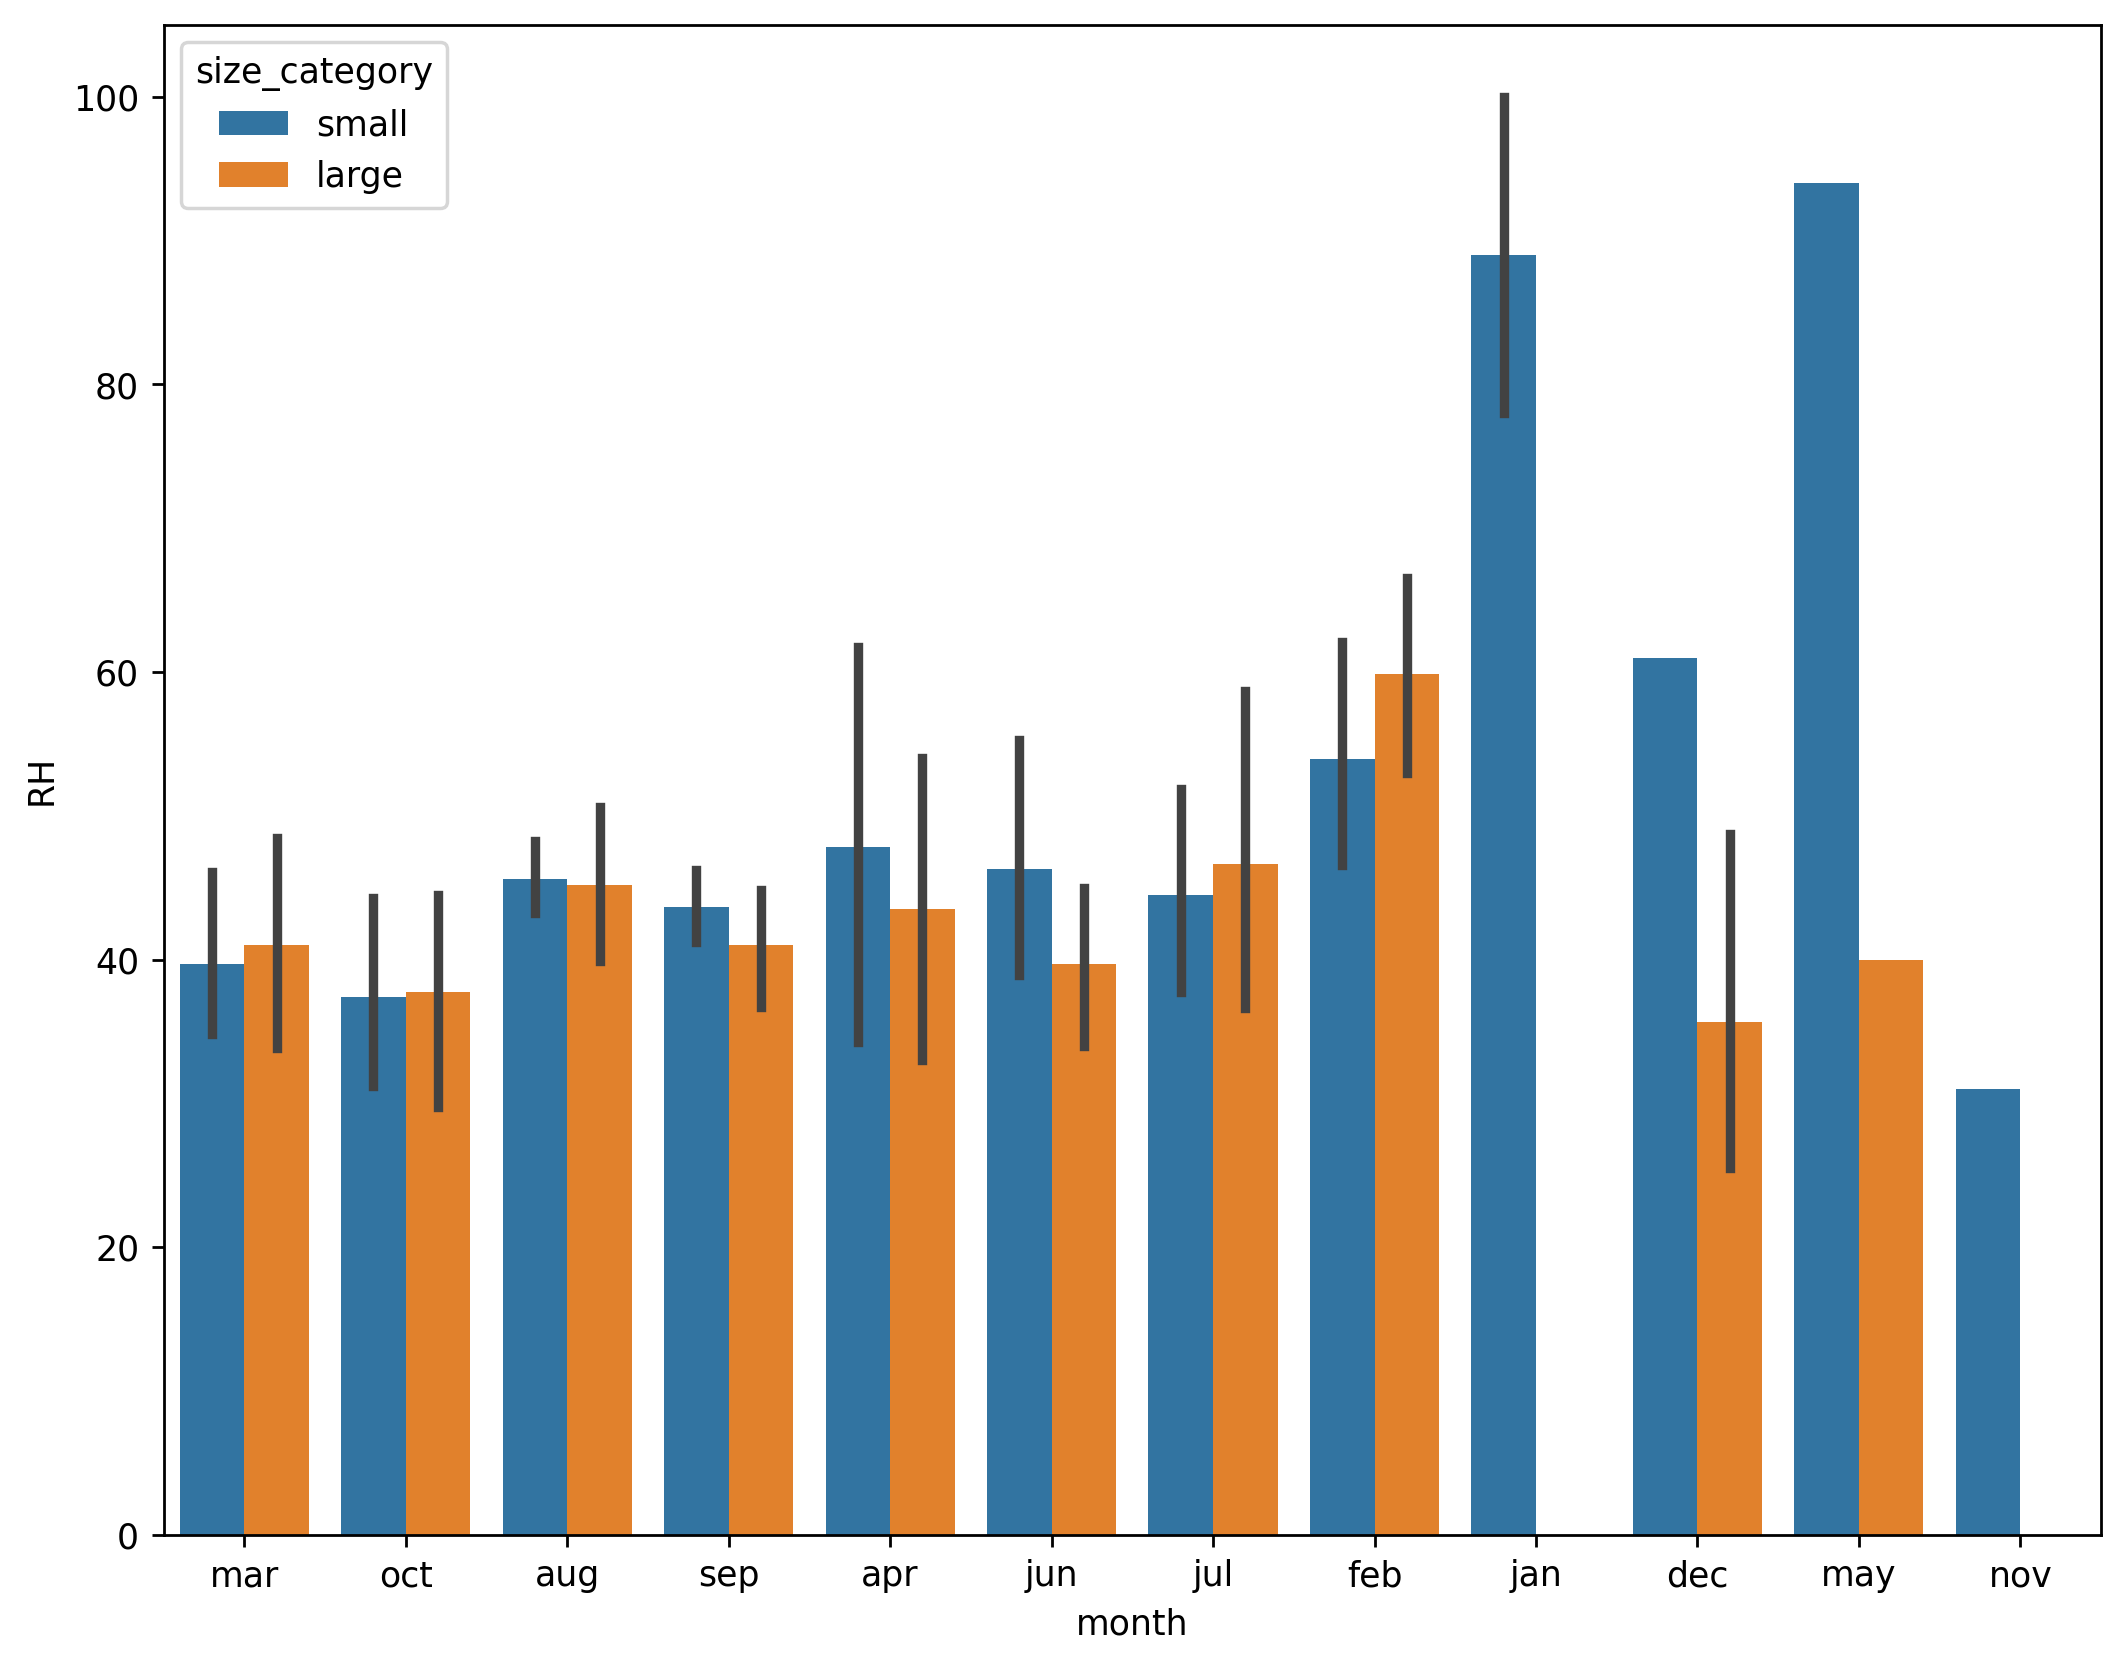

In [27]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","RH",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='wind'>

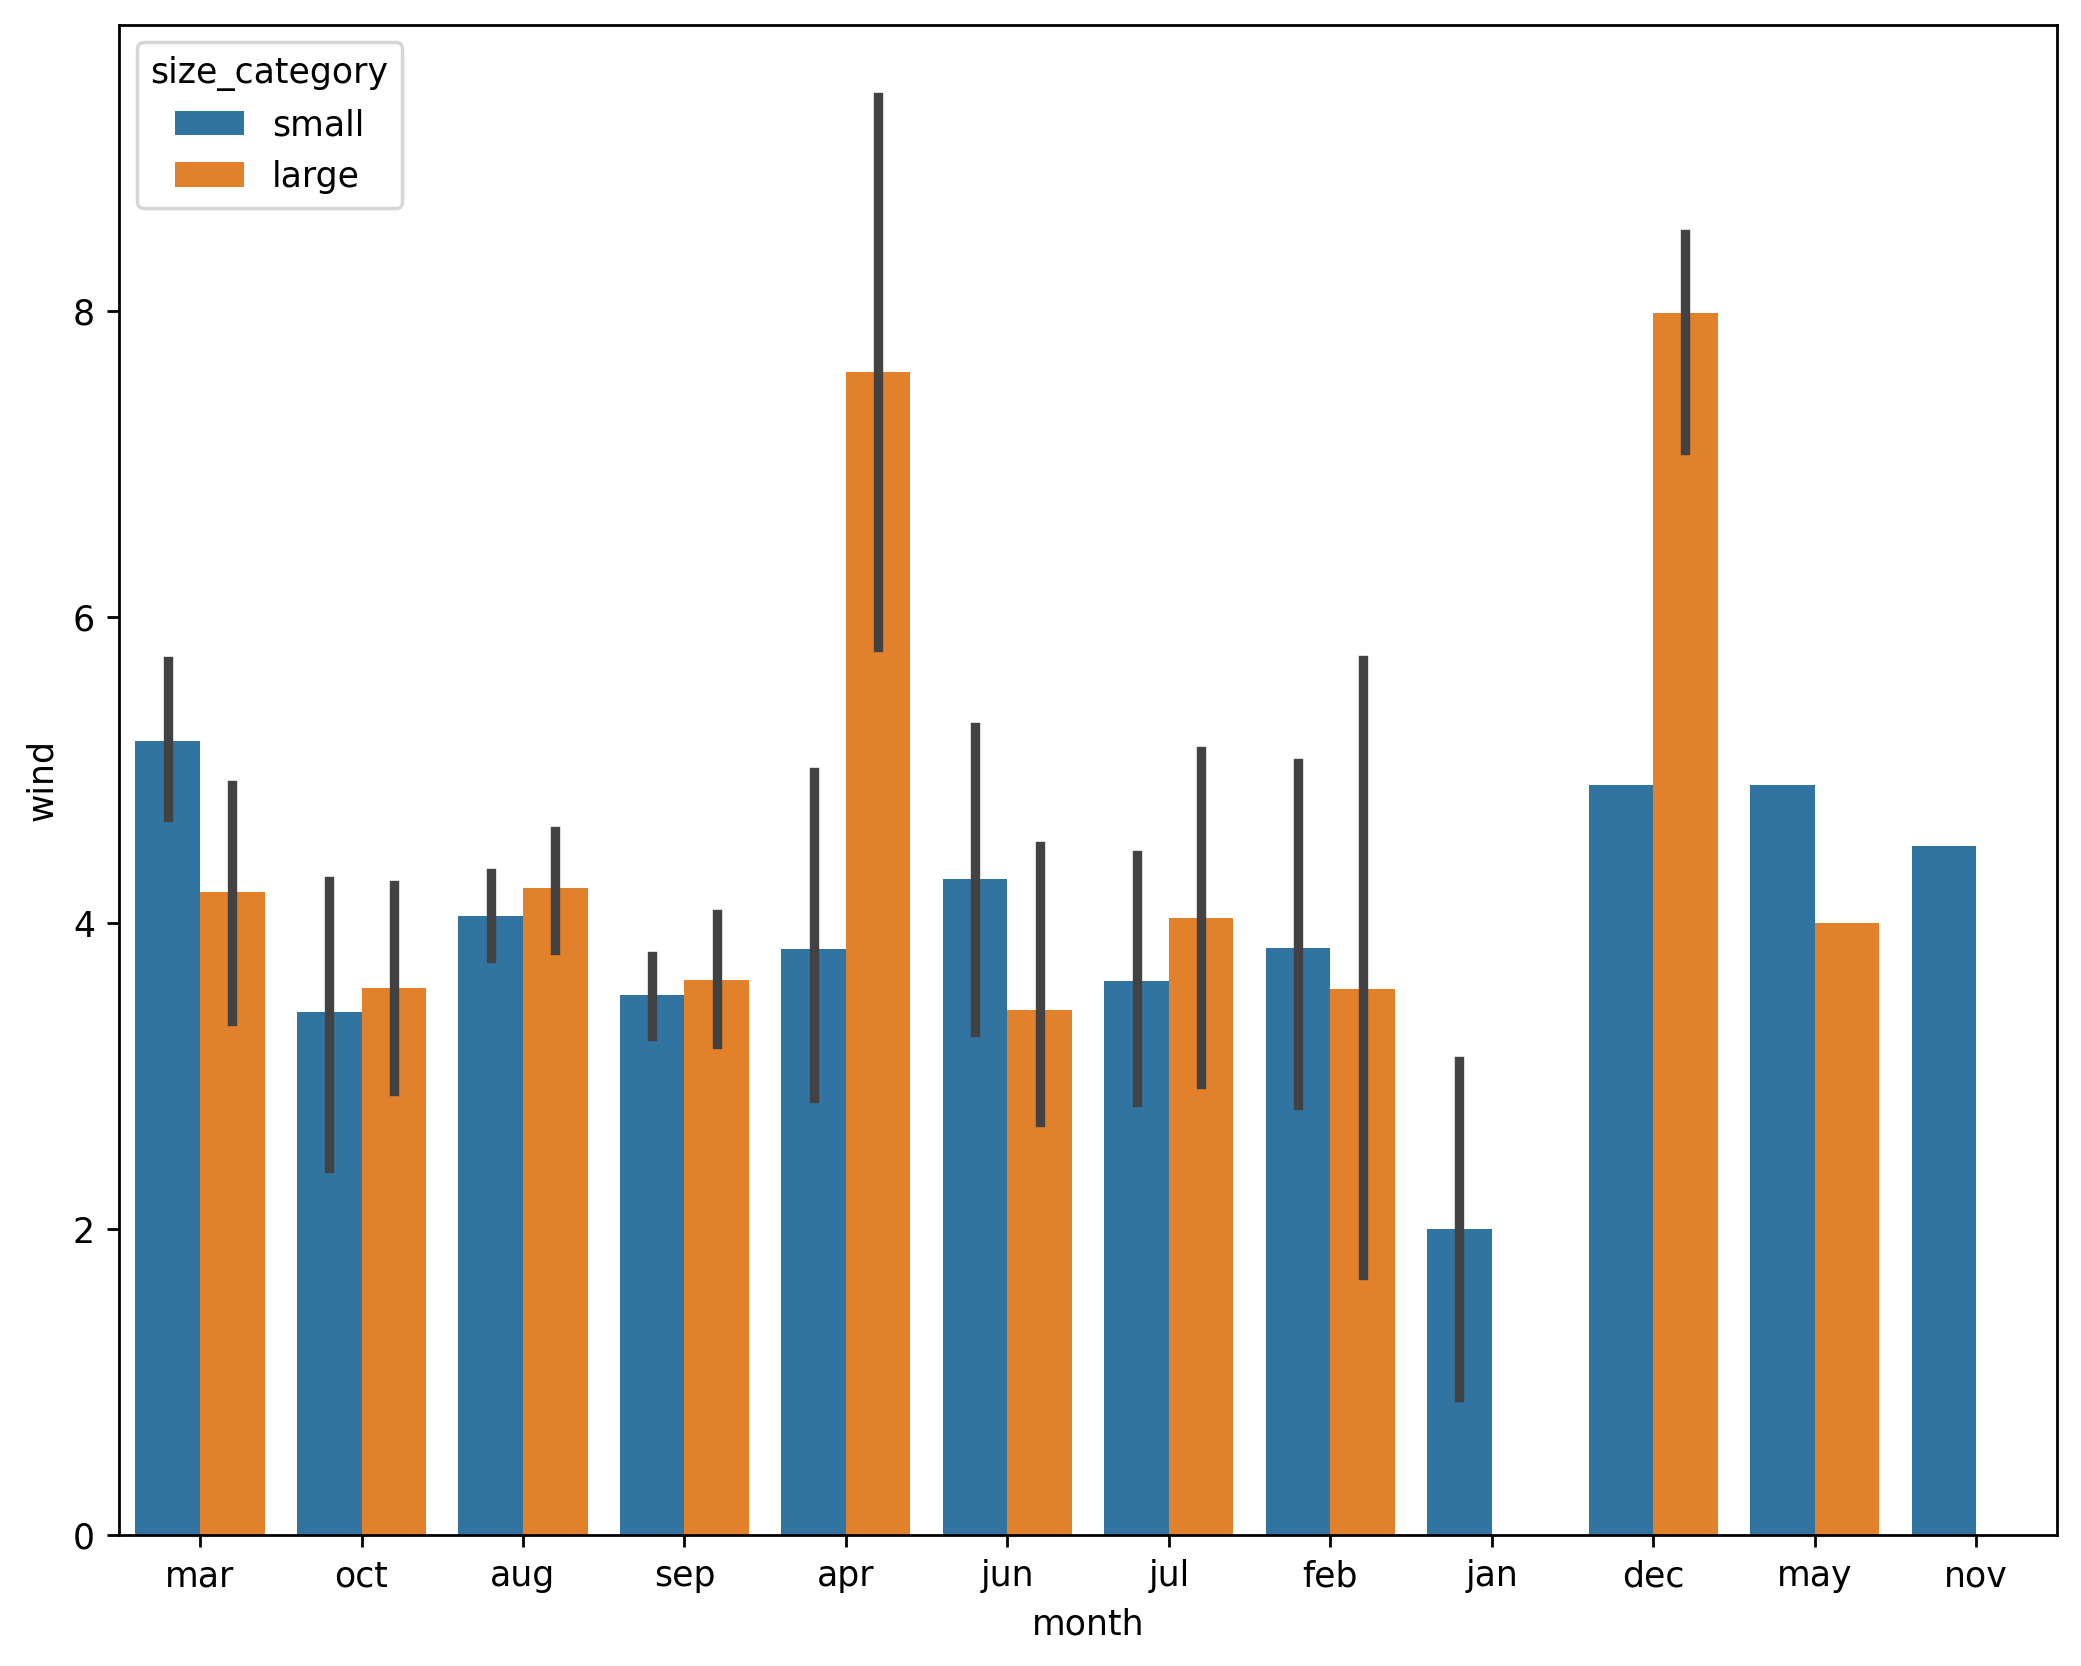

In [28]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","wind",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='temp'>

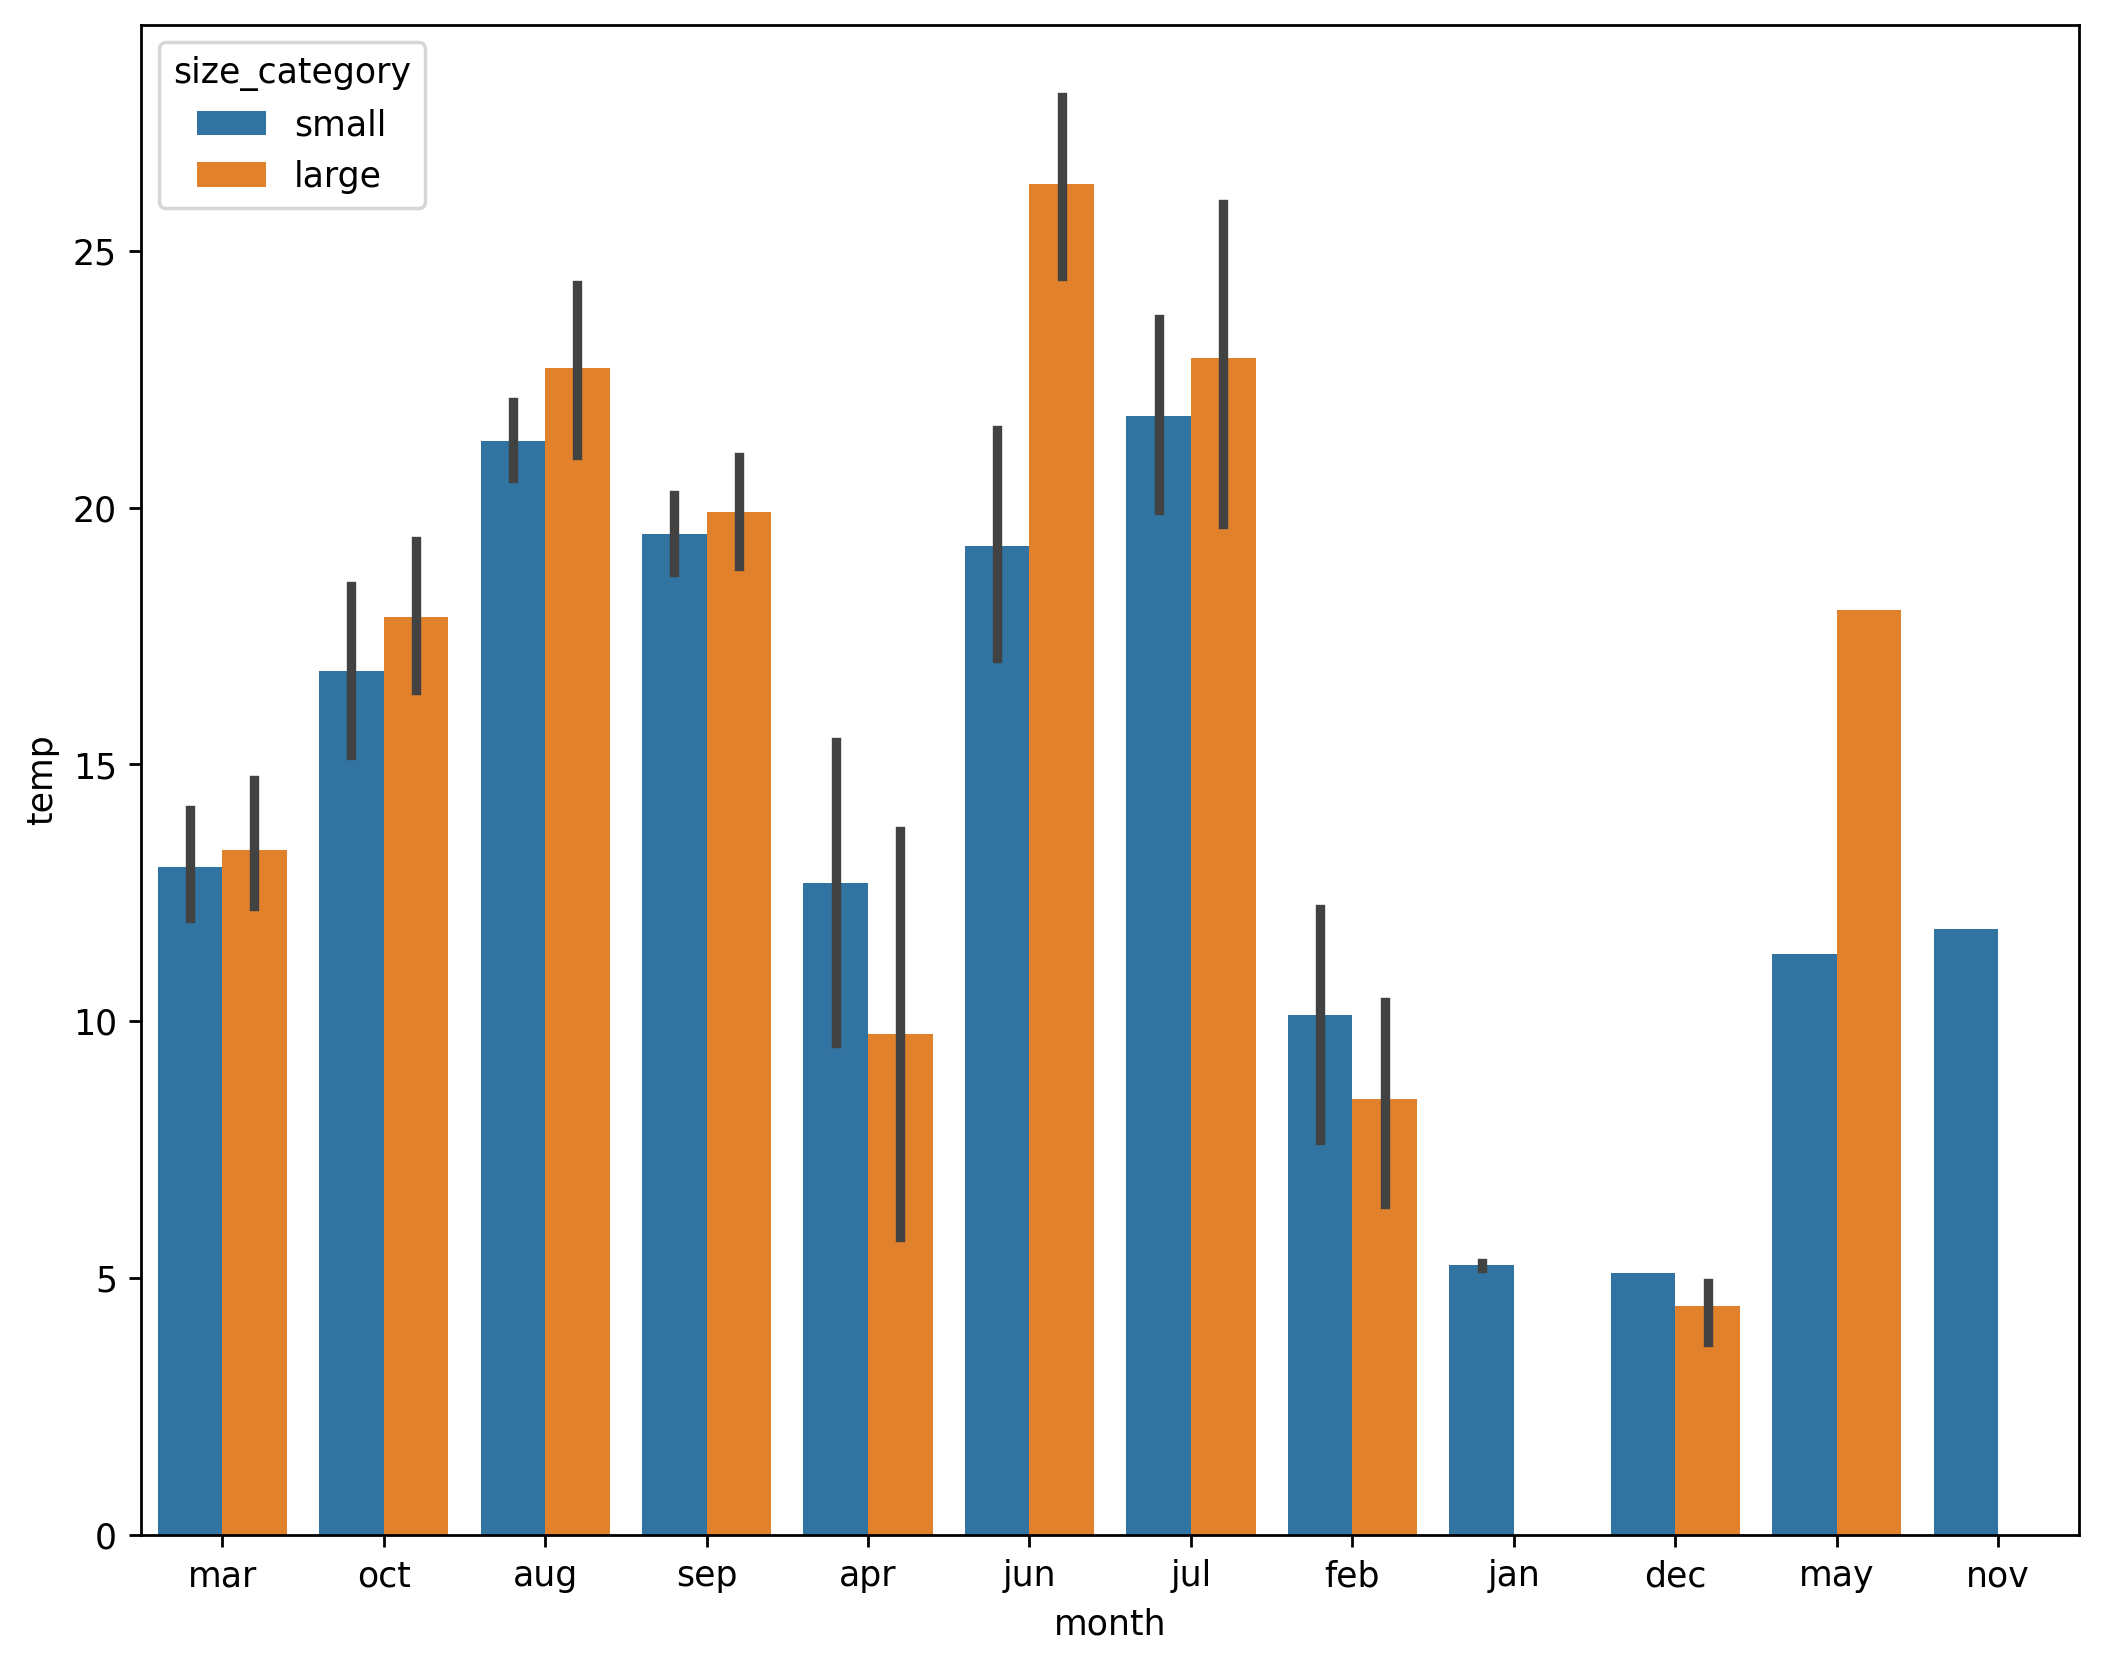

In [29]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","temp",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='rain'>

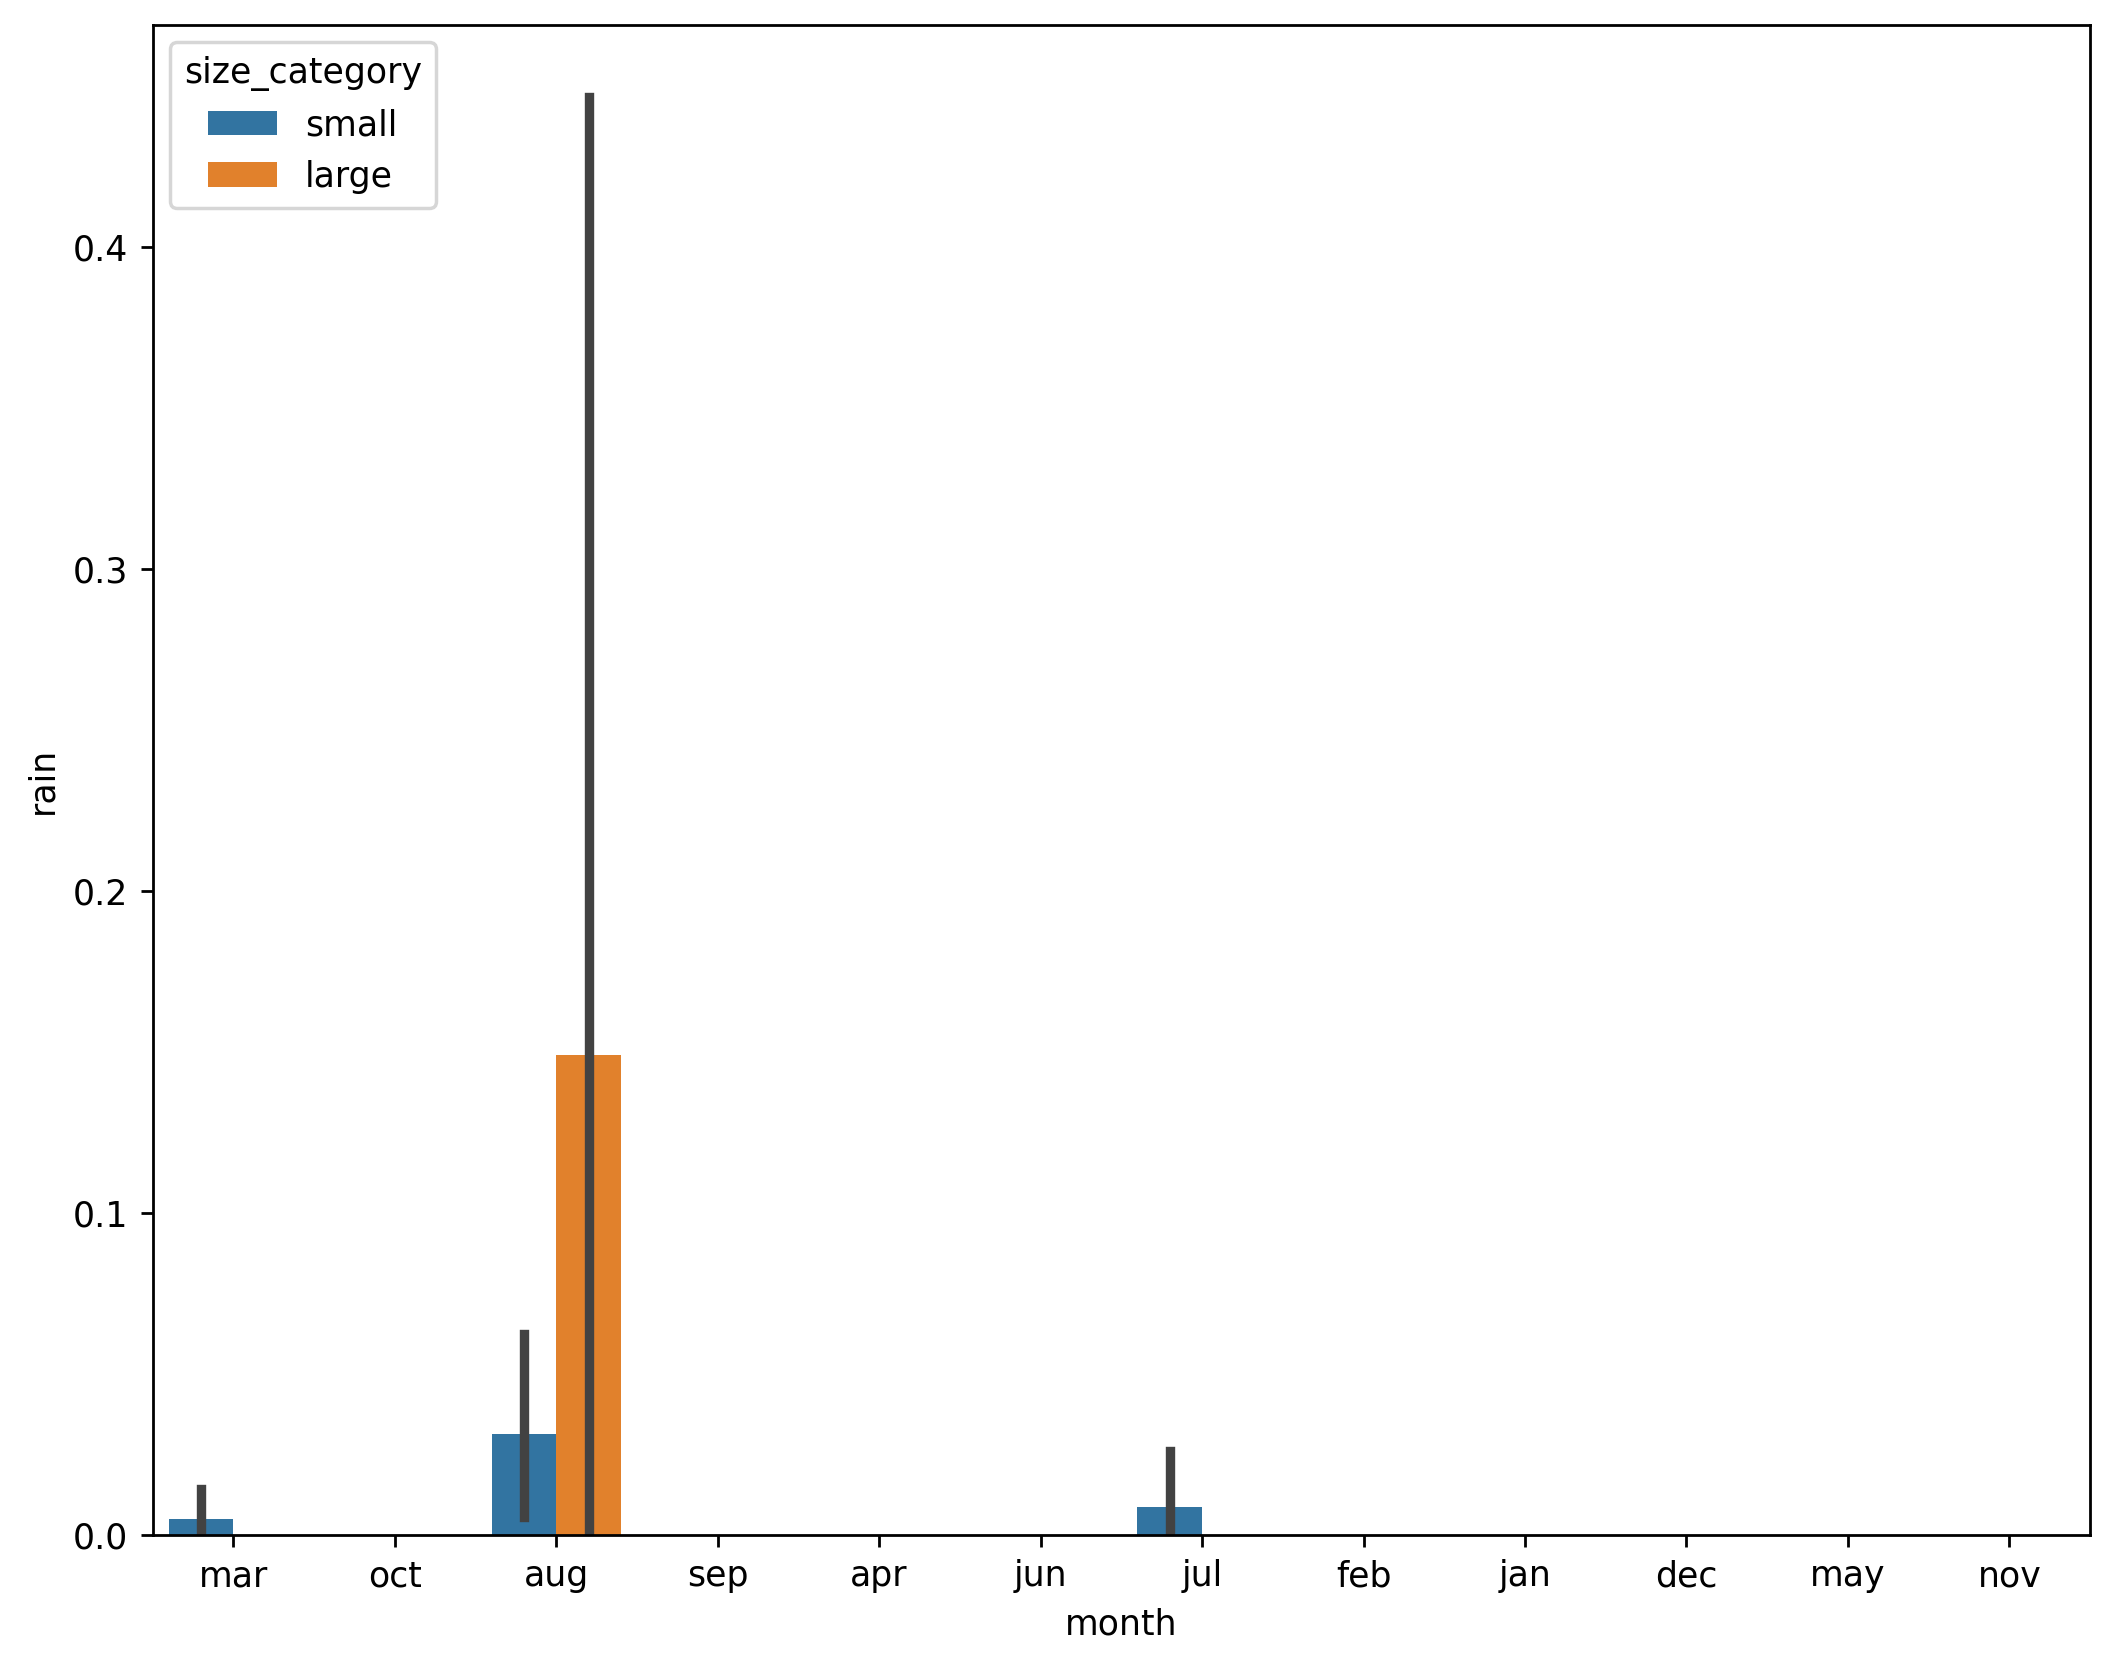

In [30]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","rain",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='area'>

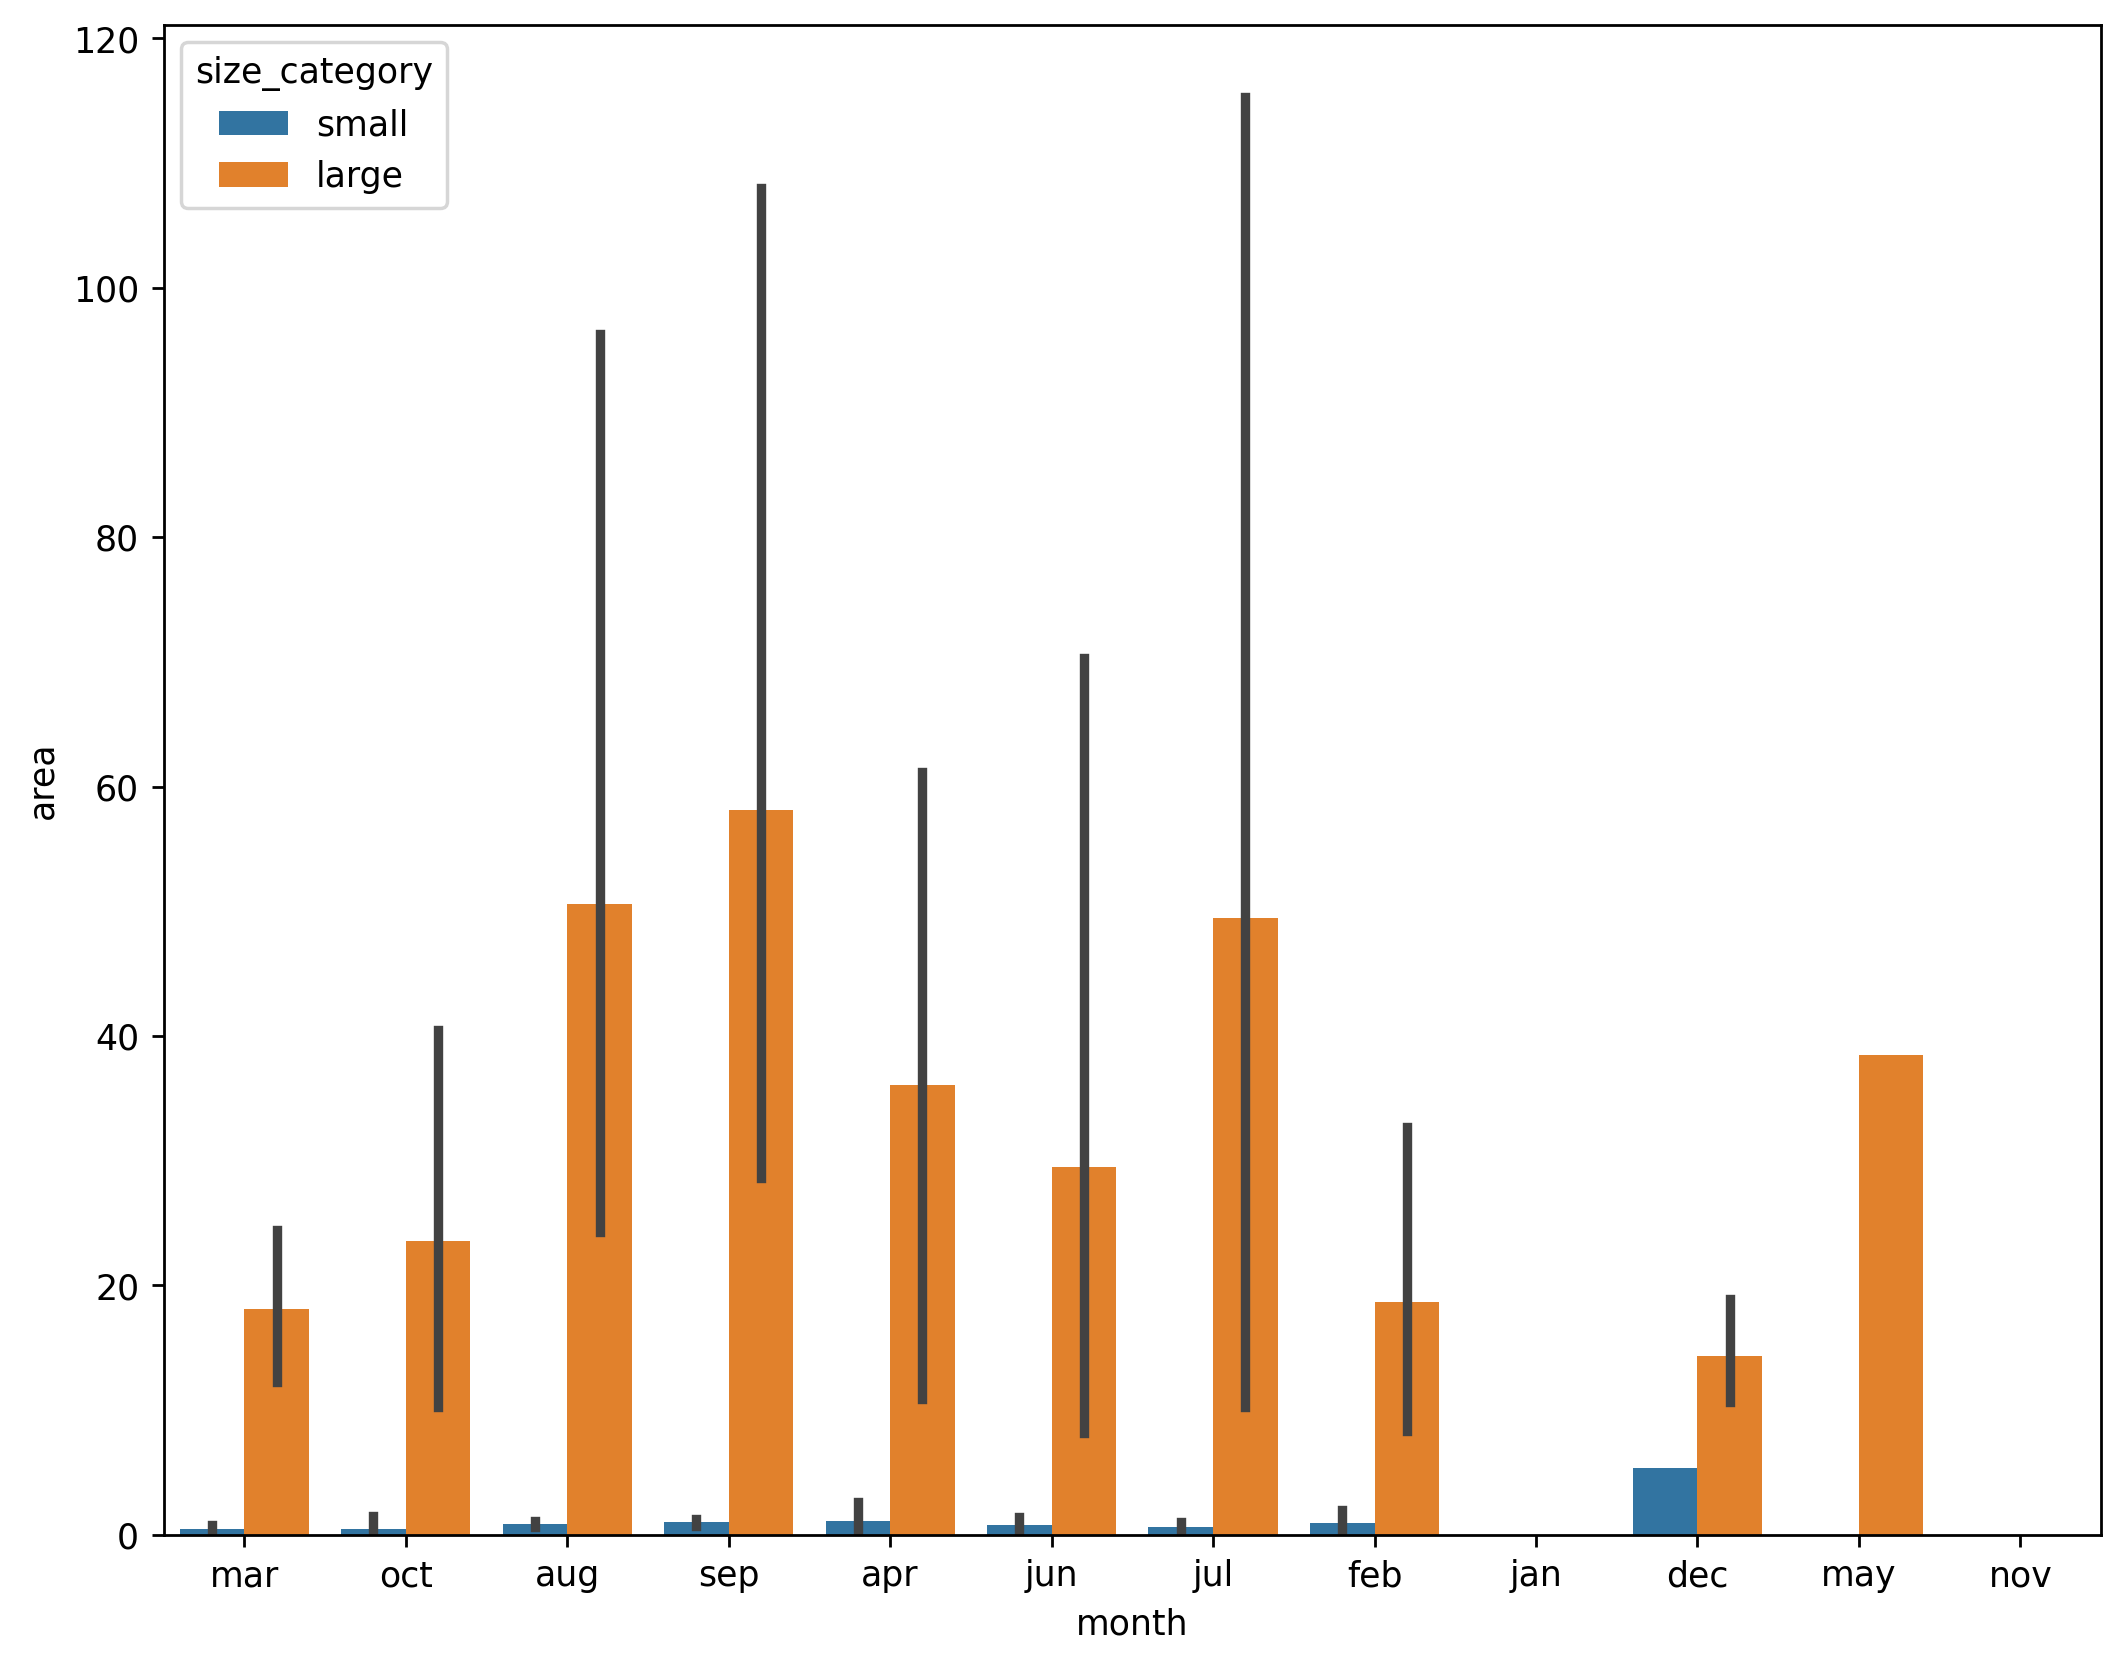

In [31]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","area",hue="size_category",data=forest)

# PiePlot

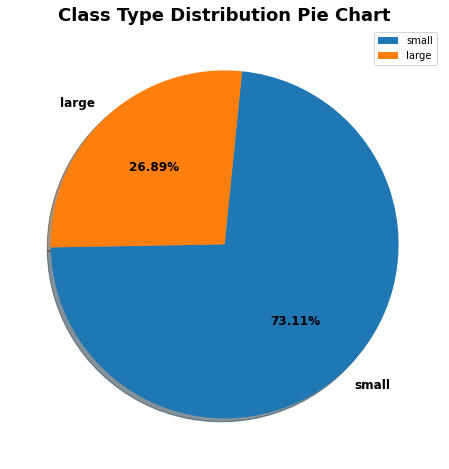

In [32]:
plt.figure(figsize = (12,8))
plt.pie(forest['size_category'].value_counts(),
       labels=forest.size_category.unique(),
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Observation:
We can see in pie chart that there is an imbalance in the dataset

# Coverting Categorical value into Numeric value

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [34]:
forest["size_category"]=encoder.fit_transform(forest["size_category"])

In [35]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Dropping columns:Month and day

In [36]:
forest.drop(['month','day'],axis=1,inplace=True)

In [37]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


# Correration in the data

Text(0.5, 1.0, 'Correlation with size_category \n')

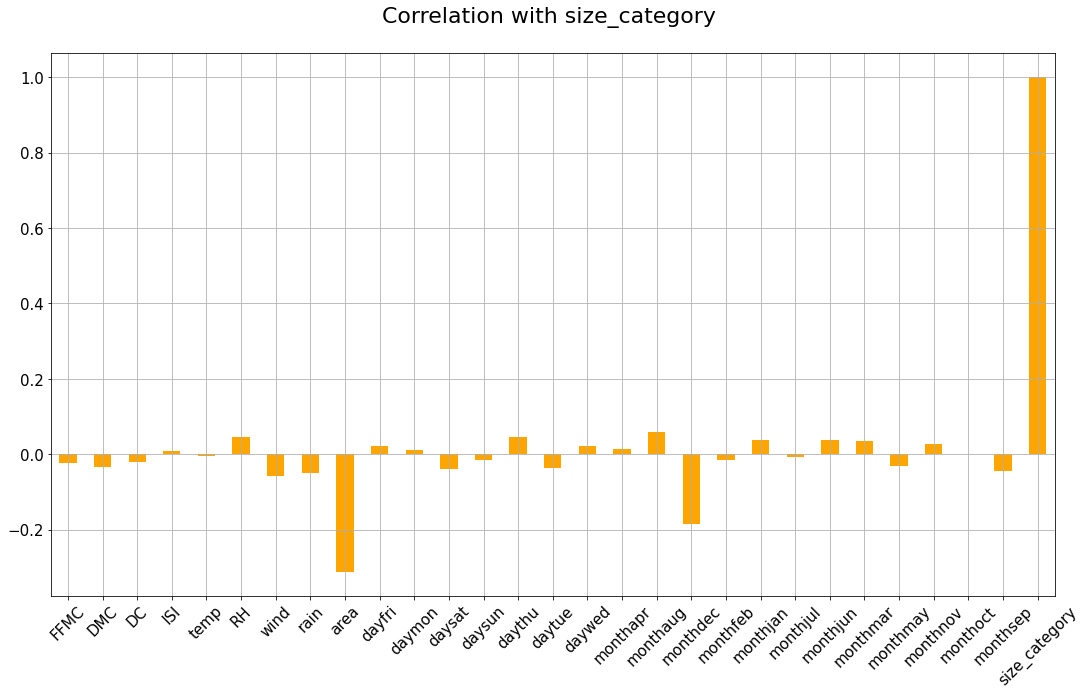

In [38]:
data = forest.copy()

correlations = data.corrwith(forest.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with size_category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [39]:
from sklearn.model_selection import train_test_split,cross_validate

In [40]:
X=forest.drop(["size_category"],axis=1)
y=forest[["size_category"]]

In [41]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [44]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
79,91.0,121.2,561.6,7.0,21.6,19,6.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
285,93.9,169.7,411.8,12.3,23.4,40,6.3,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
226,91.7,48.5,696.1,11.1,16.1,44,4.0,0.0,49.37,0,...,0,0,0,0,0,0,0,0,1,0
69,91.7,33.3,77.5,9.0,17.2,26,4.5,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
73,88.8,147.3,614.5,9.0,17.3,43,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,93.7,231.1,715.1,8.4,25.9,32,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
15,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
377,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,0,...,0,0,0,0,0,0,0,0,0,0
163,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
X_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
432,94.8,222.4,698.6,13.9,23.9,38,6.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
243,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
61,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
408,90.3,290.0,855.3,7.4,19.9,44,3.1,0.0,7.80,1,...,0,0,0,0,0,0,0,0,0,1
405,94.6,212.1,680.9,9.5,27.9,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,90.9,126.5,686.5,7.0,15.6,66,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
102,94.8,108.3,647.1,17.0,20.1,40,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
212,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13,1,...,0,0,0,0,0,0,0,0,0,1
216,92.4,124.1,680.7,8.5,16.9,60,1.3,0.0,29.48,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y_train

,size_category
79,1
285,1
226,0
69,1
73,1
...,...
398,1
15,1
377,0
163,1


In [47]:
y_test

,size_category
432,1
243,1
61,1
408,0
405,1
...,...
137,1
102,1
212,0
216,0


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [50]:
X_train_std

array([[ 0.08301073,  0.18740817,  0.04643948, ..., -0.04926646,
        -0.17298898, -0.70839126],
       [ 0.56681584,  0.97262358, -0.57502444, ..., -0.04926646,
        -0.17298898, -0.70839126],
       [ 0.19979127, -0.98960545,  0.60442944, ..., -0.04926646,
         5.78071507, -0.70839126],
       ...,
       [ 0.53344997,  1.9666901 ,  0.6832533 , ..., -0.04926646,
        -0.17298898, -0.70839126],
       [ 0.33325475,  0.18578917,  0.5144043 , ..., -0.04926646,
        -0.17298898,  1.41164926],
       [ 0.51676703,  2.03145013,  0.7164423 , ..., -0.04926646,
        -0.17298898, -0.70839126]])

In [51]:
X_train_std =pd.DataFrame(X_train_std,columns=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'])

In [52]:
X_train_std

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.083011,0.187408,0.046439,-0.431126,0.461874,-1.576037,1.511566,-0.075504,-0.194574,-0.436121,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,-0.708391
1,0.566816,0.972624,-0.575024,0.709287,0.771455,-0.273734,1.286540,-0.075504,-0.194574,-0.436121,...,-0.140546,-0.200754,-0.069758,3.939543,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,-0.708391
2,0.199791,-0.989605,0.604429,0.451080,-0.484070,-0.025677,-0.007356,-0.075504,0.510828,-0.436121,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,5.780715,-0.708391
3,0.199791,-1.235694,-1.961910,-0.000781,-0.294881,-1.141936,0.273926,-0.075504,-0.194574,2.292940,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,3.096731,-0.049266,-0.049266,-0.172989,-0.708391
4,-0.284014,0.609967,0.265902,-0.000781,-0.277682,-0.087691,0.273926,-0.075504,-0.194574,-0.436121,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,-0.708391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.533450,1.966690,0.683253,-0.129885,1.201430,-0.769850,-0.513663,-0.075504,-0.194574,-0.436121,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,-0.708391
409,0.466718,0.511208,0.678275,1.053562,0.685460,-0.025677,0.780233,-0.075504,-0.194574,2.292940,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,1.411649
410,0.533450,1.966690,0.683253,-0.129885,0.513471,-0.149706,-1.019970,-0.075504,2.300553,-0.436121,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,-0.708391
411,0.333255,0.185789,0.514404,-0.086850,-0.191687,0.718496,-1.244995,-0.075504,-0.166712,-0.436121,...,-0.140546,-0.200754,-0.069758,-0.253837,-0.200754,-0.322921,-0.049266,-0.049266,-0.172989,1.411649


In [53]:
X_test_std = pd.DataFrame(X_test_std,columns=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'])

In [54]:
X_test_std

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,1.261240,1.482041,0.587992,1.153440,0.889457,-0.341001,1.449630,-0.098533,-0.386703,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,-0.696932
1,0.207392,0.824266,0.595688,1.129443,0.541437,1.720866,1.939292,10.148892,-0.386703,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,-0.696932
2,-0.670815,-0.897355,-1.597562,0.121597,-2.312320,0.896119,1.232002,-0.098533,-0.386703,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,2.435843,-0.098533,0.0,-0.172345,-0.696932
3,-0.319532,2.422118,1.162232,-0.406323,0.193418,0.012462,-0.509018,-0.098533,-0.078508,2.115109,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,1.434860
4,1.190984,1.338805,0.523129,0.097601,1.585495,-0.989016,-0.998680,-0.098533,-0.386703,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,-0.696932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-0.108763,0.148411,0.543651,-0.502308,-0.554823,1.308492,-0.509018,-0.098533,-0.386703,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,1.434860
100,1.261240,-0.104686,0.399266,1.897327,0.228220,-0.223180,-0.019356,-0.098533,-0.386703,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,-0.696932
101,1.085599,-0.427316,0.564905,1.633367,0.228220,0.189193,0.470306,-0.098533,0.645751,2.115109,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,1.434860
102,0.418162,0.115036,0.522396,-0.142363,-0.328610,0.955029,-1.488342,-0.098533,0.778117,-0.472789,...,-0.098533,-0.2,0.0,-0.268635,-0.098533,-0.410535,-0.098533,0.0,-0.172345,1.434860


# Importing Libraries for Neural Networks

In [55]:
#! pip install tensorflow
#! pip install keras

In [56]:
from keras.models import Sequential 
from tensorflow import keras
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

# Choosing Optimal Number of Layers,Neurons and Learning Rate for Creating Model

In [57]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [61]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

INFO:tensorflow:Reloading Oracle from existing project project\Forest Fire\oracle.json
INFO:tensorflow:Reloading Tuner from project\Forest Fire\tuner0.json


In [62]:
tuner.search_space_summary()


Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [63]:
tuner.search(X_train, y_train,epochs=100,validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [64]:
tuner.results_summary()

Results summary
Results in project\Forest Fire
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 19
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 96
units_4: 32
units_5: 64
units_6: 32
units_7: 96
units_8: 64
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 9.707952499389648
Trial summary
Hyperparameters:
num_layers: 9
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 9.702232360839844
Trial summary
Hyperparameters:
num_layers: 14
units_0: 32
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 96
units_4: 64
units_5: 96
units_6: 32
units_7: 64
units_8: 64
units_9: 64
units_10: 32
units_11: 96
units_12: 64
units_13: 96
units_14: 96
units_15: 32
units_16: 64
units_17: 96
units_18: 96
Score: 9.698392550150553
Trial summary
Hyperparameters:
num_layers: 16
units_0: 96
units_1: 64
l

# Creating Model with Optimal number of layers,Neurons and Learning Rate

In [65]:
seed = 7 
np.random.seed(seed)


In [66]:
model = Sequential()
model.add(Dense(64,input_dim=28,activation='relu'))
model.add(Dense(96,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(96,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [68]:
history = model.fit(X_train_std,y_train,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
28/28 [==============================] - 2s 18ms/step - loss: 0.6274 - accuracy: 0.7174 - val_loss: 0.6201 - val_accuracy: 0.7445
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.7355 - val_loss: 0.5640 - val_accuracy: 0.7445
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 0.7355 - val_loss: 0.5896 - val_accuracy: 0.7445
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7355 - val_loss: 0.5667 - val_accuracy: 0.7445
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5238 - accuracy: 0.7355 - val_loss: 0.6227 - val_accuracy: 0.7445
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.7500 - val_loss: 0.5791 - val_accuracy: 0.7883
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8297 - val_loss: 0.8459 - val_accuracy: 0.7518
Epoch 8/100


In [69]:
scores = model.evaluate(X_test_std,y_test)
print('%s : %.2f%%' % (model.metrics_names[1],scores[1]*100))

4/4 [==============================] - 0s 6ms/step - loss: 2.6198 - accuracy: 0.8654
accuracy : 86.54%


In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Training and Testing graph for Model Accuracy and Model Loss

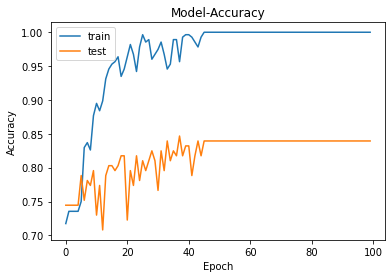

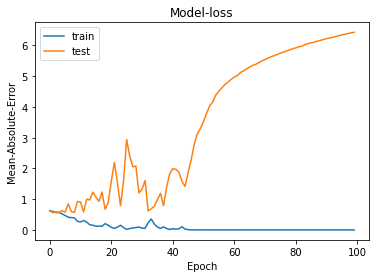

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model-Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['train', 'test'],loc='upper left')
plt.show()

# Hyperparameter tuning 

# Creating first model for best batch_size and epochs

In [72]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [73]:
def create_model():
    model2 = Sequential()
    model2.add(Dense(64,input_dim=28,activation='relu'))
    model2.add(Dense(96,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(1,activation="sigmoid"))
 
    adam=Adam(learning_rate=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2
    

In [74]:
model2 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [75]:
grid_result = grid.fit(X_test_std,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.810 total time=   1.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.714 total time=   1.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.810 total time=   1.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.762 total time=   2.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.800 total time=   1.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [76]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.8471428632736206, using {'batch_size': 10, 'epochs': 50}
0.7790476322174072,0.03683633991069475 with {'batch_size': 10, 'epochs': 10}
0.8471428632736206,0.1055854979515218 with {'batch_size': 10, 'epochs': 50}
0.719523823261261,0.10398412443332383 with {'batch_size': 10, 'epochs': 100}
0.6638095378875732,0.10747988476510743 with {'batch_size': 20, 'epochs': 10}
0.8171428680419922,0.06357454580410399 with {'batch_size': 20, 'epochs': 50}
0.789047634601593,0.06316662539184535 with {'batch_size': 20, 'epochs': 100}
0.7014285802841187,0.07208586673020705 with {'batch_size': 40, 'epochs': 10}
0.8257142901420593,0.0759281250687747 with {'batch_size': 40, 'epochs': 50}
0.8261904835700988,0.07361725980952172 with {'batch_size': 40, 'epochs': 100}


# Creating 2nd model for optimal Dropout_rate

In [77]:
from keras.layers import Dropout

In [78]:
def create_model(dropout_rate):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=28,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(1,activation="sigmoid"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3
    

In [79]:
model3=KerasClassifier(build_fn=create_model,batch_size=40,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [80]:
grid_result2 = grid2.fit(X_test_std,y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START dropout_rate=0.0............................................
[CV 1/5; 1/3] END .............dropout_rate=0.0;, score=0.857 total time=   2.7s
[CV 2/5; 1/3] START dropout_rate=0.0............................................
[CV 2/5; 1/3] END .............dropout_rate=0.0;, score=0.810 total time=   2.7s
[CV 3/5; 1/3] START dropout_rate=0.0............................................
[CV 3/5; 1/3] END .............dropout_rate=0.0;, score=0.905 total time=   2.4s
[CV 4/5; 1/3] START dropout_rate=0.0............................................
[CV 4/5; 1/3] END .............dropout_rate=0.0;, score=0.905 total time=   2.5s
[CV 5/5; 1/3] START dropout_rate=0.0............................................
[CV 5/5; 1/3] END .............dropout_rate=0.0;, score=0.900 total time=   2.7s
[CV 1/5; 2/3] START dropout_rate=0.1............................................
[CV 1/5; 2/3] END .............dropout_rate=0.1;,

In [78]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -9.7119802236557, using {'dropout_rate': 0.1}
-10.279058265686036,4.478019806772941 with {'dropout_rate': 0.0}
-9.7119802236557,5.318196272376117 with {'dropout_rate': 0.1}
-9.888740873336792,5.057712396681741 with {'dropout_rate': 0.2}


# Creating 3rd model for best Activation_function and Init

In [81]:
def create_model(activation_function,init):
    model4 = Sequential()
    model4.add(Dense(64,input_dim=28,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model4.add(Dropout(0.1))
    model4.add(Dense(1,activation="sigmoid"))
    
    
    adam=Adam(lr=0.01)
    model4.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model4
    

In [82]:
model4=KerasClassifier(build_fn=create_model,batch_size=40,epochs=100,verbose=0)
activation_function=['softmax','tanh','linear','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model4,param_grid=param_grid,cv=KFold(),verbose=10)

In [83]:
grid_result3 = grid3.fit(X_test_std,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=normal...................
[CV 1/5; 1/12] END activation_function=softmax, init=normal;, score=0.810 total time=   4.0s
[CV 2/5; 1/12] START activation_function=softmax, init=normal...................
[CV 2/5; 1/12] END activation_function=softmax, init=normal;, score=0.619 total time=   3.6s
[CV 3/5; 1/12] START activation_function=softmax, init=normal...................
[CV 3/5; 1/12] END activation_function=softmax, init=normal;, score=0.667 total time=   3.8s
[CV 4/5; 1/12] START activation_function=softmax, init=normal...................
[CV 4/5; 1/12] END activation_function=softmax, init=normal;, score=0.762 total time=   3.1s
[CV 5/5; 1/12] START activation_function=softmax, init=normal...................
[CV 5/5; 1/12] END activation_function=softmax, init=normal;, score=0.650 total time=   2.4s
[CV 1/5; 2/12] START activation_function=softmax, init=uniform.......

In [84]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.8285714387893677, using {'activation_function': 'linear', 'init': 'uniform'}
0.7014285802841187,0.07208586673020705 with {'activation_function': 'softmax', 'init': 'normal'}
0.7014285802841187,0.07208586673020705 with {'activation_function': 'softmax', 'init': 'uniform'}
0.7014285802841187,0.07208586673020705 with {'activation_function': 'softmax', 'init': 'zero'}
0.6919047713279725,0.08442952428358663 with {'activation_function': 'tanh', 'init': 'normal'}
0.5776190638542176,0.06611333633508928 with {'activation_function': 'tanh', 'init': 'uniform'}
0.7014285802841187,0.07208586673020705 with {'activation_function': 'tanh', 'init': 'zero'}
0.7114285826683044,0.06050430294531222 with {'activation_function': 'linear', 'init': 'normal'}
0.8285714387893677,0.12988743699130362 with {'activation_function': 'linear', 'init': 'uniform'}
0.7014285802841187,0.07208586673020705 with {'activation_function': 'linear', 'init': 'zero'}
0.7014285802841187,0.07208586673020705 with {'activation_f

# Now creating Final_model 

In [85]:
final_model = Sequential()
final_model.add(Dense(64,input_dim=28,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation="sigmoid"))
    
adam=Adam(lr=0.001)
final_model.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])


In [86]:
final_model.fit(X_train_std,y_train,validation_split=0.2,epochs=100,batch_size=40)

Epoch 1/100
9/9 [==============================] - 2s 42ms/step - loss: 0.6877 - accuracy: 0.6909 - val_loss: 0.6790 - val_accuracy: 0.7349
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.6712 - accuracy: 0.7394 - val_loss: 0.6571 - val_accuracy: 0.7349
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6424 - accuracy: 0.7394 - val_loss: 0.6242 - val_accuracy: 0.7349
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6057 - accuracy: 0.7394 - val_loss: 0.5872 - val_accuracy: 0.7349
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5803 - accuracy: 0.7394 - val_loss: 0.5797 - val_accuracy: 0.7349
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5781 - accuracy: 0.7394 - val_loss: 0.5790 - val_accuracy: 0.7349
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5734 - accuracy: 0.7394 - val_loss: 0.5800 - val_accuracy: 0.7349
Epoch 8/100
9/9 [===

In [87]:
predictions = final_model.predict(X_test_std)
print("Predicted Values are: ", predictions)
print("Real values are: ",y_test)

4/4 [==============================] - 0s 4ms/step
Predicted Values are:  [[0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [0.74523276]
 [

In [88]:
accuracy = final_model.evaluate(X_test_std,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.7019


In [89]:
predictions = final_model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


# Creating other Classification Models

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score

In [102]:
num_instances = len(X)

models = []
models.append(('LiR', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Evaluations
results=[]
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = accuracy_score(y, predictions)
    roc_score = roc_auc_score(predictions,y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(accuracy_score)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, roc_score)
    print(msg)


LiR: 0.998066 (0.996429)
RandomForest: 1.000000 (1.000000)
KNN: 0.858801 (0.900515)
CART: 1.000000 (1.000000)
SVM: 0.760155 (0.876494)
